| **Columna**        | **Descripción**                                                                     |
| ------------------ | ----------------------------------------------------------------------------------- |
| `Id`               | Identificador único del vehículo (interno del dataset).                             |
| `Model`            | Modelo del vehículo (en este caso, todos parecen ser "TOYOTA Corolla").             |
| `Price`            | Precio de venta del vehículo en euros (€).                                          |
| `Age_08_04`        | Edad del vehículo en meses al 08/2004 (agosto de 2004).                             |
| `Mfg_Month`        | Mes de fabricación.                                                                 |
| `Mfg_Year`         | Año de fabricación.                                                                 |
| `KM`               | Kilometraje del vehículo (en kilómetros).                                           |
| `Fuel_Type`        | Tipo de combustible (`Petrol`, `Diesel` o `CNG`).                                   |
| `HP`               | Potencia del motor en caballos de fuerza (horsepower).                              |
| `Met_Color`        | Si el vehículo tiene pintura metalizada (1 = sí, 0 = no).                           |
| `Color`            | Color del vehículo.                                                                 |
| `Automatic`        | Si el vehículo es automático (1 = sí, 0 = no).                                      |
| `CC`               | Cilindrada del motor en centímetros cúbicos (cubic centimeters).                    |
| `Doors`            | Número de puertas.                                                                  |
| `Cylinders`        | Número de cilindros del motor.                                                      |
| `Gears`            | Número de marchas (velocidades de transmisión).                                     |
| `Quarterly_Tax`    | Impuesto trimestral que se paga por el vehículo (en euros).                         |
| `Weight`           | Peso del vehículo en kilogramos.                                                    |
| `Mfr_Guarantee`    | Si tiene garantía del fabricante (1 = sí, 0 = no).                                  |
| `BOVAG_Guarantee`  | Garantía de la asociación BOVAG (en Países Bajos) (1 = sí, 0 = no).                 |
| `Guarantee_Period` | Período de garantía restante (en meses).                                            |
| `ABS`              | Si tiene sistema antibloqueo de frenos (Anti-lock Braking System) (1 = sí, 0 = no). |
| `Airbag_1`         | Airbag para el conductor (1 = sí, 0 = no).                                          |
| `Airbag_2`         | Airbag para el acompañante (1 = sí, 0 = no).                                        |
| `Airco`            | Si tiene aire acondicionado (1 = sí, 0 = no).                                       |
| `Automatic_airco`  | Aire acondicionado automático (1 = sí, 0 = no).                                     |
| `Boardcomputer`    | Si tiene computadora de a bordo (1 = sí, 0 = no).                                   |
| `CD_Player`        | Si tiene reproductor de CD (1 = sí, 0 = no).                                        |
| `Central_Lock`     | Si tiene cierre centralizado (1 = sí, 0 = no).                                      |
| `Powered_Windows`  | Si tiene levantavidrios eléctricos (1 = sí, 0 = no).                                |
| `Power_Steering`   | Dirección asistida (1 = sí, 0 = no).                                                |
| `Radio`            | Si tiene radio (1 = sí, 0 = no).                                                    |
| `Mistlamps`        | Si tiene luces antiniebla (1 = sí, 0 = no).                                         |
| `Sport_Model`      | Si es versión deportiva (1 = sí, 0 = no).                                           |
| `Backseat_Divider` | Si el asiento trasero es divisible/abatible (1 = sí, 0 = no).                       |
| `Metallic_Rim`     | Si tiene llantas metálicas (1 = sí, 0 = no).                                        |
| `Radio_cassette`   | Si tiene radio con cassette (1 = sí, 0 = no).                                       |
| `Tow_Bar`          | Si tiene gancho de remolque (1 = sí, 0 = no).                                       |


In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde , zscore
from scipy import stats
import math
# BOXPLOTS
def boxplot(feature,title='boxplot'):
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.boxplot(feature)
    plt.title(f'Boxplot de {title}')
    plt.xlabel(title)
    plt.show()


# HISTOGRAMA Y DENSIDAD

def histogram(feature,intervalos=30,title='histograma'):
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.histplot(feature, bins=intervalos, kde=True)
    plt.title(f'Distribución de {title}')
    plt.xlabel(title)
    plt.ylabel('Frecuencia')
    plt.show()




def scatter_plot(feature1, feature2):
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.scatter(feature1, feature2)
    ax.set_xlabel(feature1.name)
    ax.set_ylabel(feature2.name)
    plt.show()      

# limpieza de outliers con z-core

def limpiar_outliers_z_core(feature: pd.Series , umbral=2):
    z_cores=stats.zscore(feature)
    mask=abs(z_cores)< umbral
    feature = feature[mask]
    return feature , mask


# limpieza de outliers con IQR



def limpiar_outliers_iqr(feature: pd.Series ):
    """
    Elimina outliers usando el método del IQR.
    
    Parámetros:
        feature (pd.Series): feature numérica del DataFrame.

    Retorna:
        feature_limpia (pd.Series): Serie con outliers eliminados.
        mascara (pd.Series): Máscara booleana para aplicar al DataFrame original.
    """
    Q1 = feature.quantile(0.25)
    Q3 = feature.quantile(0.75)
    IQR = Q3 - Q1

    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    mascara = (feature >= limite_inferior) & (feature <= limite_superior)
    feature = feature[mascara]

    return feature, mascara


def resumen_outliers(df):
  

    # Filtrar solo columnas numéricas
    numericas = df.select_dtypes(include=[np.number])

    # Diccionarios para guardar los resultados
    outliers_iqr = {}
    outliers_zscore = {}
   

    for col in numericas.columns:
        # ----- Cálculo de IQR -----
        Q1 = numericas[col].quantile(0.25)
        Q3 = numericas[col].quantile(0.75)
        IQR = Q3 - Q1
        condicion_iqr = (numericas[col] < Q1 - 1.5 * IQR) | (numericas[col] > Q3 + 1.5 * IQR)
        outliers_iqr[col] = condicion_iqr.sum()

        # ----- Cálculo de Z-score (±2) -----
        col_z = numericas[col].dropna()
        zscores = zscore(col_z)
        condicion_z = (zscores < -2) | (zscores > 2)
        outliers_zscore[col] = condicion_z.sum()

       

    # Crear el DataFrame resumen
    df_resumen = pd.DataFrame({
        'Outliers_IQR': outliers_iqr,
        'Outliers_Zscore': outliers_zscore,
        
    })

    return df_resumen




def histogram_por_lotes(df, por_lote=6):
    columnas = df.select_dtypes(include=['number']).columns  
    total_columnas = len(columnas)

    for inicio in range(0, total_columnas, por_lote):
        fin = min(inicio + por_lote, total_columnas)
        subset = columnas[inicio:fin]
        n = len(subset)
        filas = math.ceil(n / 3)
        fig, axes = plt.subplots(filas, 3, figsize=(5 * 3, 4 * filas))
        axes = axes.flatten()

        for i, col in enumerate(subset):
            datos = df[col].dropna()

            try:
                datos = datos.astype(float)  # Forzamos conversión
                if datos.nunique() > 1:
                    axes[i].hist(datos, color='green', bins=30, alpha=0.7, density=True, edgecolor='black', label='Histograma')
                    density = gaussian_kde(datos)
                    x_vals = np.linspace(min(datos), max(datos), 1000)
                    axes[i].plot(x_vals, density(x_vals), color='red', linewidth=2.5, label='Curva de Densidad')
                else:
                    axes[i].text(0.5, 0.5, 'Valor constante', ha='center', va='center')
                axes[i].set_title(col)
                axes[i].set_xlabel(col)

            except Exception as e:
                axes[i].text(0.5, 0.5, f'Error: {e}', ha='center', va='center')
                axes[i].set_title(col)

        for j in range(i + 1, len(axes)):
            fig.delaxes(axes[j])

        plt.tight_layout()
        plt.show()



def boxplots_por_lotes(df, por_lote=6):
    columnas = df.select_dtypes(include=['number']).columns  
    print(columnas)
    total_columnas = len(columnas)

    for inicio in range(0, total_columnas, por_lote):
        fin = min(inicio + por_lote, total_columnas)
        subset = columnas[inicio:fin]
        n = len(subset)
        filas = math.ceil(n / 3)
        fig, axes = plt.subplots(filas, 3, figsize=(5 * 3, 4 * filas))
        axes = axes.flatten()

        for i, col in enumerate(subset):
            datos = df[col].dropna()

            try:
                datos = datos.astype(float)  # Forzamos conversión
                if datos.nunique() > 1:
                    axes[i].boxplot(datos, vert=False, patch_artist=True,
                                    boxprops=dict(facecolor='lightblue', color='blue'),
                                    medianprops=dict(color='red'))
                else:
                    axes[i].text(0.5, 0.5, 'Valor constante', ha='center', va='center')
                axes[i].set_title(col)
                axes[i].set_xlabel(col)

            except Exception as e:
                axes[i].text(0.5, 0.5, f'Error: {e}', ha='center', va='center')
                axes[i].set_title(col)

        for j in range(i + 1, len(axes)):
            fig.delaxes(axes[j])

        plt.tight_layout()
        plt.show()



def scatter_por_lotes(df, eje_y='price', por_lote=6):
    # Filtrar solo columnas numéricas excluyendo la columna del eje y
    columnas = df.select_dtypes(include=['number']).columns
    columnas = [col for col in columnas if col != eje_y and df[col].nunique() > 1]

    total_columnas = len(columnas)

    for inicio in range(0, total_columnas, por_lote):
        fin = min(inicio + por_lote, total_columnas)
        subset = columnas[inicio:fin]
        n = len(subset)
        filas = math.ceil(n / 3)
        fig, axes = plt.subplots(filas, 3, figsize=(5 * 3, 4 * filas))
        axes = axes.flatten()

        for i, col in enumerate(subset):
            try:
                x = df[col].astype(float)
                y = df[eje_y].astype(float)
                axes[i].scatter(x, y, alpha=0.5, color='blue', edgecolors='w')
                axes[i].set_xlabel(col)
                axes[i].set_ylabel(eje_y)
                axes[i].set_title(f'{col} vs {eje_y}')
            except Exception as e:
                axes[i].text(0.5, 0.5, f'Error: {e}', ha='center', va='center')
                axes[i].set_title(col)

        for j in range(i + 1, len(axes)):
            fig.delaxes(axes[j])

        plt.tight_layout()
        plt.show()


def bar_por_lotes(df, por_lote=6):
    columnas = df.select_dtypes(include=['number', 'category', 'object']).columns
    

    total_columnas = len(columnas)

    for inicio in range(0, total_columnas, por_lote):
        fin = min(inicio + por_lote, total_columnas)
        subset = columnas[inicio:fin]
        n = len(subset)
        filas = math.ceil(n / 3)
        fig, axes = plt.subplots(filas, 3, figsize=(15, 4 * filas))
        axes = axes.flatten()

        for i, col in enumerate(subset):
            datos = df[col].dropna()

            try:
                # Si tiene muchas categorías únicas, se descarta
                if datos.nunique() > 50:
                    axes[i].text(0.5, 0.5, 'Demasiados valores únicos', ha='center', va='center')
                    axes[i].set_title(col)
                    continue

                # Conteo de frecuencias
                conteo = datos.value_counts().sort_index()

                axes[i].bar(conteo.index.astype(str), conteo.values, color='skyblue')
                axes[i].set_title(col)
                axes[i].set_xlabel("Valores")
                axes[i].set_ylabel("Frecuencia")
                axes[i].tick_params(axis='x', rotation=45)

            except Exception as e:
                axes[i].text(0.5, 0.5, f'Error: {e}', ha='center', va='center')
                axes[i].set_title(col)

        # Eliminar ejes vacíos
        for j in range(i + 1, len(axes)):
            fig.delaxes(axes[j])

        plt.tight_layout()
        plt.show()



def mostrar_matriz_correlacion(df, metodo='pearson', mostrar_grafico=True):
    """
    Calcula y opcionalmente muestra la matriz de correlación de un DataFrame.
    
    Parámetros:
    - df: DataFrame de entrada.
    - metodo: 'pearson' (default), 'spearman', o 'kendall'.
    - mostrar_grafico: Si True, muestra un heatmap.

    Retorna:
    - matriz de correlación (DataFrame).
    """
    # Seleccionar solo columnas numéricas
    df_numerico = df.select_dtypes(include=['number'])
    
    # Calcular la matriz de correlación
    correlacion = df_numerico.corr(method=metodo)

    if mostrar_grafico:
        plt.figure(figsize=(20, 20))
        sns.heatmap(correlacion, annot=True, fmt=".2f", cmap='coolwarm', square=True)
        plt.title(f'Matriz de correlación ({metodo})')
        plt.tight_layout()
        plt.show()





def pares_correlacion_altas(corr_matrix, umbral=0.65):
    """
    Retorna un DataFrame con los pares de columnas con correlación absoluta >= umbral.

    Parámetros:
    - corr_matrix: Matriz de correlación (DataFrame).
    - umbral: Umbral mínimo absoluto de correlación (default=0.65).

    Retorna:
    - DataFrame con columnas: 'Variable_1', 'Variable_2', 'Correlación'
    """
    pares_altamente_correlacionados = []

    for i in range(len(corr_matrix.columns)):
        for j in range(i + 1, len(corr_matrix.columns)):
            col1 = corr_matrix.columns[i]
            col2 = corr_matrix.columns[j]
            correlacion = corr_matrix.iloc[i, j]
            if abs(correlacion) >= umbral:
                pares_altamente_correlacionados.append({
                    'Variable_1': col1,
                    'Variable_2': col2,
                    'Correlación': correlacion
                })

    df_resultado = pd.DataFrame(pares_altamente_correlacionados)
    df_resultado = df_resultado.sort_values(by='Correlación', key=lambda x: abs(x), ascending=False).reset_index(drop=True)

    return df_resultado



def split (dataframe):
    x= dataframe.drop(columns=['price'])
    y= dataframe['price']
    return x , y




def filtrar_columna_por_rango(serie: pd.Series, inferior: float, superior: float):
    """
    Filtra una Serie por valores dentro de un rango.

    Parámetros:
    - serie: Serie de pandas (columna del DataFrame)
    - inferior: límite inferior del rango
    - superior: límite superior del rango

    Retorna:
    - valores_filtrados: Serie con los valores dentro del rango
    - mascara: Serie booleana para aplicar al DataFrame original
    """
    mascara = (serie >= inferior) & (serie <= superior)
    valores_filtrados = serie[mascara]
    return valores_filtrados, mascara



def obtener_correlaciones_target(matriz_corr, variable_objetivo):
    """
    Devuelve un DataFrame con las correlaciones de 'variable_objetivo' respecto a todas las demás variables.
    
    Parámetros:
    - matriz_corr: pd.DataFrame, matriz de correlación de Pearson
    - variable_objetivo: str, nombre de la variable de interés

    Retorna:
    - DataFrame con dos columnas: ['variable', 'correlacion'], ordenado por correlación descendente
    """
    if variable_objetivo not in matriz_corr.columns:
        raise ValueError(f"La variable '{variable_objetivo}' no está en la matriz de correlación.")
    
    correlaciones = matriz_corr[variable_objetivo].drop(variable_objetivo)  # excluye correlación consigo misma
    
    return correlaciones.to_frame(name='correlacion') \
                        .rename_axis('variable') \
                        .reset_index() \
                        .sort_values(by='correlacion', ascending=False)


from scipy.stats import t, pearsonr

def correlacion_significativa(df, variable_objetivo, alpha=0.05):
    # Verificar que variable objetivo está en df
    if variable_objetivo not in df.columns:
        raise ValueError(f"La variable objetivo '{variable_objetivo}' no está en el DataFrame.")
    
    # Filtrar solo columnas numéricas (excluye la variable objetivo para evitar correlarse consigo misma)
    cols = df.select_dtypes(include=np.number).columns.drop(variable_objetivo)
    
    n = df.shape[0]
    df_gl = n - 2
    
    resultados = []
    
    for var in cols:
        # Calcular r y p usando pearsonr (para validar)
        r, p_pearson = pearsonr(df[variable_objetivo], df[var])
        
        # Calcular estadístico t según fórmula
        t_stat = r / math.sqrt((1 - r**2) / df_gl)
        
        # Valor crítico
        t_critico = t.ppf(1 - alpha/2, df_gl)
        
        # Valor p desde t
        p_value = 2 * (1 - t.cdf(abs(t_stat), df_gl))
        
        # Decisión
        significativo = "Sí" if abs(t_stat) > t_critico else "No"
        
        resultados.append({
            'variable': var,
            'r': r,
            't_stat': t_stat,
            'p_value': p_value,
            'significativo': significativo
        })
        
        # Gráfico
        x = np.linspace(-4, 4, 500)
        y = t.pdf(x, df_gl)

        plt.figure(figsize=(8, 5))
        plt.plot(x, y, label=f't-Student (df={df_gl})', color='black')
        plt.fill_between(x, y, where=(x <= -t_critico), color='red', alpha=0.3, label='Región de rechazo (α/2)')
        plt.fill_between(x, y, where=(x >=  t_critico), color='red', alpha=0.3)
        plt.axvline(t_stat, color='blue', linestyle='--', label=f'Estadístico t = {t_stat:.2f}')
        plt.axvline(-t_stat, color='blue', linestyle='--')
        plt.axvline(t_critico, color='green', linestyle=':', label=f'T crítico = ±{t_critico:.2f}')
        plt.axvline(-t_critico, color='green', linestyle=':')
        plt.title(f'Prueba t correlación: {variable_objetivo} vs {var}')
        plt.xlabel('t')
        plt.ylabel('Densidad de probabilidad')
        plt.legend()
        plt.grid(True)
        plt.show(block=False)
    
    return pd.DataFrame(resultados)


from scipy.stats import norm

def fisher_z_test(r, n, alpha=0.05):
    # Verifica que |r| < 1
    if abs(r) >= 1:
        raise ValueError("El coeficiente r debe estar estrictamente entre -1 y 1.")
    
    # Transformación z de Fisher
    z = 0.5 * np.log((1 + r) / (1 - r))
    
    # Error estándar
    se = 1 / np.sqrt(n - 3)
    
    # Estadístico z observado
    z_obs = z / se
    
    # Valor crítico para prueba bilateral
    z_crit = norm.ppf(1 - alpha/2)
    
    # Valor p bilateral
    p_value = 2 * (1 - norm.cdf(abs(z_obs)))

    # Decisión
    decision = "significativa" if abs(z_obs) > z_crit else "NO significativa"
    
    # Resultados
    print(f"Transformación z de Fisher: {z:.4f}")
    print(f"Estadístico z observado: {z_obs:.4f}")
    print(f"Valor crítico z: ±{z_crit:.4f}")
    print(f"Valor p: {p_value:.4f}")
    print(f"➡ La correlación es {decision} al nivel α = {alpha}")
    
    return z_obs, p_value


# Carga de datos

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dagstermill import get_context


df_toyota.head(10)



In [5]:
df_toyota.shape

(1436, 37)

In [6]:
df_toyota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                1436 non-null   int64 
 1   model             1436 non-null   object
 2   price             1436 non-null   int64 
 3   age_08_04         1436 non-null   int64 
 4   mfg_month         1436 non-null   int64 
 5   mfg_year          1436 non-null   int64 
 6   km                1436 non-null   int64 
 7   fuel_type         1436 non-null   object
 8   hp                1436 non-null   int64 
 9   met_color         1436 non-null   int64 
 10  automatic         1436 non-null   int64 
 11  cc                1436 non-null   int64 
 12  doors             1436 non-null   int64 
 13  cylinders         1436 non-null   int64 
 14  gears             1436 non-null   int64 
 15  quarterly_tax     1436 non-null   int64 
 16  weight            1436 non-null   int64 
 17  mfr_guarantee 

In [7]:
df_toyota.describe()

id         price    age_08_04    mfg_month     mfg_year  \
count  1436.000000   1436.000000  1436.000000  1436.000000  1436.000000   
mean    721.555014  10730.824513    55.947075     5.548747  1999.625348   
std     416.476890   3626.964585    18.599988     3.354085     1.540722   
min       1.000000   4350.000000     1.000000     1.000000  1998.000000   
25%     361.750000   8450.000000    44.000000     3.000000  1998.000000   
50%     721.500000   9900.000000    61.000000     5.000000  1999.000000   
75%    1081.250000  11950.000000    70.000000     8.000000  2001.000000   
max    1442.000000  32500.000000    80.000000    12.000000  2004.000000   

                  km           hp    met_color    automatic           cc  ...  \
count    1436.000000  1436.000000  1436.000000  1436.000000   1436.00000  ...   
mean    68533.259749   101.502089     0.674791     0.055710   1576.85585  ...   
std     37506.448872    14.981080     0.468616     0.229441    424.38677  ...   
min         1.000000    69.000000     0.000000     0.000000   1300.00000  ...   
25%     43000.000000    90.000000     0.000000     0.000000   1400.00000  ...   
50%     63389.500000   110.000000     1.000000     0.000000   1600.00000  ...   
75%     87020.750000   110.000000     1.000000     0.000000   1600.00000  ...   
max    243000.000000   192.000000     1.000000     1.000000  16000.00000  ...   

       central_lock  powered_windows  power_steering        radio  \
count   1436.000000      1436.000000     1436.000000  1436.000000   
mean       0.580084         0.561978        0.977716     0.146240   
std        0.493717         0.496317        0.147657     0.353469   
min        0.000000         0.000000        0.000000     0.000000   
25%        0.000000         0.000000        1.000000     0.000000   
50%        1.000000         1.000000        1.000000     0.000000   
75%        1.000000         1.000000        1.000000     0.000000   
max        1.000000         1.000000        1.000000     1.000000   

         mistlamps  sport_model  backseat_divider  metallic_rim  \
count  1436.000000  1436.000000       1436.000000   1436.000000   
mean      0.256964     0.300139          0.770195      0.204735   
std       0.437111     0.458478          0.420854      0.403649   
min       0.000000     0.000000          0.000000      0.000000   
25%       0.000000     0.000000          1.000000      0.000000   
50%       0.000000     0.000000          1.000000      0.000000   
75%       1.000000     1.000000          1.000000      0.000000   
max       1.000000     1.000000          1.000000      1.000000   

       radio_cassette      tow_bar  
count     1436.000000  1436.000000  
mean         0.145543     0.277855  
std          0.352770     0.448098  
min          0.000000     0.000000  
25%          0.000000     0.000000  
50%          0.000000     0.000000  
75%          0.000000     1.000000  
max          1.000000     1.000000  

[8 rows x 35 columns]

# Limpieza de datos

## Eliminar columnas innecesarias

nuestro objetivo es crear un modelo de regresion liineal que nos permita predecir el precio de los autos toyota corolla en base a unas determinadas caracteristicas. por lo tanto a priori tenemos dos columnas innecesarias a simple vista que son:

1. id
2. model

In [8]:
df_toyota.drop(columns=['id','model'], axis=1, inplace=True)


## Verificacion de valores nulos

In [9]:
df_toyota.isnull().values.any()

False

no se encuentran valores nulos en el dataframe

## Datos invalidos

Verificacion de valores negativos en donde no tiene que haber valores neagtivos

In [10]:
# Seleccionar columnas numéricas
numeric_df = df_toyota.select_dtypes(include='number')

# Verificar si hay valores negativos
negativos_bool = (numeric_df < 0).any()

# Convertir a DataFrame con nombre de columna y booleano
negativos_df = negativos_bool.reset_index()
negativos_df.columns = ['columna', 'tiene_valores_negativos']

# Mostrar el resultado
negativos_df

columna  tiene_valores_negativos
0              price                    False
1          age_08_04                    False
2          mfg_month                    False
3           mfg_year                    False
4                 km                    False
5                 hp                    False
6          met_color                    False
7          automatic                    False
8                 cc                    False
9              doors                    False
10         cylinders                    False
11             gears                    False
12     quarterly_tax                    False
13            weight                    False
14     mfr_guarantee                    False
15   bovag_guarantee                    False
16  guarantee_period                    False
17               abs                    False
18          airbag_1                    False
19          airbag_2                    False
20             airco                    False
21   automatic_airco                    False
22     boardcomputer                    False
23         cd_player                    False
24      central_lock                    False
25   powered_windows                    False
26    power_steering                    False
27             radio                    False
28         mistlamps                    False
29       sport_model                    False
30  backseat_divider                    False
31      metallic_rim                    False
32    radio_cassette                    False
33           tow_bar                    False

**mes de fabricacion y año de fabricacion se encuentran en valores normales**

## Datos incositentes

Se detectó una inconsistencia en la columna `age_08_04`, que representa la edad del vehículo (en meses) a la fecha 08/2004.

La edad se recalculó según la fórmula:


$\text{Edad (en meses)} = (2004 - \text{Año de fabricación}) \times 12 - (\text{Mes de fabricación} - 8)$

luego se compara la edad calculada con la edad registrada:

- Cantidad de coincidencias exactas: **0**
- Cantidad de registros con diferencias: **1435**
- Diferencias distintas de 1 mes: **1435**

esto indica que **todas las edades están desplazadas exactamente por un mes**, posiblemente debido a una convención de cálculo distinta.

Por lo tanto, se decide crear una nueva columna `age_08_04_calculada` con los valores corregidos e

In [11]:
calculo_de_edad = (2004 - df_toyota['mfg_year'])*12 - (df_toyota['mfg_month']-8)

coincidencia = calculo_de_edad == df_toyota['age_08_04']
print('si coincide',len(coincidencia[coincidencia == True]))
print('no coincide',len(coincidencia[coincidencia == False]))

si coincide 0
no coincide 1436


In [12]:
diferencia_edad =abs(calculo_de_edad - df_toyota['age_08_04'])
print(diferencia_edad)
diferencia_edad_filtro = diferencia_edad[diferencia_edad  != 1]
print('diferencias distinta de 1:',len(diferencia_edad_filtro))

0       1
1       1
2       1
3       1
4       1
       ..
1431    1
1432    1
1433    1
1434    1
1435    1
Length: 1436, dtype: int64
diferencias distinta de 1: 0


por lo tanto cambiamos los valores reales

In [13]:
df_toyota['age_08_04_calculada'] = calculo_de_edad
df_toyota.drop(columns=['age_08_04'], axis=1, inplace=True)

In [14]:
df_toyota.head(10)

price  mfg_month  mfg_year     km fuel_type   hp  met_color  automatic  \
0  13500         10      2002  46986    Diesel   90          1          0   
1  13750         10      2002  72937    Diesel   90          1          0   
2  13950          9      2002  41711    Diesel   90          1          0   
3  14950          7      2002  48000    Diesel   90          0          0   
4  13750          3      2002  38500    Diesel   90          0          0   
5  12950          1      2002  61000    Diesel   90          0          0   
6  16900          6      2002  94612    Diesel   90          1          0   
7  18600          3      2002  75889    Diesel   90          1          0   
8  21500          6      2002  19700    Petrol  192          0          0   
9  12950         10      2002  71138    Diesel   69          0          0   

     cc  doors  ...  powered_windows  power_steering  radio  mistlamps  \
0  2000      3  ...                1               1      0          0   
1  2000      3  ...                0               1      0          0   
2  2000      3  ...                0               1      0          0   
3  2000      3  ...                0               1      0          0   
4  2000      3  ...                1               1      0          1   
5  2000      3  ...                1               1      0          1   
6  2000      3  ...                1               1      0          0   
7  2000      3  ...                1               1      0          0   
8  1800      3  ...                1               1      1          0   
9  1900      3  ...                0               1      0          0   

   sport_model  backseat_divider  metallic_rim  radio_cassette  tow_bar  \
0            0                 1             0               0        0   
1            0                 1             0               0        0   
2            0                 1             0               0        0   
3            0                 1             0               0        0   
4            0                 1             0               0        0   
5            0                 1             0               0        0   
6            1                 1             0               0        0   
7            0                 1             0               0        0   
8            0                 0             1               1        0   
9            0                 1             0               0        0   

   age_08_04_calculada  
0                   22  
1                   22  
2                   23  
3                   25  
4                   29  
5                   31  
6                   26  
7                   29  
8                   26  
9                   22  

[10 rows x 35 columns]

## Datos duplicados

In [15]:
def duplicados_con_indices(df):
    resultado = []

    for i in range(len(df)):
        fila_actual = df.iloc[i]
        duplicado_en = False

        for j in range(i):
            if df.iloc[j].equals(fila_actual):
                duplicado_en = j
                break

        resultado.append({'Fila': i, 'Duplicado_de': duplicado_en})

    # Convertir la lista de resultados en un DataFrame
    df_resultado = pd.DataFrame(resultado)
    return df_resultado


df_re = duplicados_con_indices(df_toyota)


deteccion de valores duplicados dos filas 

In [16]:
df_re = df_re[df_re['Duplicado_de'] != False]
df_re

Fila Duplicado_de
113   113          112

eliminamos la 113

In [17]:
df_toyota.drop(113,inplace=True)

La columna `cylinders` tiene todas sus ocurrencias iguales 4 por lo tanto borramos dicha columna ya que no aporta nada

In [18]:
columnas_cte = df_toyota.columns[df_toyota.nunique() == 1]
print("Columnas constantes:", columnas_cte.tolist())

Columnas constantes: ['cylinders']


In [19]:
df_toyota.drop(columns='cylinders', axis=1, inplace=True)

## Outliers

Visualizacion de la cantidad de outliers para cada columna con el criterio **IQR y Z-CORE**

In [20]:
resumen = resumen_outliers(df_toyota)
resumen

Outliers_IQR  Outliers_Zscore
price                         109              100
mfg_month                       0                0
mfg_year                        0               98
km                             49               64
hp                             11               46
met_color                       0                0
automatic                      80               80
cc                            122                1
doors                           0                2
gears                          46               46
quarterly_tax                 223              149
weight                         65               49
mfr_guarantee                   0                0
bovag_guarantee               149              149
guarantee_period              162               85
abs                           268              268
airbag_1                       42               42
airbag_2                        0                0
airco                           0                0
automatic_airco                80               80
boardcomputer                   0                0
cd_player                     313                0
central_lock                    0                0
powered_windows                 0                0
power_steering                 32               32
radio                         210              210
mistlamps                       0                0
sport_model                     0                0
backseat_divider              329                0
metallic_rim                  294                0
radio_cassette                209              209
tow_bar                         0                0
age_08_04_calculada             7               67

## CAmbio de tipo de dato

In [21]:
tipos_columnas = {

    'price': 'float32',
    'age_08_04_calculada': 'int8',
    'mfg_month': 'int8',
    'mfg_year': 'int16',
    'km': 'float32',
    'fuel_type': 'category',
    'hp': 'int16',
    'met_color': 'int8',
    'automatic': 'int8',
    'cc': 'int16',
    'doors': 'int8',
    'gears': 'int8',
    'quarterly_tax': 'float32',
    'weight': 'float16',
    'mfr_guarantee': 'int8',
    'bovag_guarantee': 'int8',
    'guarantee_period': 'int8',
    'abs': 'int8',
    'airbag_1': 'int8',
    'airbag_2': 'int8',
    'airco': 'int8',
    'automatic_airco': 'int8',
    'boardcomputer': 'int8',
    'cd_player': 'int8',
    'central_lock': 'int8',
    'powered_windows': 'int8',
    'power_steering': 'int8',
    'radio': 'int8',
    'mistlamps': 'int8',
    'sport_model': 'int8',
    'backseat_divider': 'int8',
    'metallic_rim': 'int8',
    'radio_cassette': 'int8',
    'tow_bar': 'int8'
}

# Aplicar los cambios al DataFrame
df_toyota = df_toyota.astype(tipos_columnas)



# Analisis Univariado

## Variables continuas Consideradas

En este análisis, las variables continuas que hemos identificado y considerado son:

1. `Price`: Precio de venta del vehículo en euros (€).

2. `Quarterly_Tax`: Impuesto trimestral que se paga por el vehículo (en euros).

3. `Weight`: Peso del vehículo en kilogramos.

4. `KM`: Kilometraje del vehículo (en kilómetros).

5. `cc`: cilndrada del motor

Extraemos las variables continuas 

In [22]:
df_toyota_continuas = df_toyota[['price', 'quarterly_tax', 'weight', 'km','cc']].copy()


Visualizamos BoxPlots e Histogramas con sus cirva de densidad

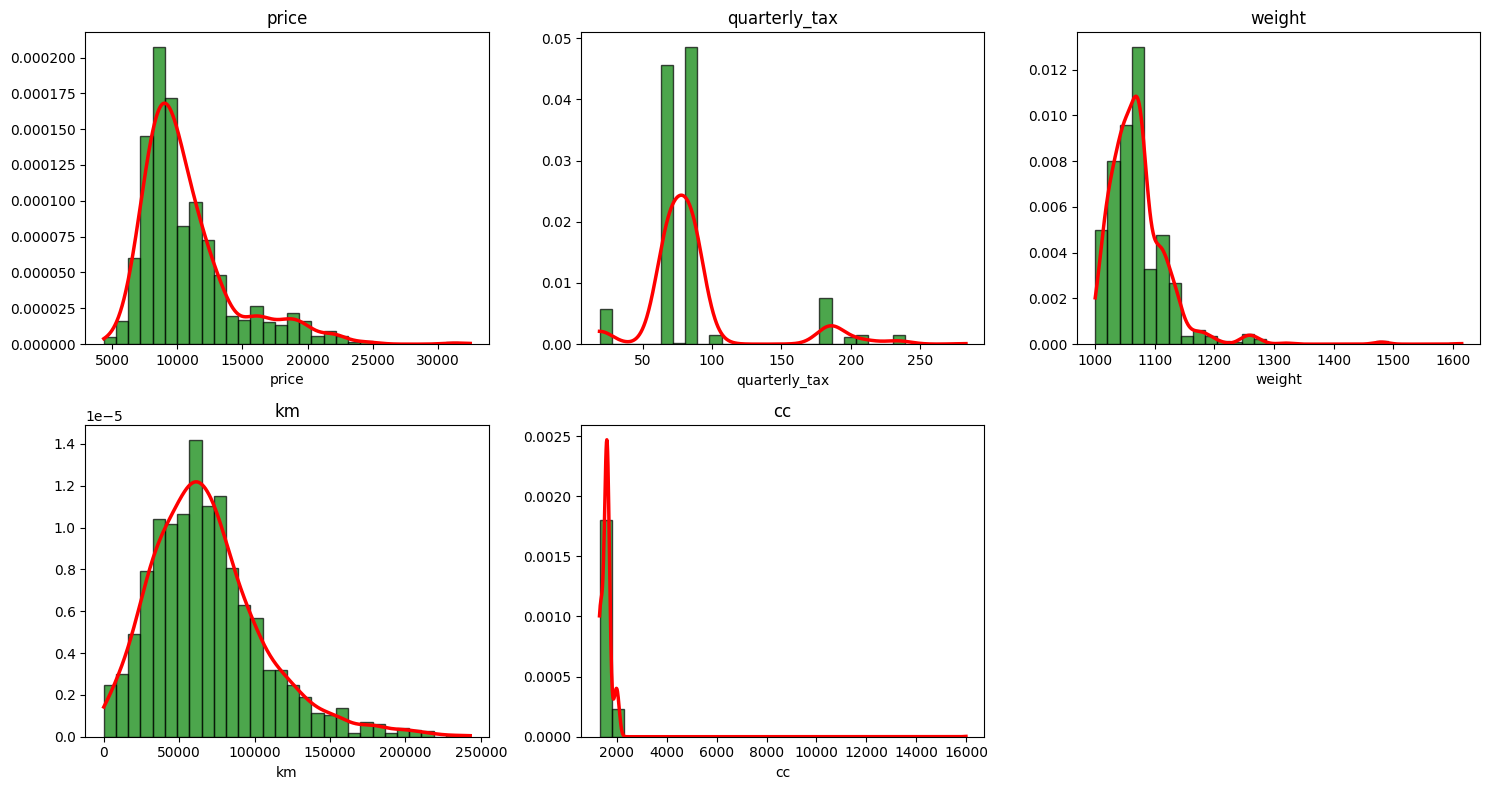

In [23]:
histogram_por_lotes(df_toyota_continuas,6)

Index(['price', 'quarterly_tax', 'weight', 'km', 'cc'], dtype='object')


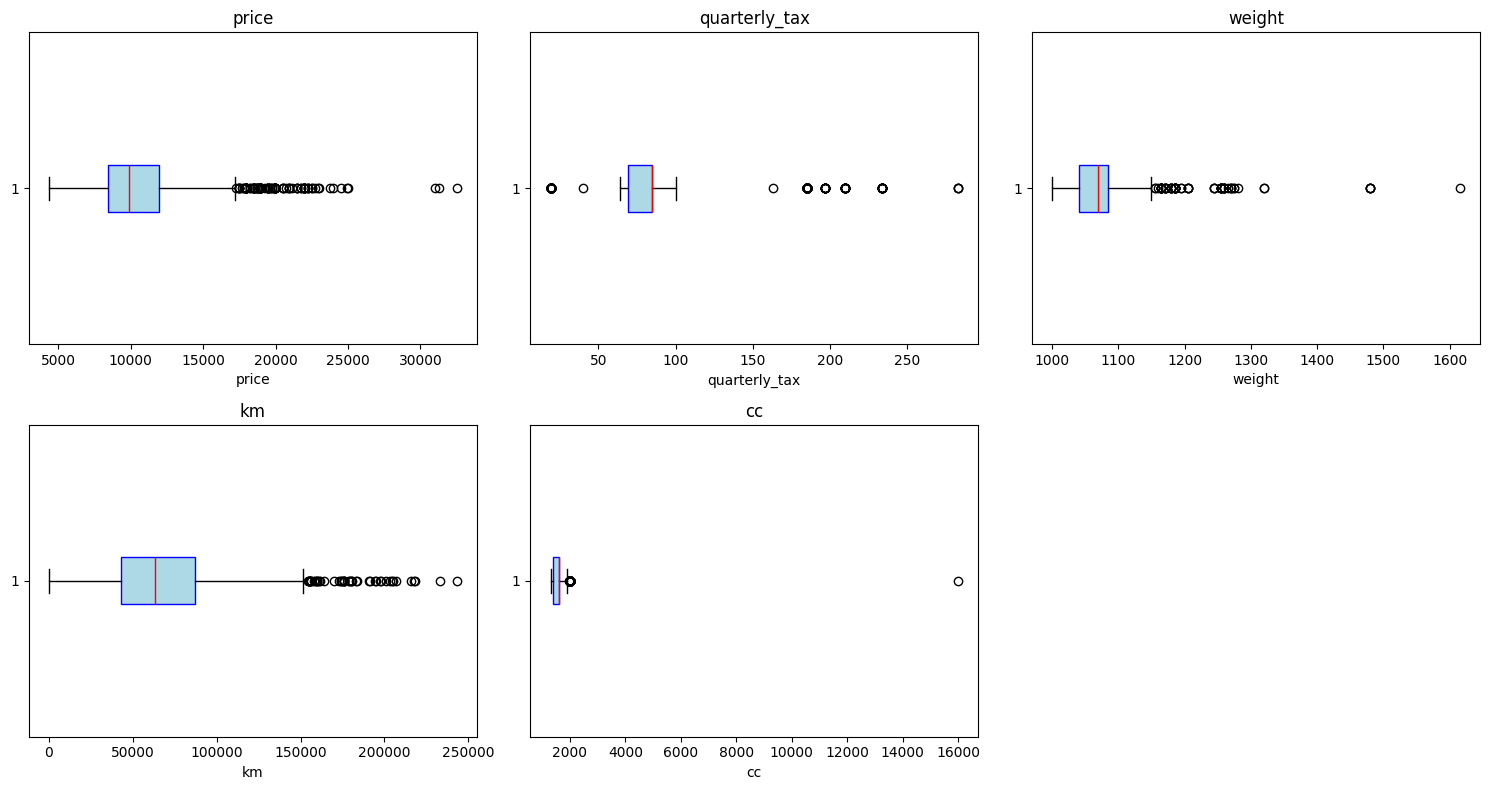

In [24]:
boxplots_por_lotes(df_toyota_continuas,6)

1. `Price (Precio)`

- Boxplot: Se observan varios valores atípicos (outliers) a la derecha, lo que indica que hay autos con precios mucho más altos que la mayoría.

- Histograma: La distribución es sesgada a la derecha, con una mayoría de autos en un rango de precios más bajos y unos pocos muy caros.

- Interpretación: La variable tiene una dispersión amplia y algunos autos que pueden ser considerados premium o muy costosos debido a funciones adicionales que el mismo lleva como ser `direccion asistida`.

2. `Quarterly Tax (Impuesto Trimestral)`

- Boxplot: También se observan outliers pero menos pronunciados que en el precio.

- Histograma: La mayoría de los autos pagan un impuesto relativamente bajo, con algunos pocos con impuestos altos.

- Interpretación: La mayoría de los autos tienen un impuesto trimestral bajo, probablemente relacionado con la cilindrada o emisiones, con algunos autos más costosos o potentes que pagan más.

3. `Weight (Peso)`

- Boxplot: Se ven outliers a la derecha, pero la mayoría de autos tienen pesos relativamente similares.

- Histograma: La distribución está más concentrada en un rango estrecho, con algunos autos más pesados.

- Interpretación: La mayoría de los autos tienen pesos homogéneos, pero hay algunos modelos o variantes más pesadas.

4. `Km (Kilometraje)`

- Boxplot: Se observan varios outliers con kilometrajes muy altos.

- Histograma: La distribución está sesgada a la derecha, con muchos autos con bajo kilometraje y unos pocos con kilometrajes muy altos.

- Interpretación: Hay autos con poca circulación y algunos con mucho uso, lo cual es importante considerar para análisis de desgaste o valor de reventa.

5. `cc (cilindrado del motor)`

- Boxplot: se obsevar outliers muy cerca del maximo del cojunto de datos pero hay uno que esta muy alejado 

- Histograma: la distribucion esta extramadamente sesgada hacia la derecha por culpa del outlier que esta muy alejado

- Interpretacion: autos con motor de bajo cilindro y hay un auto con un motor que tiene mucho cilindrado

En resumen:

- Las cuatro variables muestran distribuciones sesgadas, con presencia de valores atípicos.

- Esto sugiere que se podría considerar transformación o limpieza de outliers para análisis posteriores.

- Se debe considerar borrar la variable `weight` puesto no se ve relevante para predecir un precio

- importante analizar la variable `price` , `km` y `quartely tax` con las binarias para obtener conclusiones mas precisas.

- importante eliminar el outlier de `cc` ya que podria causar problemas a la hora de entrenar el modelo, si se la considera como predictora.

## Variables Enteras

In [25]:
df_toyota_enteras = df_toyota.copy()

In [26]:
df_toyota_enteras.drop(columns=['price', 'quarterly_tax', 'weight', 'km','cc','mfr_guarantee', 'bovag_guarantee', 'abs', 'airbag_1', 'airbag_2', 'airco', 'automatic_airco', 'boardcomputer', 'cd_player', 'central_lock', 'met_color','powered_windows', 'power_steering', 'radio', 'mistlamps', 'sport_model', 'backseat_divider', 'metallic_rim', 'radio_cassette', 'tow_bar' , 'age_08_04_calculada','fuel_type','automatic'
], axis=1,inplace=True)


In [27]:
df_toyota_enteras.describe()

mfg_month    mfg_year           hp        doors        gears  \
count  1435.000000  1435.00000  1435.000000  1435.000000  1435.000000   
mean      5.551916  1999.62230   101.491986     4.032753     5.026481   
std       3.353102     1.53692    14.981408     0.952667     0.188575   
min       1.000000  1998.00000    69.000000     2.000000     3.000000   
25%       3.000000  1998.00000    90.000000     3.000000     5.000000   
50%       5.000000  1999.00000   110.000000     4.000000     5.000000   
75%       8.000000  2001.00000   110.000000     5.000000     5.000000   
max      12.000000  2004.00000   192.000000     5.000000     6.000000   

       guarantee_period  
count       1435.000000  
mean           3.816028  
std            3.011997  
min            3.000000  
25%            3.000000  
50%            3.000000  
75%            3.000000  
max           36.000000

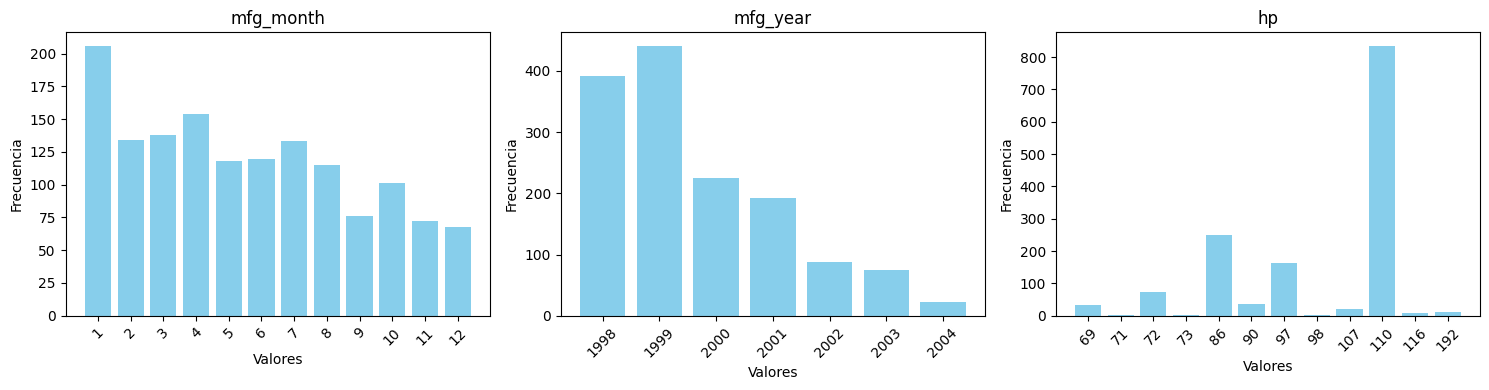

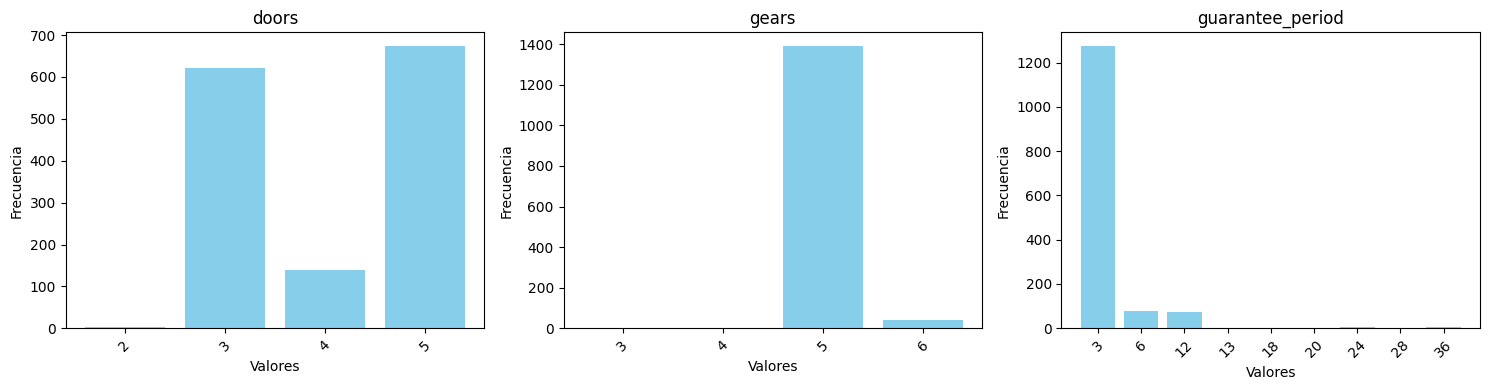

In [28]:
bar_por_lotes(df_toyota_enteras,3)

Index(['mfg_month', 'mfg_year', 'hp', 'doors', 'gears', 'guarantee_period'], dtype='object')


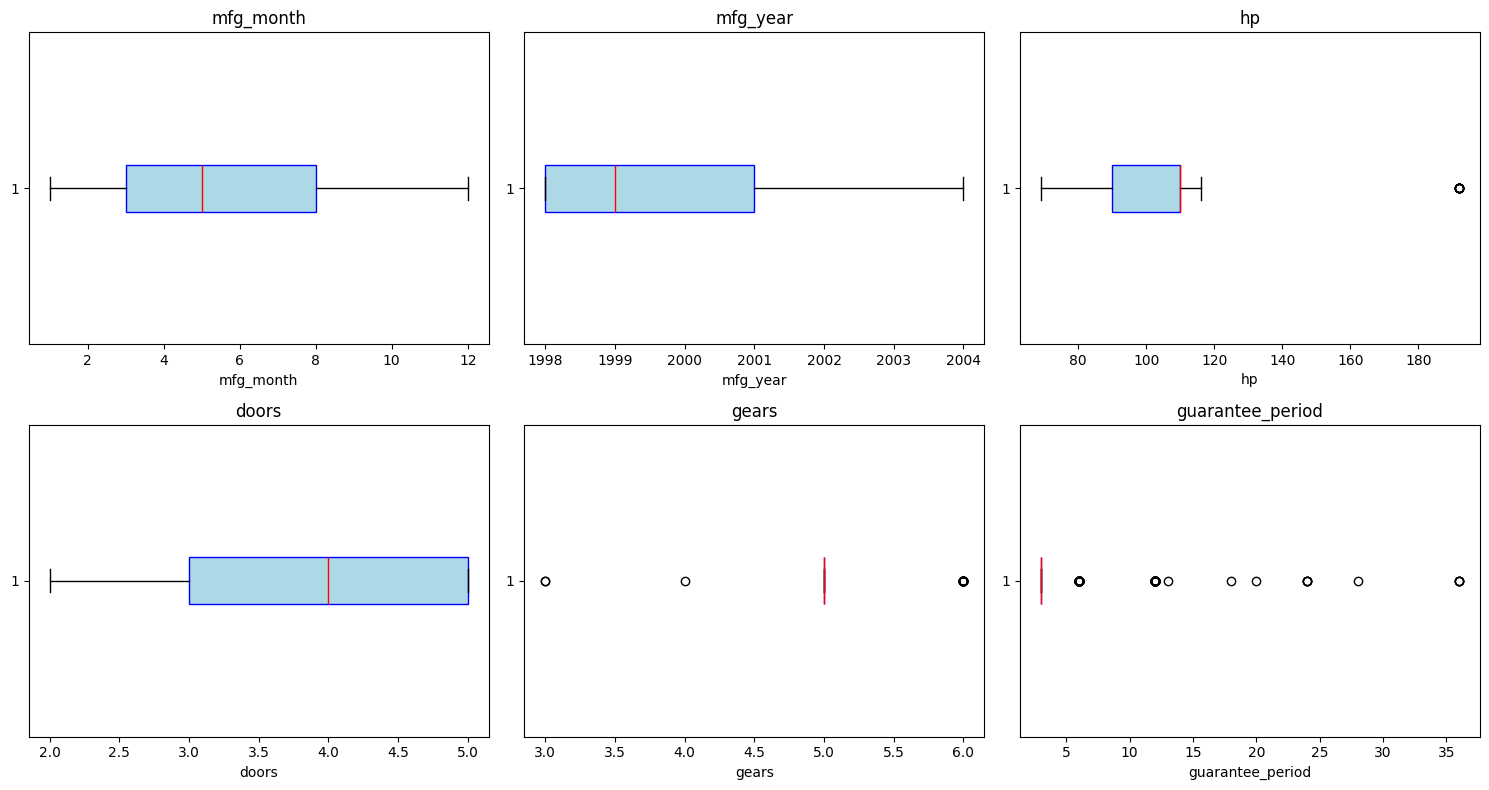

In [29]:
boxplots_por_lotes(df_toyota_enteras,6)

In [30]:
# Calcular varianza para todas las columnas numéricas
varianzas = df_toyota_enteras.var()

# Convertir a DataFrame para mejor visualización
tabla_varianza = varianzas.reset_index()
tabla_varianza.columns = ['columna', 'varianza']

# Ordenar de menor a mayor varianza
tabla_varianza = tabla_varianza.sort_values(by='varianza')

# Mostrar tabla
print(tabla_varianza)

            columna    varianza
4             gears    0.035560
3             doors    0.907574
1          mfg_year    2.362124
5  guarantee_period    9.072128
0         mfg_month   11.243293
2                hp  224.442579


Para Analisis posteriores se debe considerar eliminar `Gears` y `Doors` ya que poseen muy poca variabilidad en los datos 

## Variables binarias

Seleccion las variables binarias

In [31]:
df_toyota_binarias = df_toyota.copy()

columns_to_keep = [
    'mfr_guarantee', 'bovag_guarantee', 'abs', 'airbag_1', 'airbag_2', 'airco',
    'automatic_airco', 'boardcomputer', 'cd_player', 'central_lock',
    'powered_windows', 'power_steering', 'radio', 'mistlamps', 'sport_model',
    'backseat_divider', 'metallic_rim', 'radio_cassette', 'tow_bar','met_color','automatic'
]

df_toyota_binarias = df_toyota_binarias[columns_to_keep]

Contamos cuantos 0 y 1 hay por cada variable 

In [32]:
binary_cols = [col for col in df_toyota_binarias.columns if set(df_toyota_binarias[col].dropna().unique()) <= {0, 1}]

resumen = pd.DataFrame({
    'ceros': df_toyota_binarias[binary_cols].apply(lambda x: (x == 0).sum()),
    'unos': df_toyota_binarias[binary_cols].apply(lambda x: (x == 1).sum())
})

print(resumen)

                  ceros  unos
mfr_guarantee       847   588
bovag_guarantee     149  1286
abs                 268  1167
airbag_1             42  1393
airbag_2            398  1037
airco               706   729
automatic_airco    1355    80
boardcomputer      1012   423
cd_player          1122   313
central_lock        603   832
powered_windows     629   806
power_steering       32  1403
radio              1225   210
mistlamps          1066   369
sport_model        1004   431
backseat_divider    329  1106
metallic_rim       1141   294
radio_cassette     1226   209
tow_bar            1036   399
met_color           467   968
automatic          1355    80


Mediente un umbral de 90% vamos a tomar para eliminar dichas variables que esten muy desbalancedas

In [33]:
umbral = 0.90  
columnas_a_borrar = []

for col in resumen.index:
    total = resumen.loc[col].sum()
    max_val = resumen.loc[col].max()
    if max_val / total > umbral:
        columnas_a_borrar.append(col)

print("Columnas a eliminar por desbalance:", columnas_a_borrar)


Columnas a eliminar por desbalance: ['airbag_1', 'automatic_airco', 'power_steering', 'automatic']


In [34]:
df_toyota_binarias.drop(columns=columnas_a_borrar, axis=1, inplace=True)

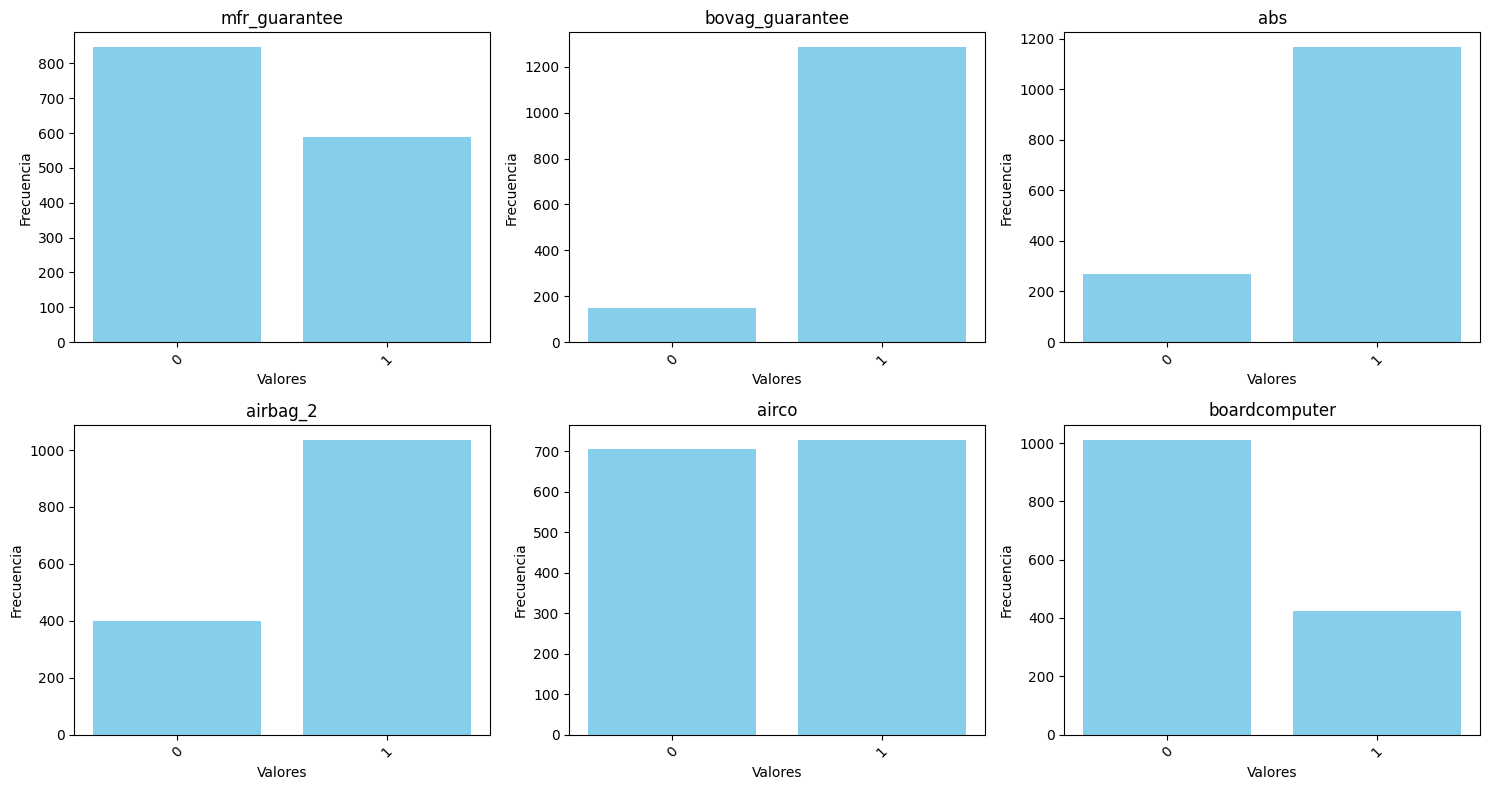

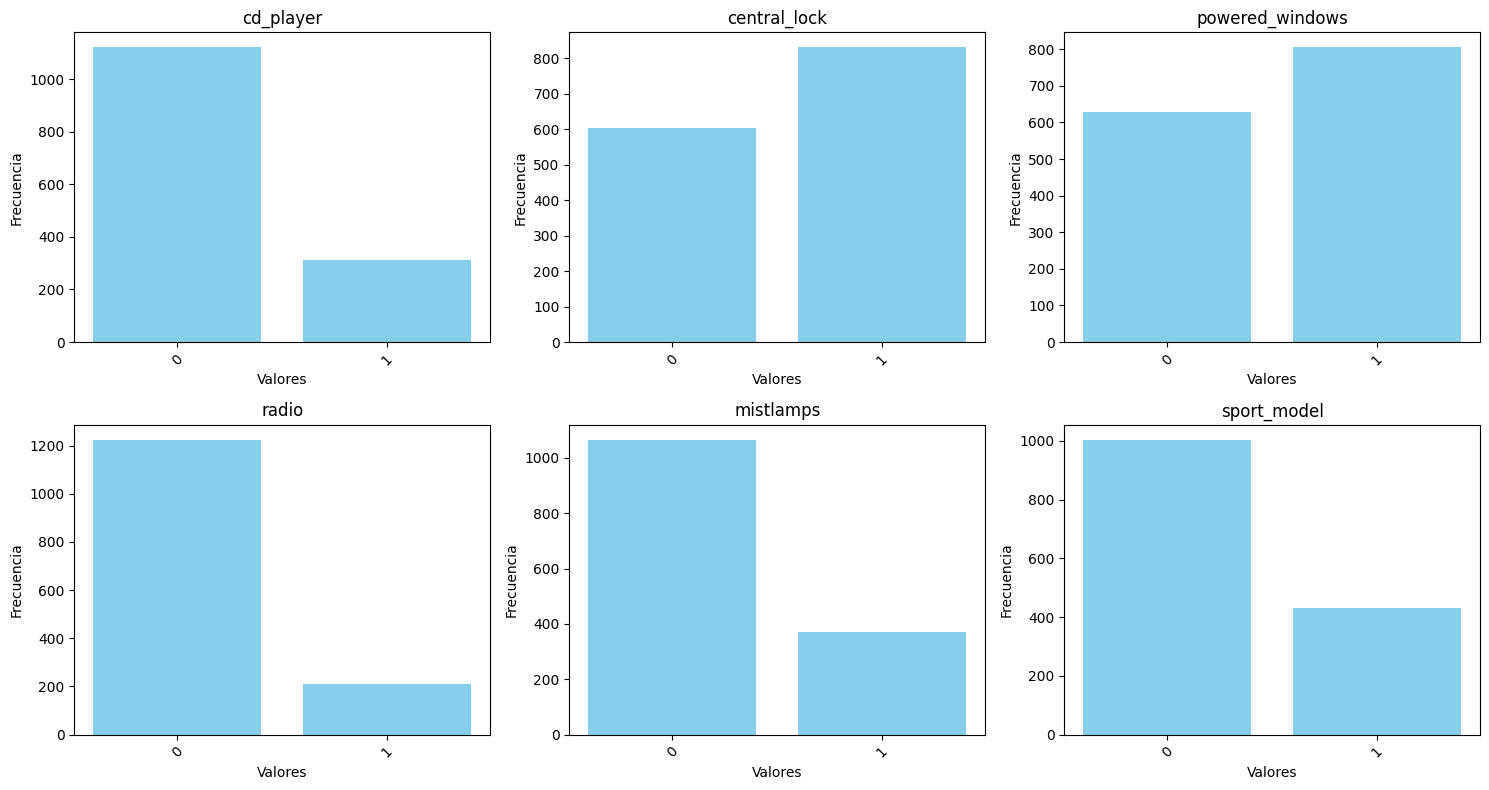

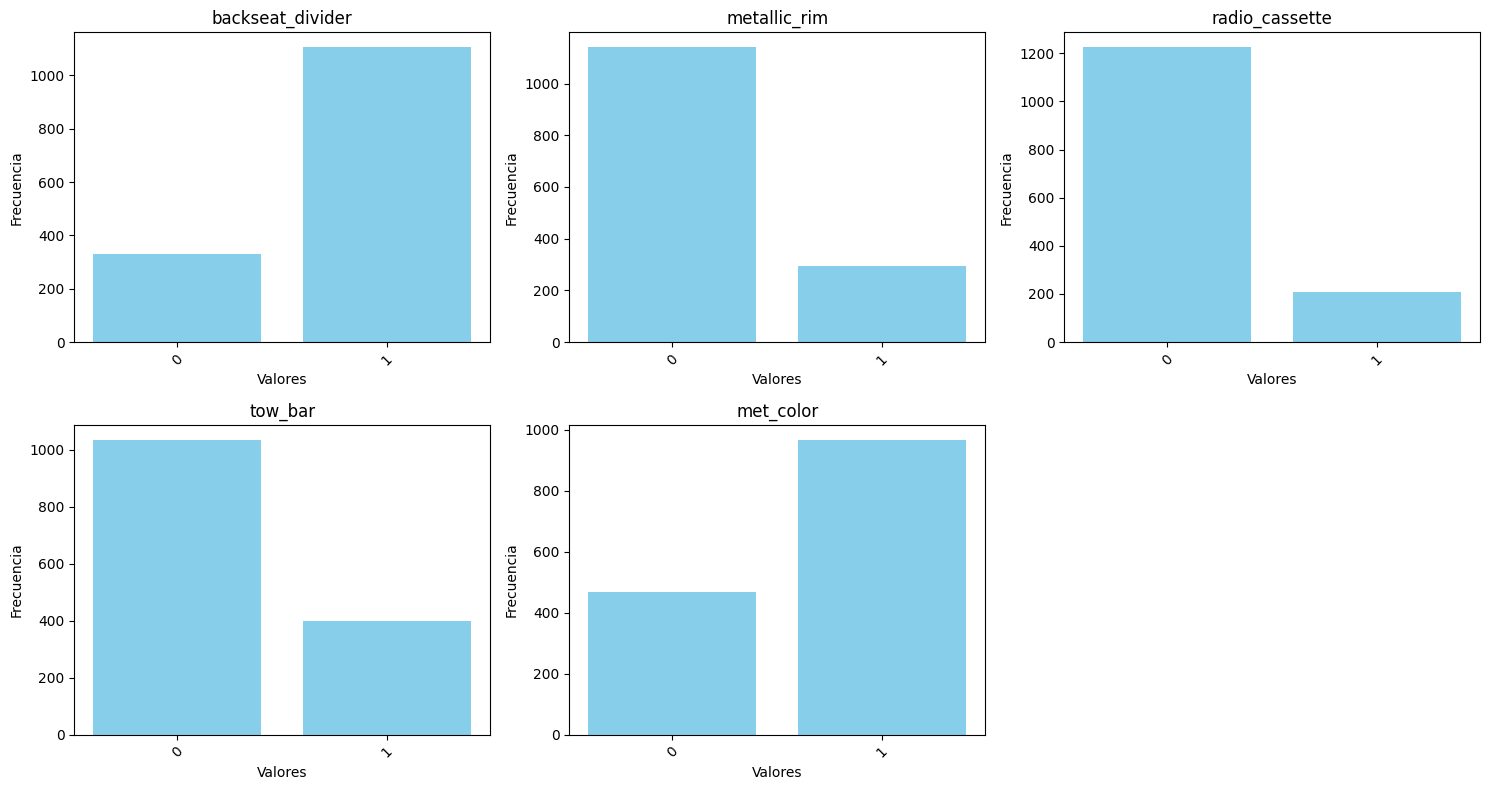

In [35]:
bar_por_lotes(df_toyota_binarias)

# Eliminacion de outliers y/o Transformacion para varibles continuas

## Price

antes de eliminar los outliers vamos a graficar un histograma y un boxplot

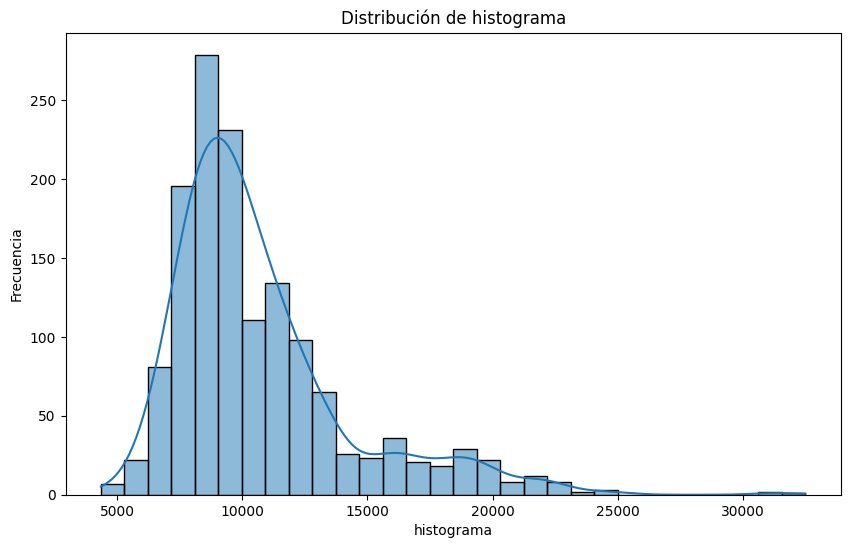

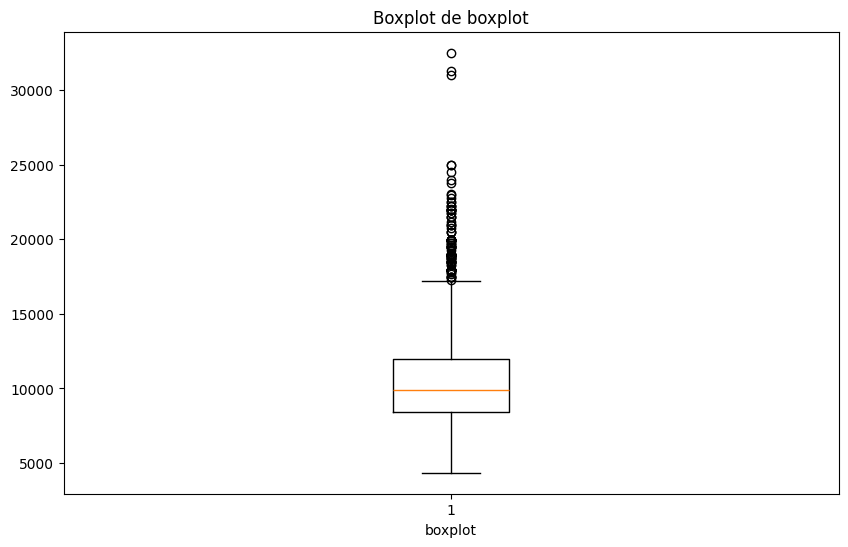

In [36]:
histogram(df_toyota_continuas['price'])
boxplot(df_toyota_continuas['price'])

como se dijo en el analisis univariad adicha distribucion presenta una sesgo hacia la derecha por lo tanto hay que eliminar esos outliers, como el histograma lo presenta vemos que es una distrubucion que se acerca mucho a una `distribucion normal` lo que haremos es eliminar los outliers con el metodo llamado `z-core`

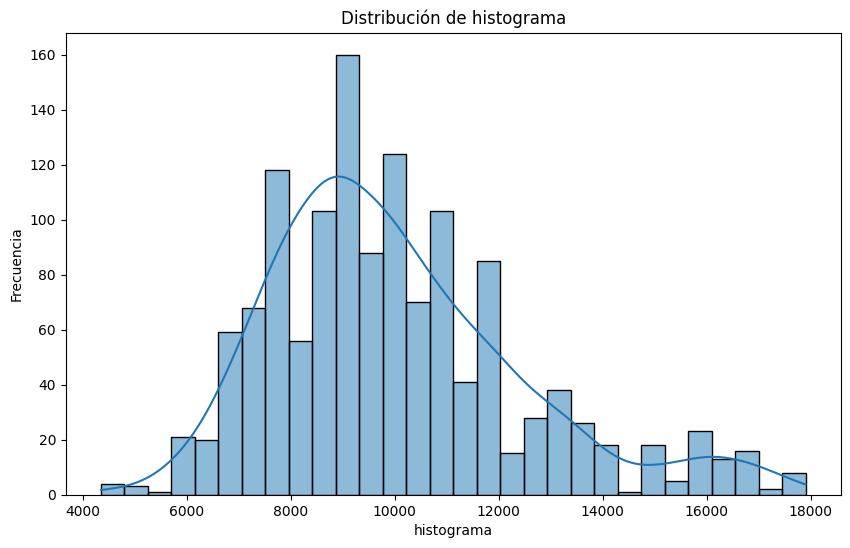

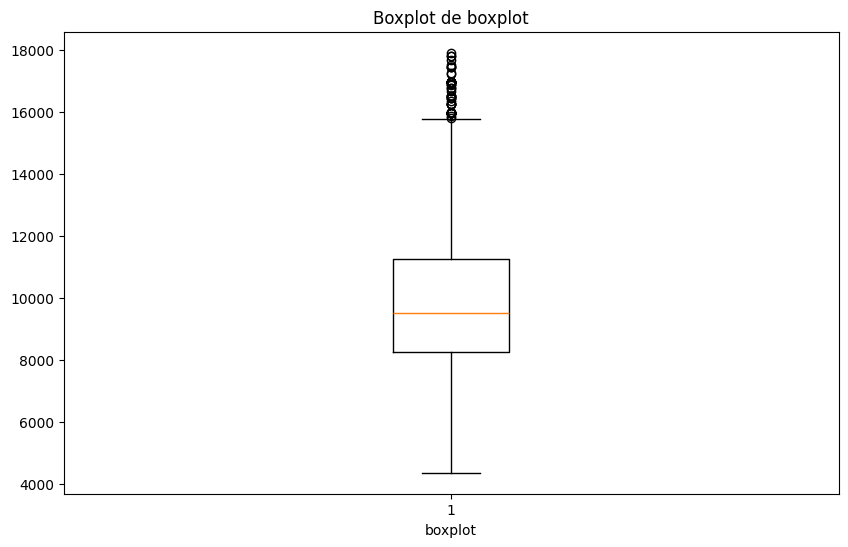

100


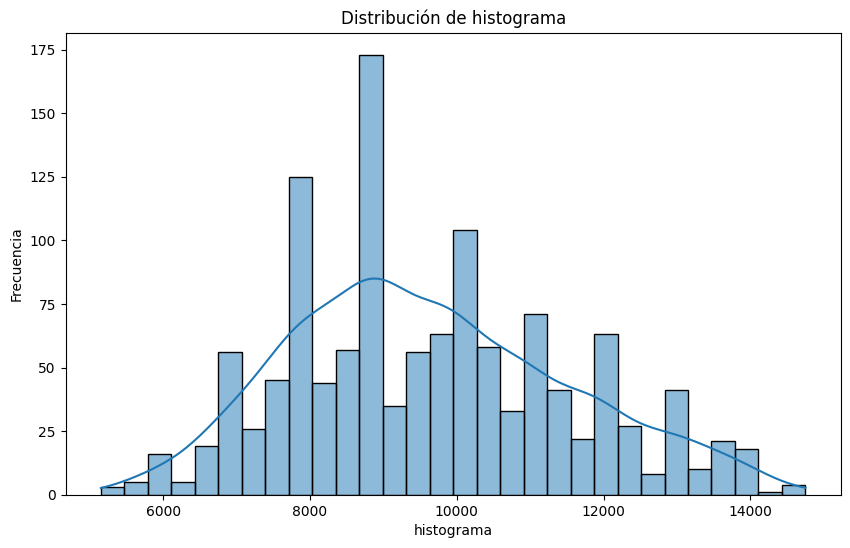

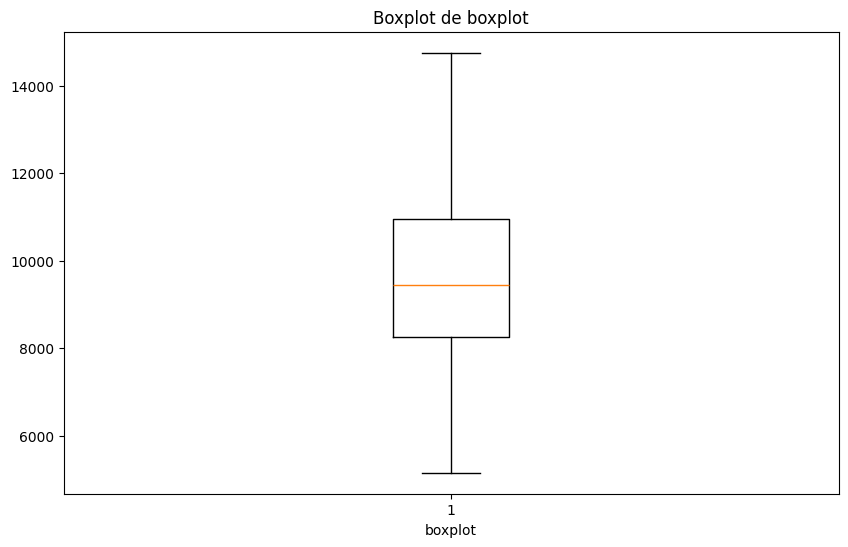

85


In [37]:
price = df_toyota_continuas['price'].copy()
_ , mask_price = limpiar_outliers_z_core(price)
price_limpio = price[mask_price]
histogram(price_limpio)
boxplot(price_limpio)

print(len(price) - len(price_limpio))

price_limpio_l , mask_price_l = limpiar_outliers_z_core(price_limpio)

histogram(price_limpio_l)

boxplot(price_limpio_l)

print(len(price_limpio) - len(price_limpio_l))








## KM 

antes de eliminar los outliers vamos a graficar un histograma y un boxplot

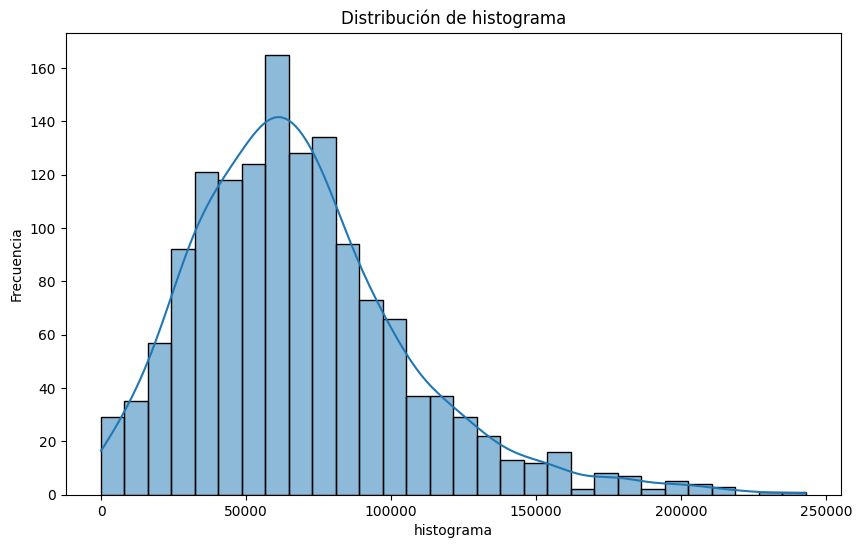

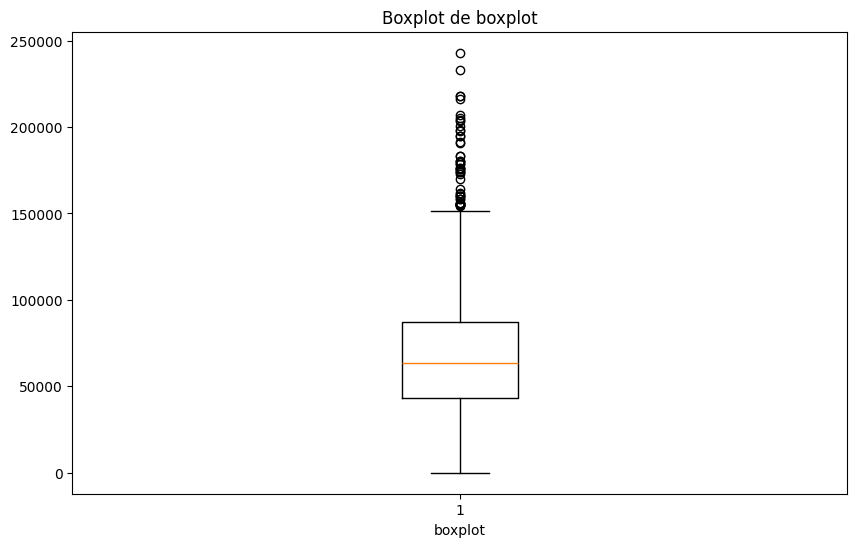

In [38]:
histogram(df_toyota_continuas['km'])
boxplot(df_toyota_continuas['km'])


como se dijo en el analisis univariad adicha distribucion presenta una sesgo hacia la derecha por lo tanto hay que eliminar esos outliers, como el histograma lo presenta vemos que es una distrubucion que se acerca mucho a una `distribucion normal` lo que haremos es eliminar los outliers con el metodo llamado `z-core`

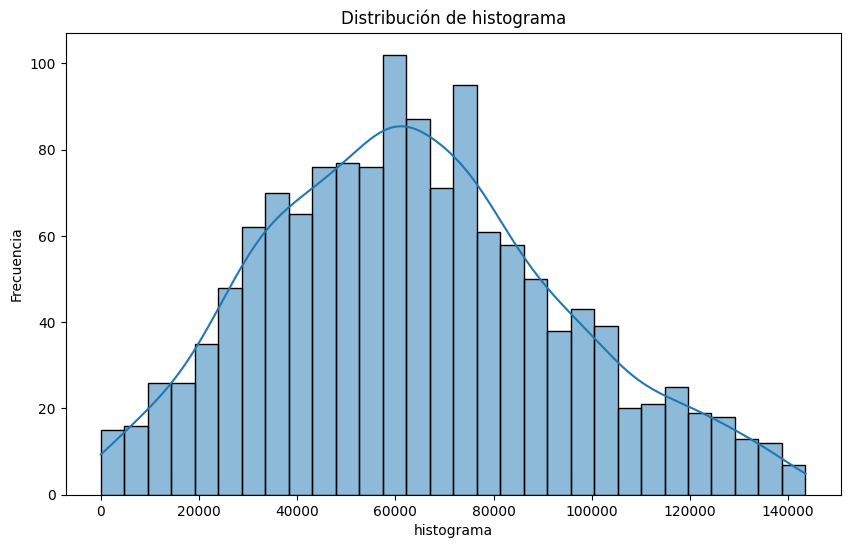

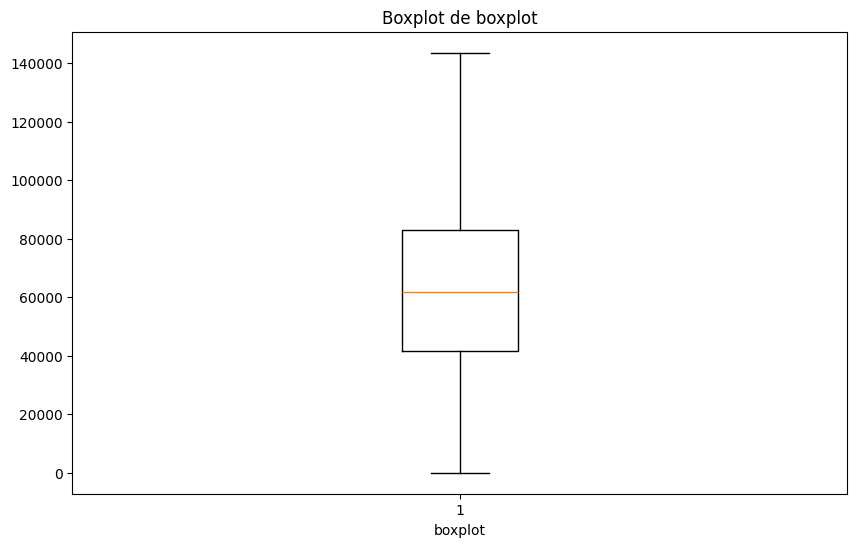

64


In [39]:
km = df_toyota_continuas['km'].copy()
_ , mask_km = limpiar_outliers_z_core(km)
km_limpio = km[mask_km]
histogram(km_limpio)
boxplot(km_limpio)
print(len(km) - len(km_limpio))


## cc

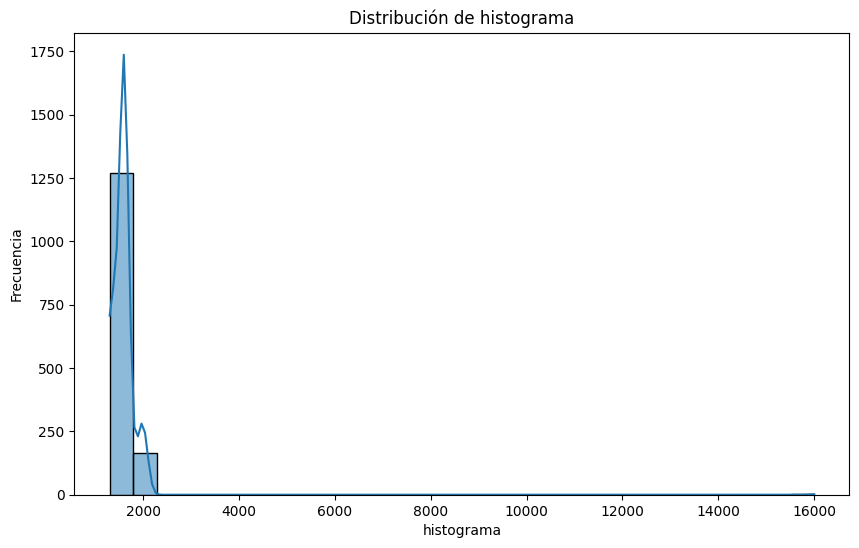

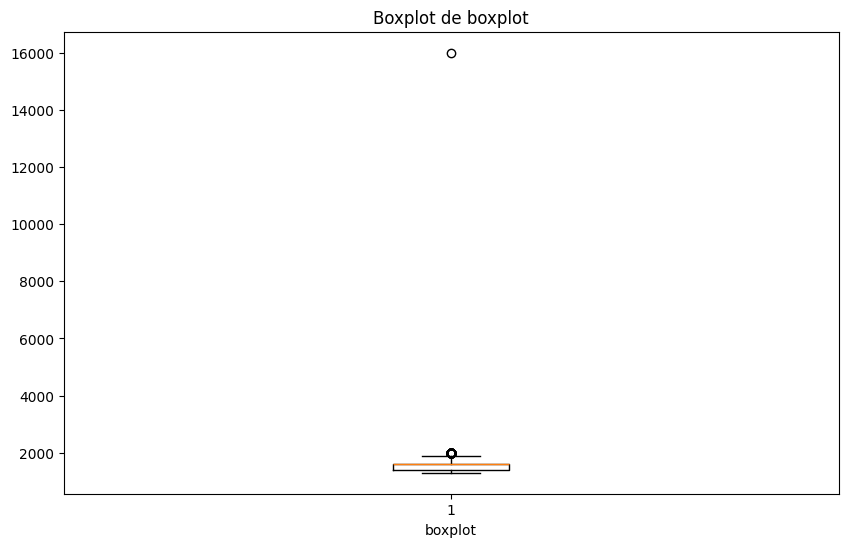

0.12437451354775338


In [40]:
histogram(df_toyota_continuas['cc'])
boxplot(df_toyota_continuas['cc'])
correlacion = df_toyota_continuas['cc'].corr(df_toyota_continuas['price'])
print(correlacion)


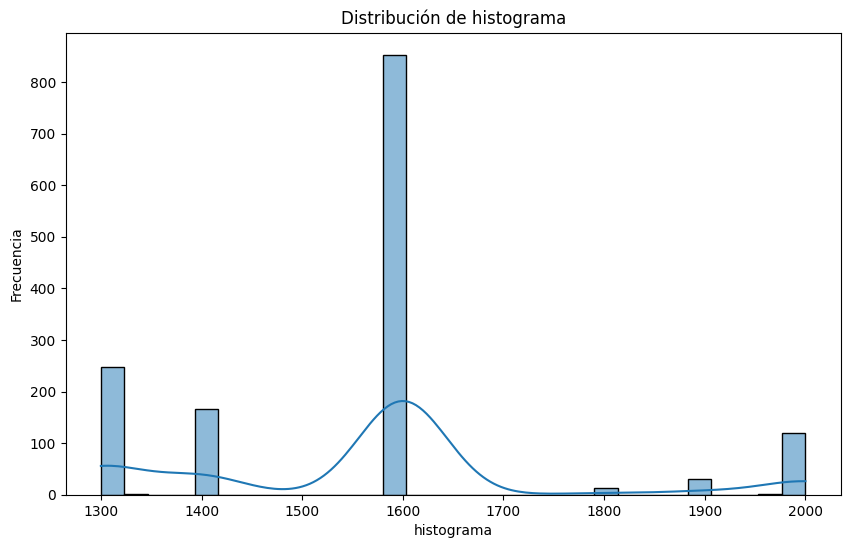

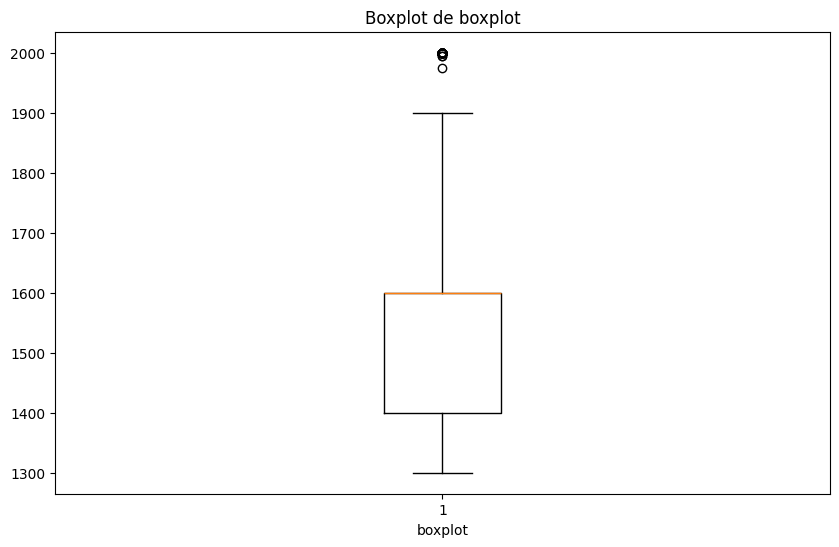

In [41]:
cc = df_toyota_continuas['cc'].copy()

cc = cc[cc!=cc.max()]

histogram(cc)
boxplot(cc)


el valor 1600 domina fuertemente con una frecuencia desproporcionadamente alta, no se la pudo mejorar con eliminando los outliers tampoco vale la pena llevar a una normal ya que no es continua, si la variable no tiene un buen coeficente de correlacion se debera eliminarla

## Quarterly_tax

en esta variable se observa que hay muchos vehiculos que pagan entre 50 y  100 de impuestos trimestrales que es ahi donde se encuentran el 75% de los dato sin mebargo se visualiza que hay vehiculos que pagan mucho mas que eso mas o menos con una diferencia  152, esto puede deberse a que es un auto de alta gama o algo parecido  por lo tanto la variable `quarterly_tax` se le haran los siguientes tratamientos para poder salvara de alguna manera ya que pensamos que dicha variable a la hora de determianr el precio de un vehiculo aporta mucho a el mismo.

- eliminar outliers  -> con la estrategia z-core  a 2 desviaciones estandar

- convertirla en una normal -> box-cox


si alguno de estos tratamientos no da resultado se opotora por eliminar dicha  variable 

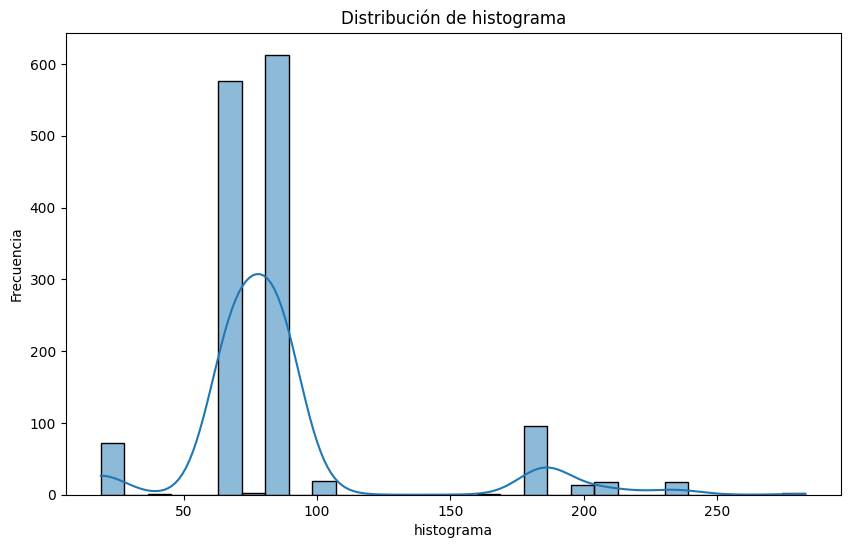

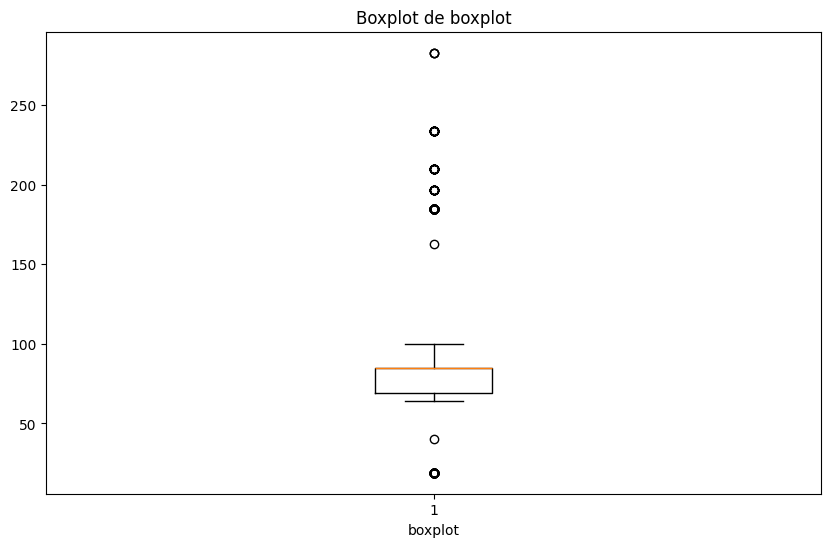

In [42]:
histogram(df_toyota_continuas['quarterly_tax'])
boxplot(df_toyota_continuas['quarterly_tax'])



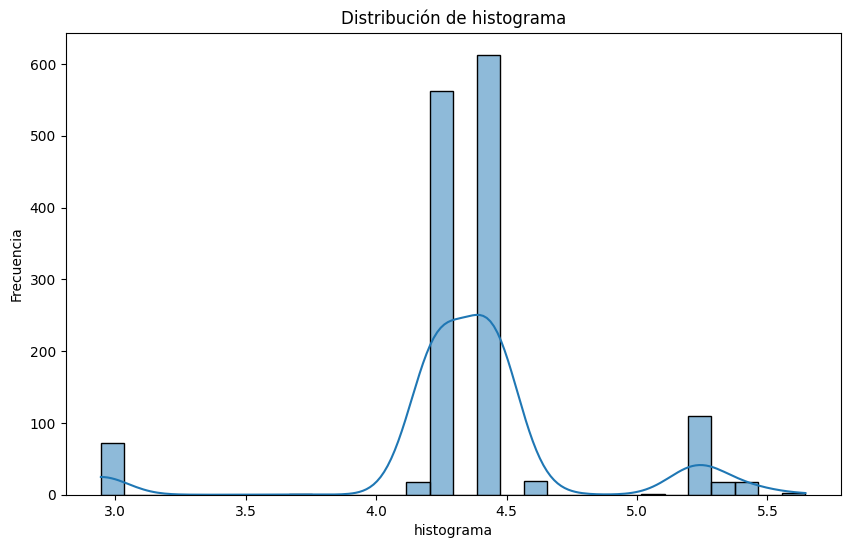

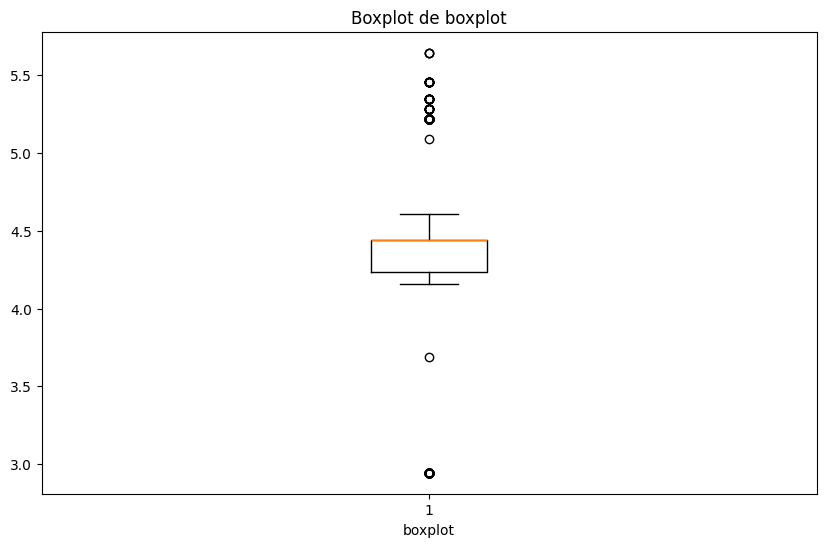

In [43]:
quearterly_tax = df_toyota_continuas['quarterly_tax'].copy()

quearterly_tax_log = np.log(quearterly_tax)

histogram(quearterly_tax_log)
boxplot(quearterly_tax_log)


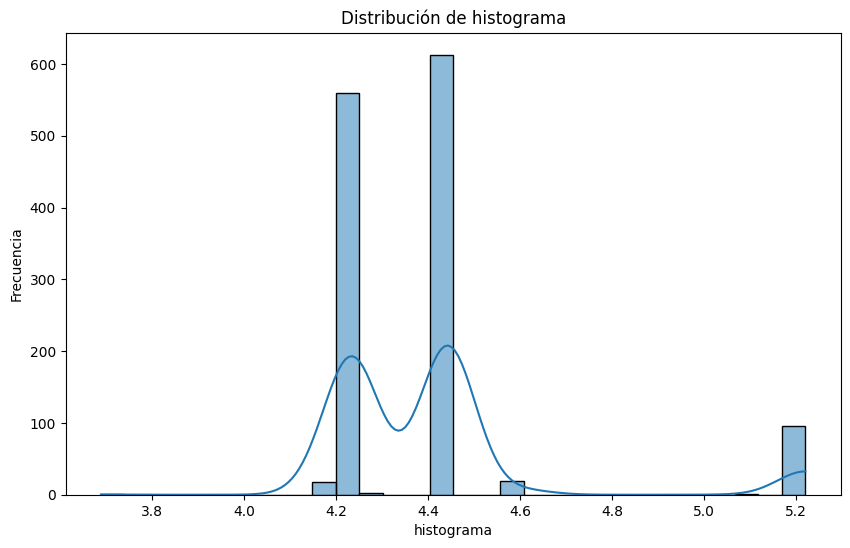

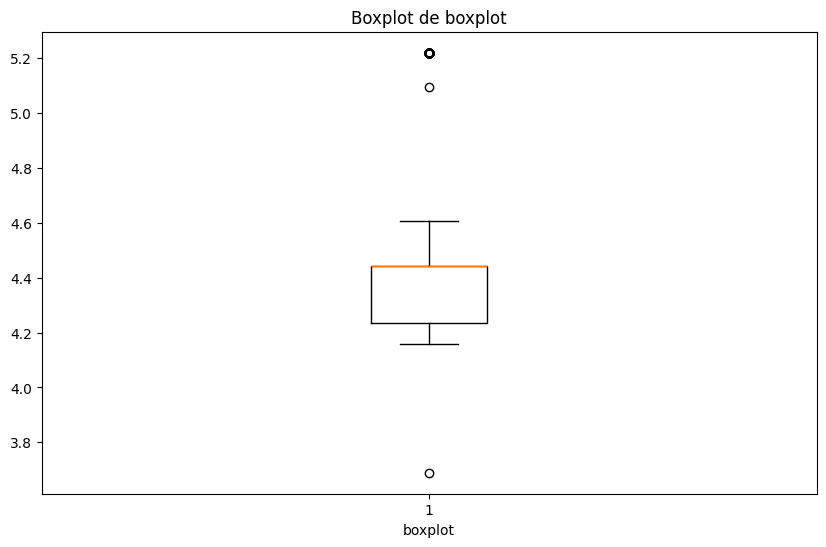

125


In [44]:
quearterly_tax_log_limpio , mask_quearterly_tax_log = limpiar_outliers_z_core(quearterly_tax_log)

histogram(quearterly_tax_log_limpio)
boxplot(quearterly_tax_log_limpio)

print(len(quearterly_tax_log) - len(quearterly_tax_log_limpio))


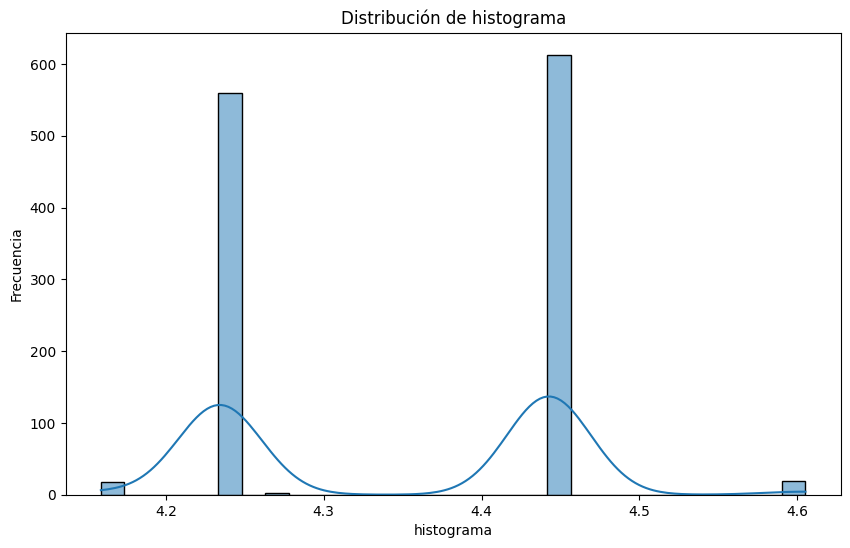

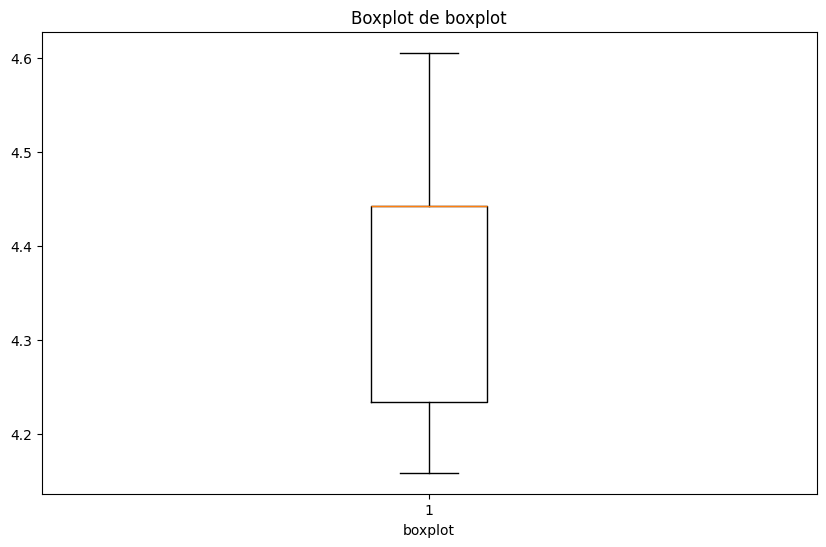

223


In [45]:
quearterly_tax_log_limpio = quearterly_tax_log_limpio[
    (quearterly_tax_log_limpio >= 4) & (quearterly_tax_log_limpio < 5)
]
histogram(quearterly_tax_log_limpio)
boxplot(quearterly_tax_log_limpio)

print(len(quearterly_tax_log) - len(quearterly_tax_log_limpio))




se puede observar que en los dos tratamientos aplicados  no se observo ninguna mejoria por lo tanto la variable quarterly tax se va

# Eliminacion de outliers y/o Transformacion para varibles Enteras

In [46]:
df_toyota_enteras.columns

Index(['mfg_month', 'mfg_year', 'hp', 'doors', 'gears', 'guarantee_period'], dtype='object')

## mfg_month y mfg_year

dichas variable no se van a contemplar en su estudio puesto que ya que estan condensadas en la variable `age_08_04_calculada`

## Gears y Doors

dicha variables no se contemplar en este estudio puesto qu se las van a eliminar ya que presentan poca varianza

## hp

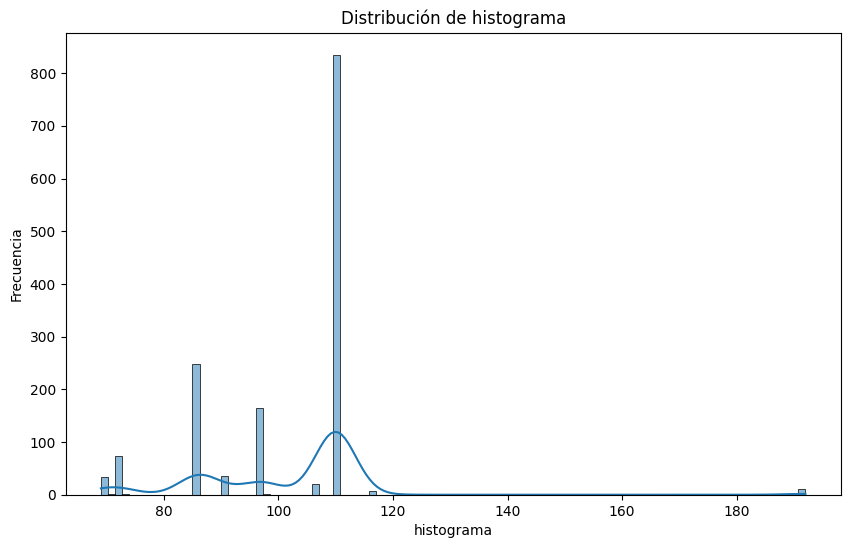

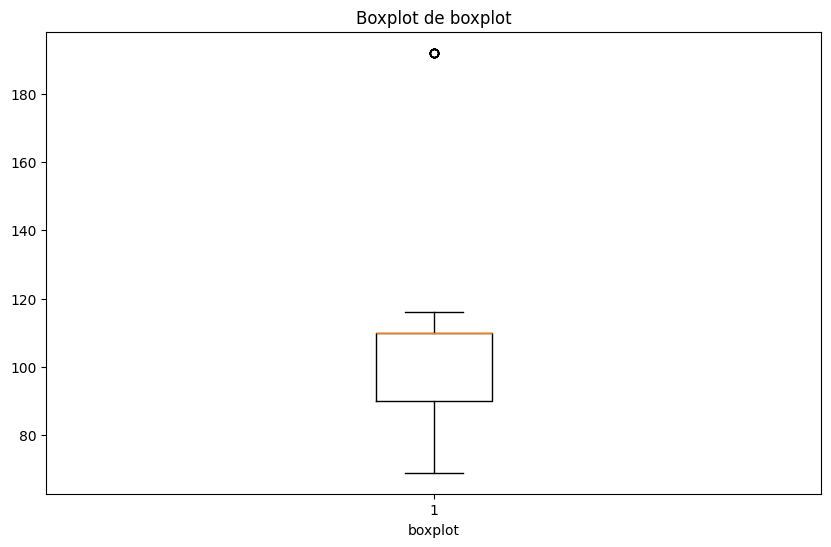

In [47]:
histogram(df_toyota_enteras['hp'],100)
boxplot(df_toyota_enteras['hp'])


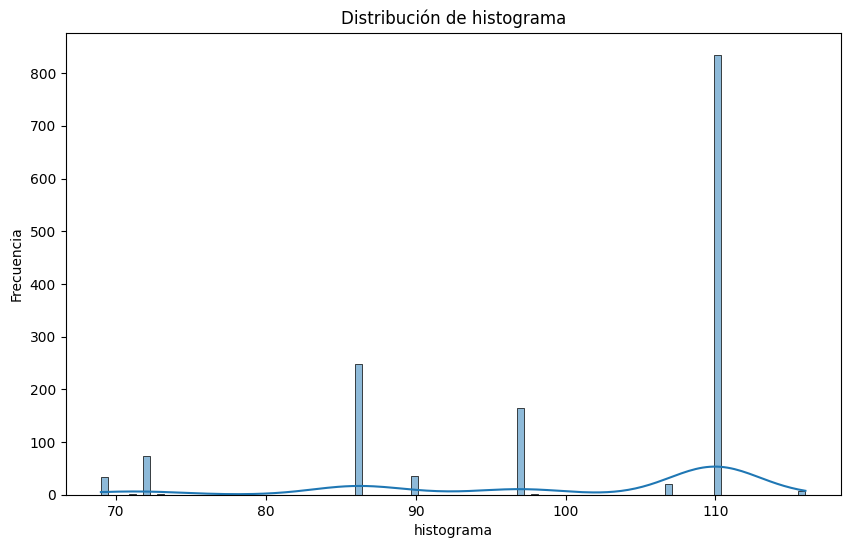

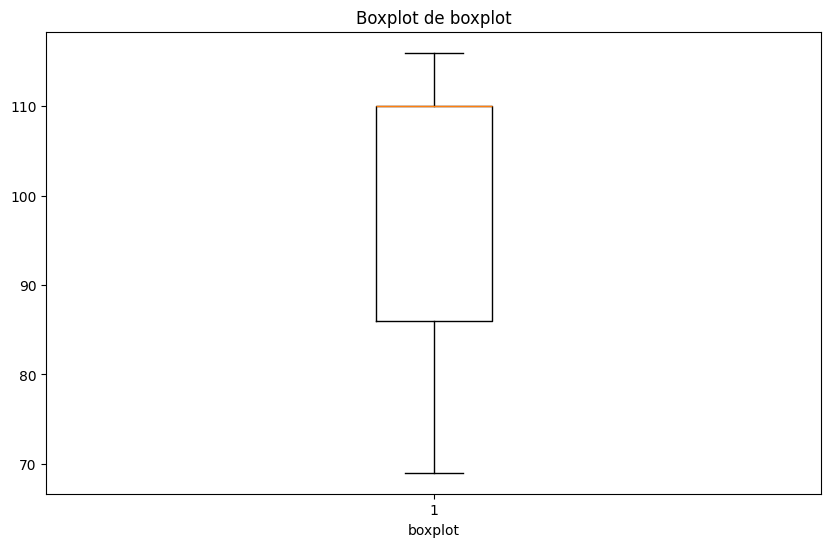

In [48]:
hp = df_toyota_enteras['hp'].copy()
hp = hp[hp!=hp.max()]
histogram(hp,100)
boxplot(hp)



no se la considera, ya que es inrescatble

## guarent_period

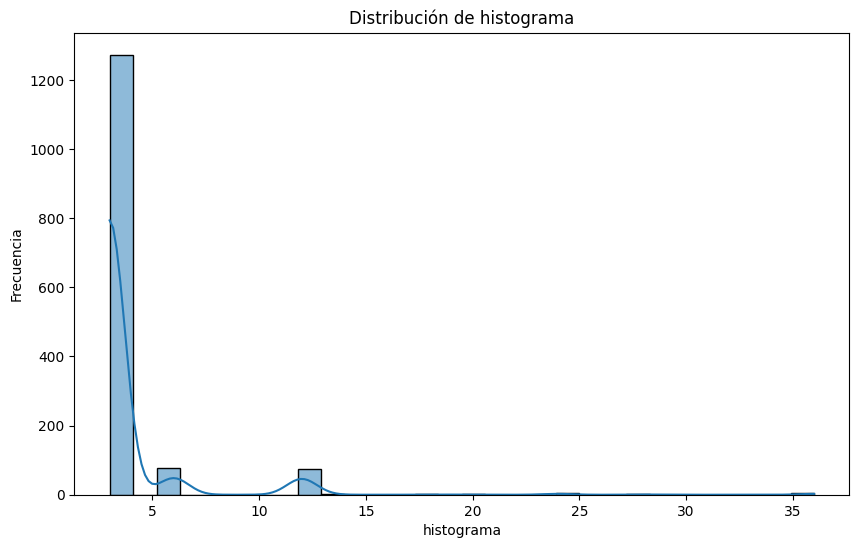

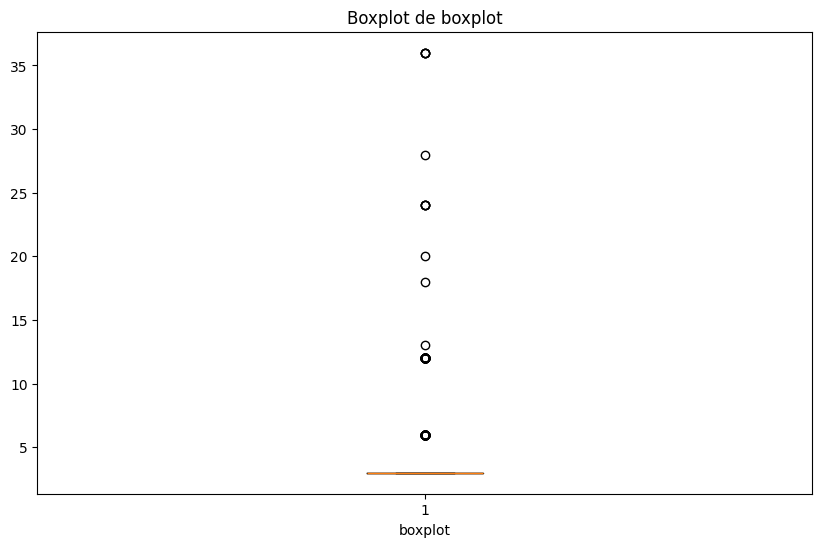

In [49]:
guarent_period = df_toyota_enteras['guarantee_period'].copy()

histogram(guarent_period)
boxplot(guarent_period)




evidentemente tiene poca varibilidad , se deb eliminar gurante_period

# Analisis Bivariado con dataframe original

In [50]:
from sklearn.preprocessing import LabelEncoder

df_toyota['fuel_type_encoded'] = LabelEncoder().fit_transform(df_toyota['fuel_type'])

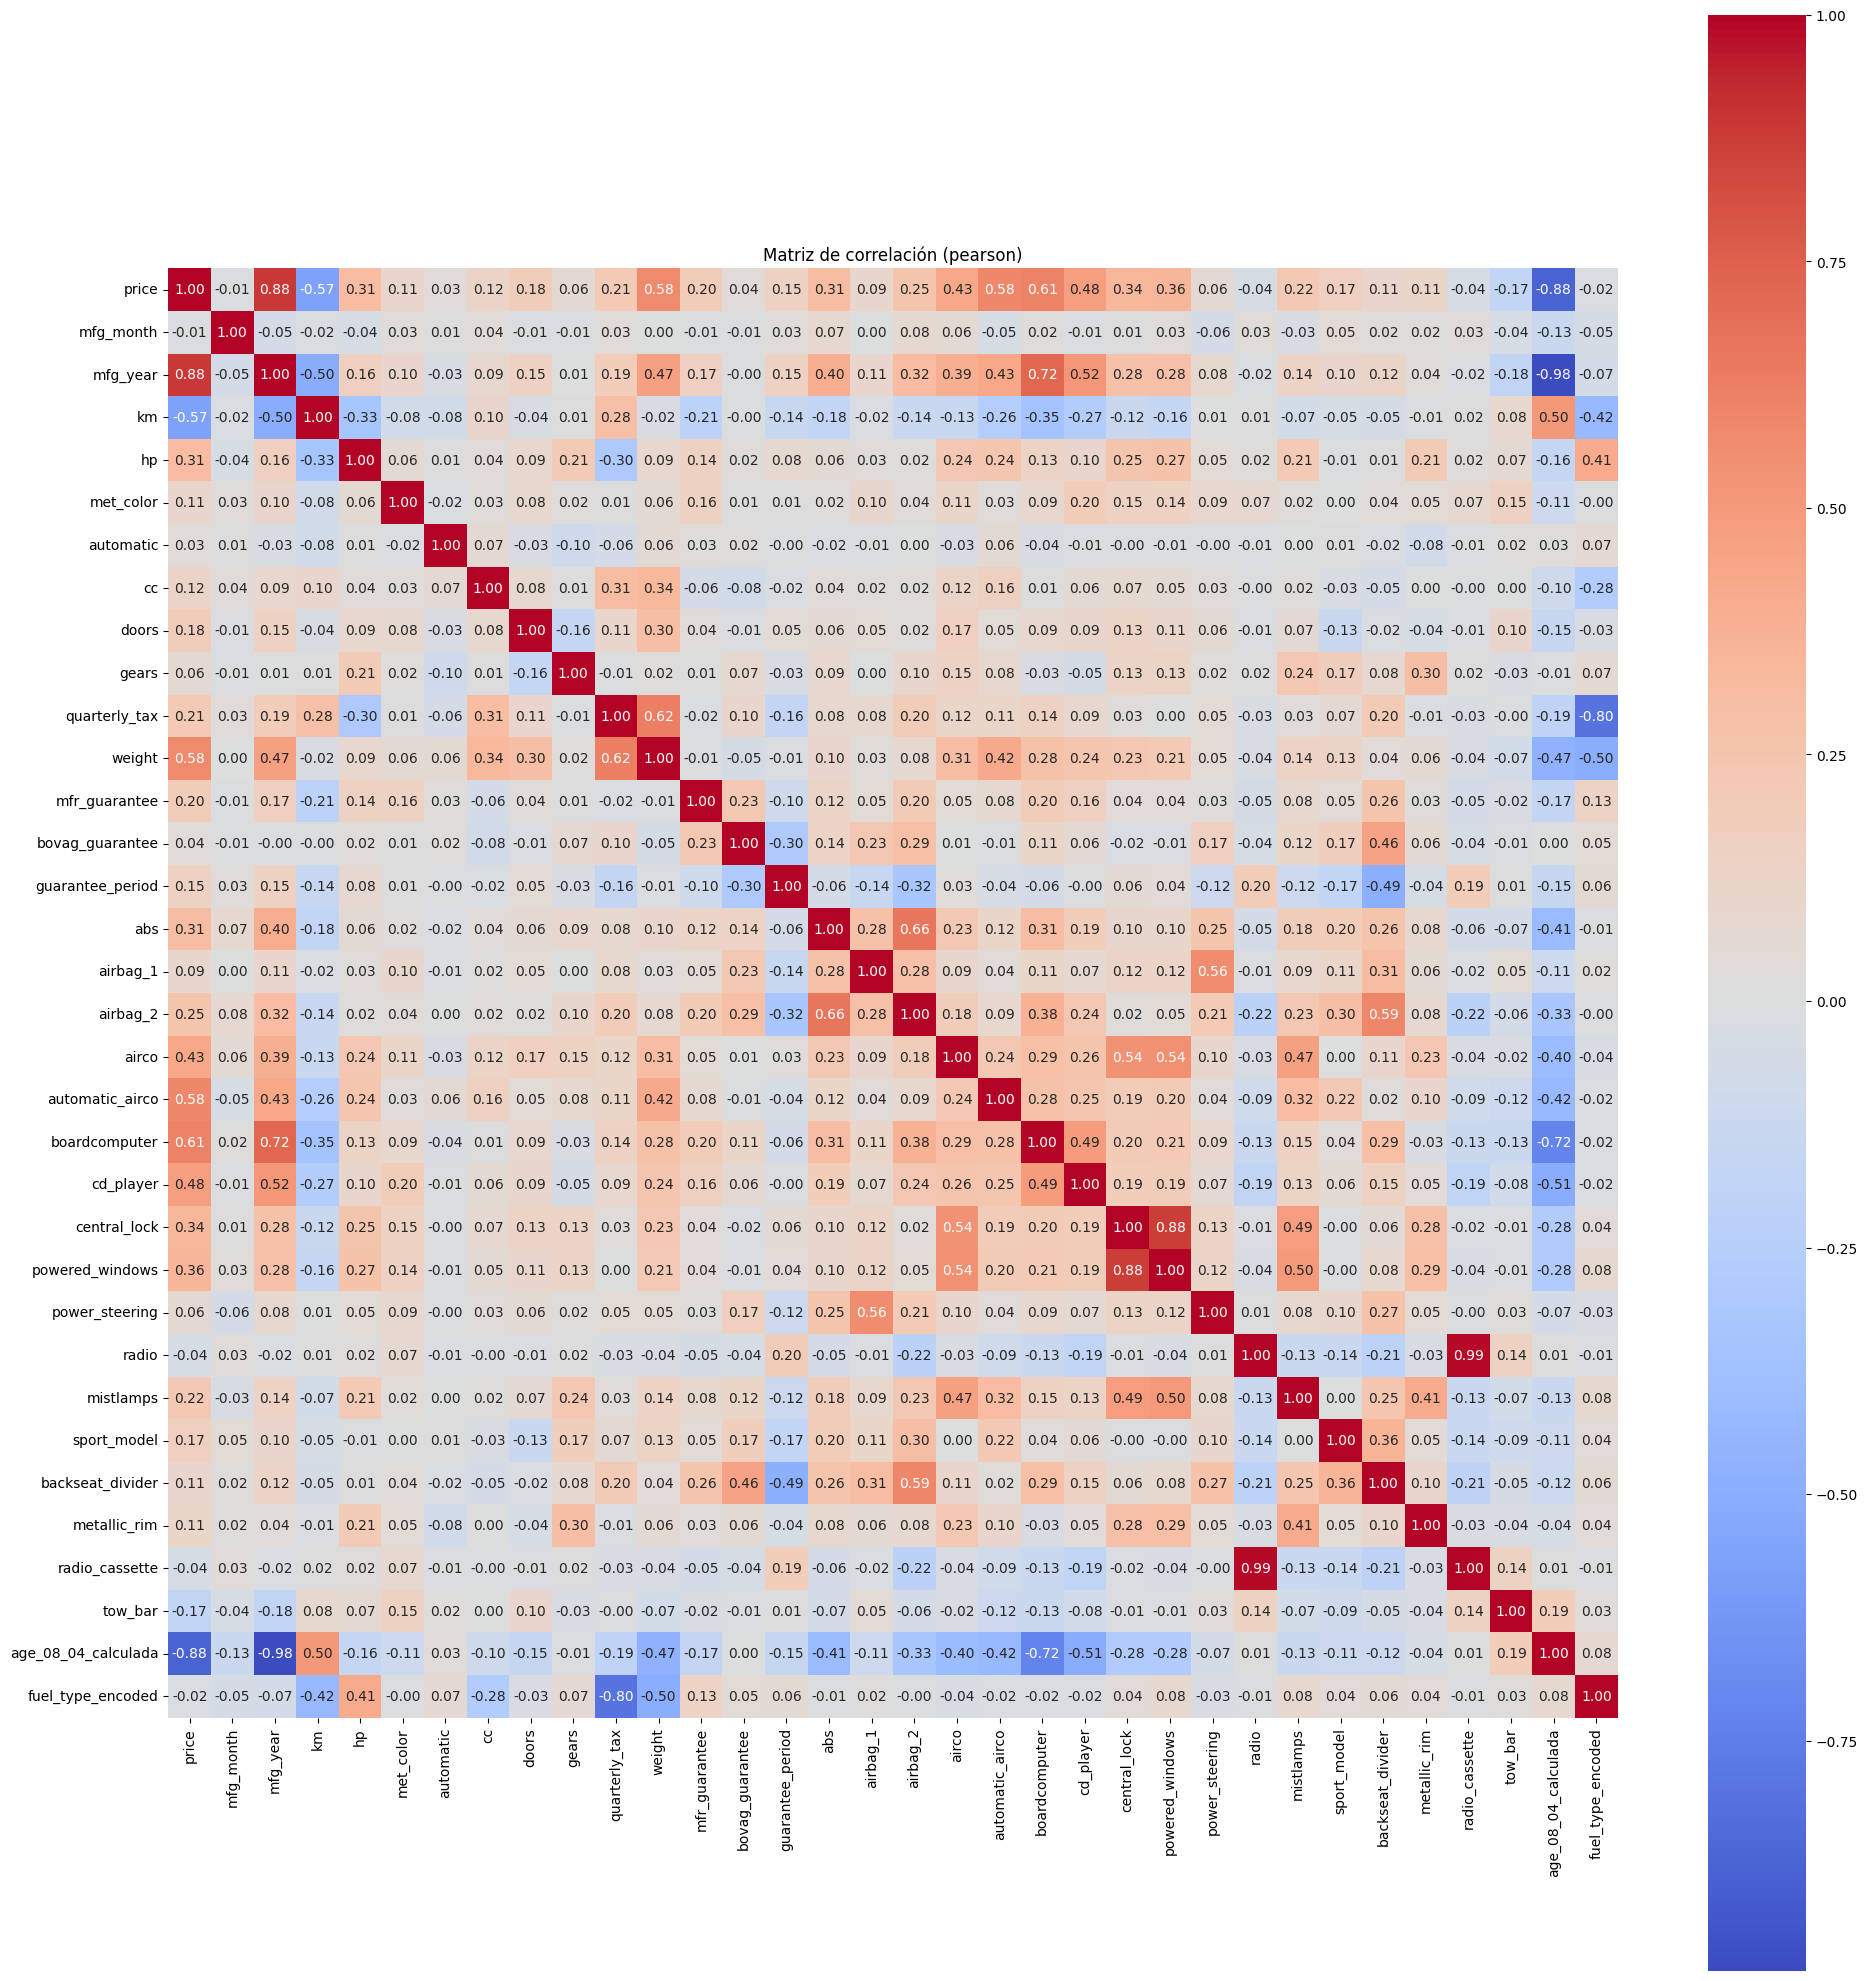

In [51]:
matriz=mostrar_matriz_correlacion(df_toyota)

Interpretación del Coeficiente de Correlación de Pearson
Los valores del coeficiente de Pearson oscilan entre -1 (correlación negativa perfecta) y 1 (correlación positiva perfecta). Un valor cercano a 0 indica ausencia de correlación lineal.

Análisis de los pares de variables:
1. `radio y radio_cassette (0.992)`

- Correlación positiva casi perfecta. Ambas variables están fuertemente relacionadas, lo que sugiere redundancia. Podría eliminarse una para evitar multicolinealidad en modelos.

2. `mfg_year y age_08_04_calculada (-0.984)`

- Correlación negativa casi perfecta. A mayor año de fabricación (mfg_year), menor edad del vehículo (age_08_04_calculada), lo cual es lógico.

3. `price y mfg_year (0.885)`

- Fuerte correlación positiva. Vehículos más nuevos tienden a ser más caros.

4. `price y age_08_04_calculada (-0.876)`

- Fuerte correlación negativa. Vehículos más antiguos tienen precios más bajos (depreciación).

5. `central_lock y powered_windows (0.875)`

- Fuerte correlación positiva. Ambas características suelen aparecer juntas en vehículos de gamas similares.

6. `quarterly_tax y fuel_type_encoded (-0.798)`

- Fuerte correlación negativa. El tipo de combustible podría influir en el impuesto trimestral (ej. combustibles más eficientes pagan menos).

7. `mfg_year y boardcomputer (0.724)`

- Correlación positiva moderada-fuerte. Vehículos recientes suelen incluir computadora de abordo.

8. `boardcomputer y age_08_04_calculada (-0.722)`

- Correlación negativa moderada-fuerte. Vehículos antiguos tienen menos probabilidad de incluir computadora de abordo.

9. `abs y airbag_2 (0.662)`

- Correlación positiva moderada. Ambas son características de seguridad que suelen coexistir en vehículos de gama alta.

conclusiones :

- Evitar multicolinealidad: Si dos variables están muy correlacionadas  considera eliminar una o usar una tecnica PCA




para evitar multicolinealidad en la selccion de feature se va eliminar las siguientes variables:

- `mfg_year` que tiene alta correlacion con age_08_04_calculada, ademas age_04_08 calculada expresa mejor la edad del vehiculo

- `radio_cassete` las dos tienen tienen las misma correlacion con la target asi como borramos radio casset

- `central lock`  ya que powered_windows tiene mas correlacion con la target

- `board computer` ya que age_08_04_calculada tiene mejor correlacion con la target

- `airbag2`   ya que abs tiene mejor correlacion con la target

- `fuel type` ya que los imopuestos tienemejor correlacion con la target

# Analisis Bivariado con dataframe Limpio

antes de empezar a hacer el analisis bivariado vamos dejar el dataset limpio y aplicarle todos los cambios que le veniamos haciendo 

In [56]:
df_toyota_limpio = df_toyota.copy()

Aplicamos la limpieza de outliers en price

In [57]:
_ , mask_df_price_1 = limpiar_outliers_z_core(df_toyota_limpio['price'])
df_toyota_limpio = df_toyota_limpio[mask_df_price_1]
_ , mask_df_price_2 = limpiar_outliers_z_core(df_toyota_limpio['price'])
df_toyota_limpio = df_toyota_limpio[mask_df_price_2]



aplicamos limpeiza de outliers a `km`

In [58]:
_ , mask_df_km = limpiar_outliers_z_core(df_toyota_limpio['km'])
df_toyota_limpio = df_toyota_limpio[mask_df_km]


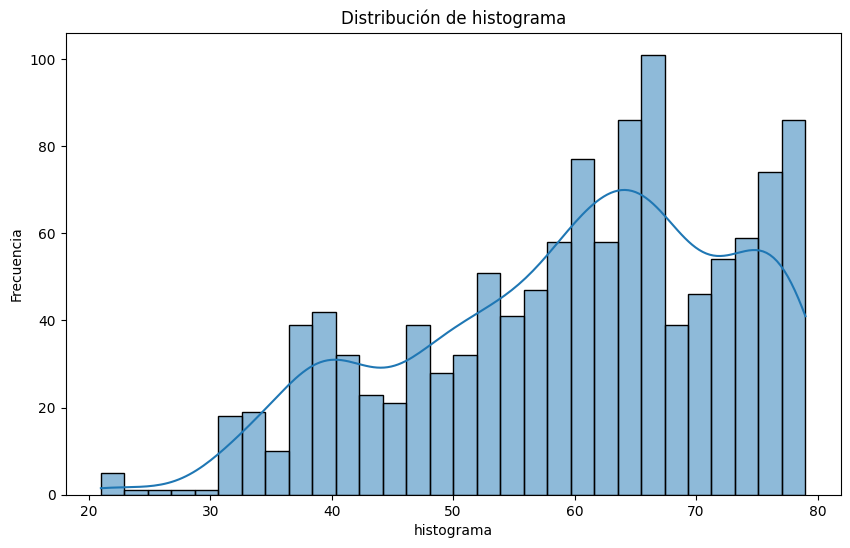

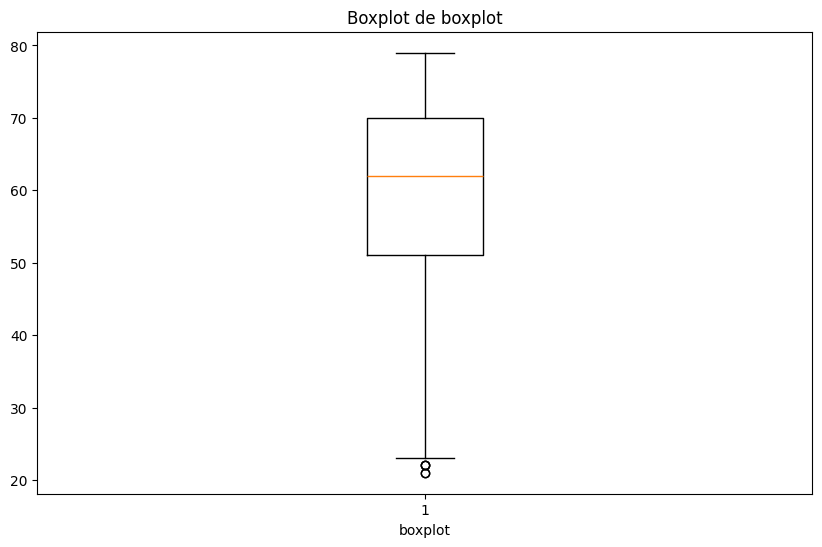

In [59]:
histogram(df_toyota_limpio['age_08_04_calculada'])
boxplot(df_toyota_limpio['age_08_04_calculada'])

Limpiamos `age_08_04_calculada` 

12


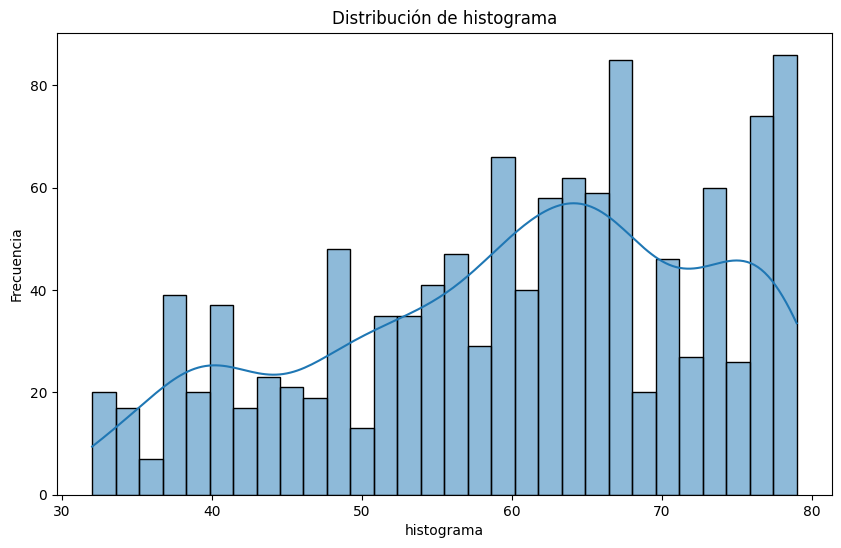

In [60]:
age = df_toyota_limpio['age_08_04_calculada'].copy()
age.describe()

outliers_age= age[age<32]

print(len(outliers_age) )

_ , mask_age = filtrar_columna_por_rango(age,32,age.max())

df_toyota_limpio = df_toyota_limpio[mask_age]

histogram(df_toyota_limpio['age_08_04_calculada'])






Eliminamos las columnas que se mencionaron en el anterior analisis

In [61]:
df_toyota_limpio.drop(columns=['quarterly_tax', 'cc', 'weight','mfg_month', 'mfg_year', 'hp', 'doors', 'gears', 'guarantee_period','airbag_1', 'automatic_airco', 'power_steering', 'automatic','fuel_type'], axis=1, inplace=True)

In [62]:
df_toyota_limpio.shape

(1177, 21)

mostraremos matriz de correlacion y scatterplot

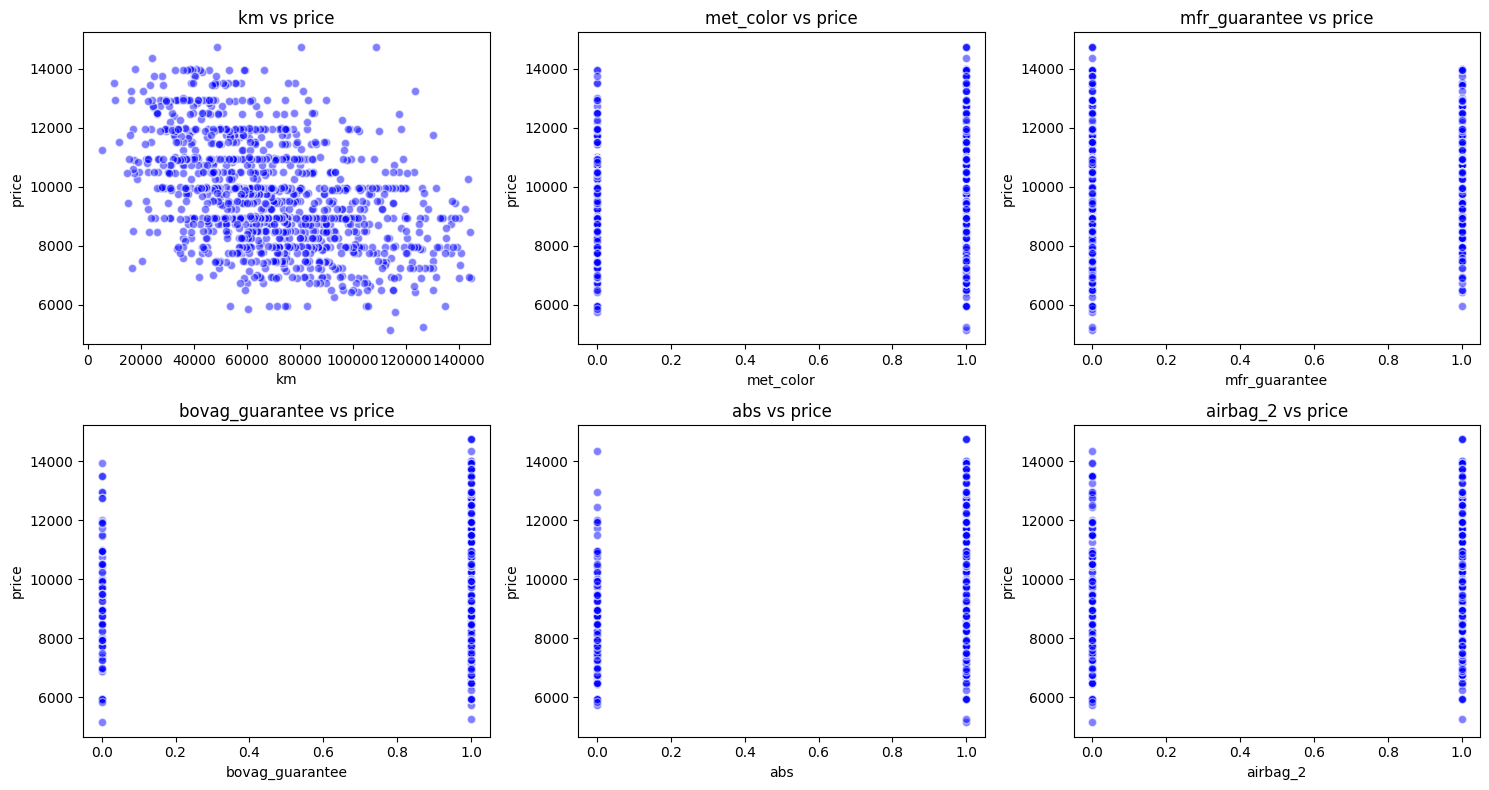

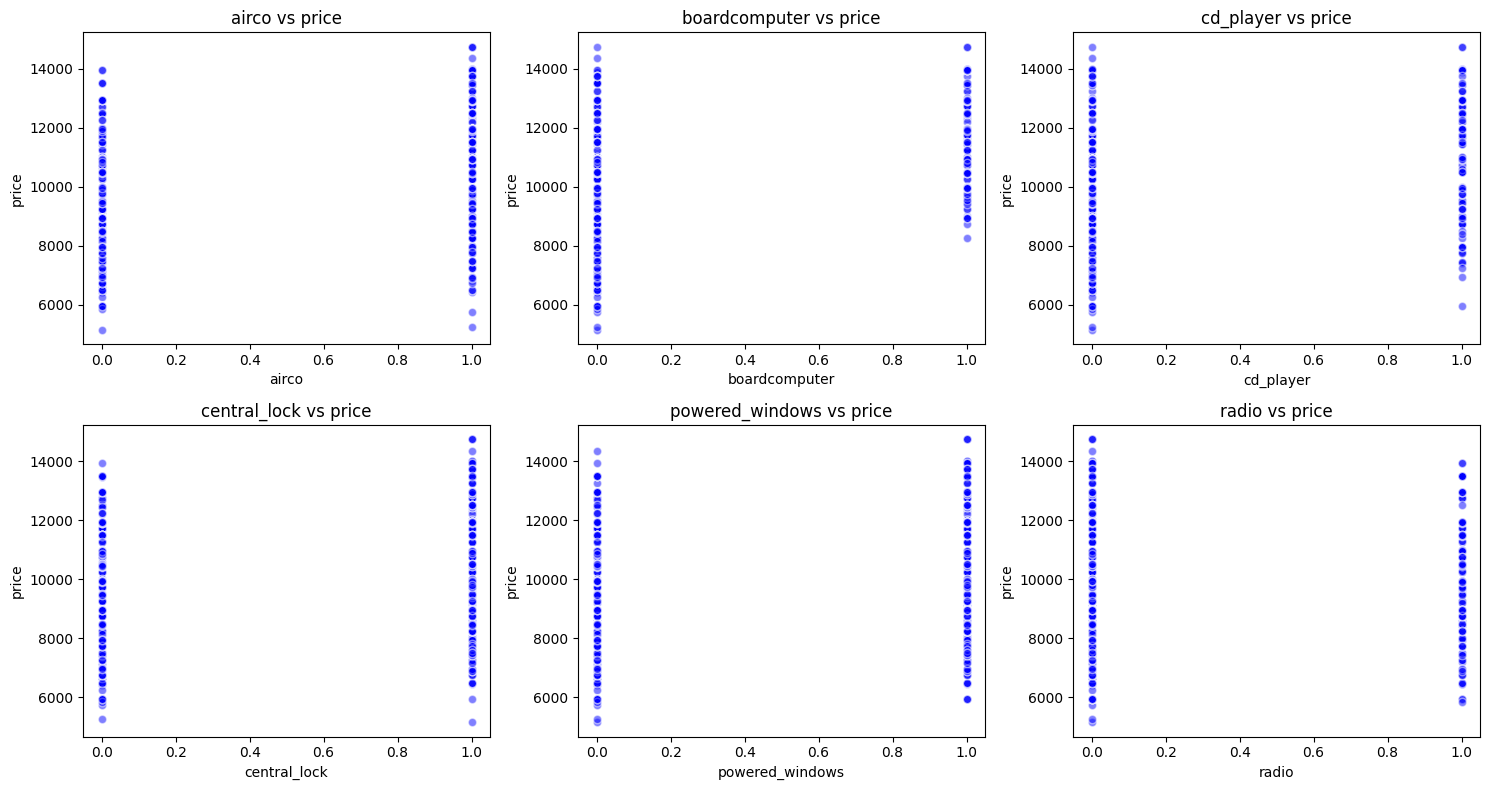

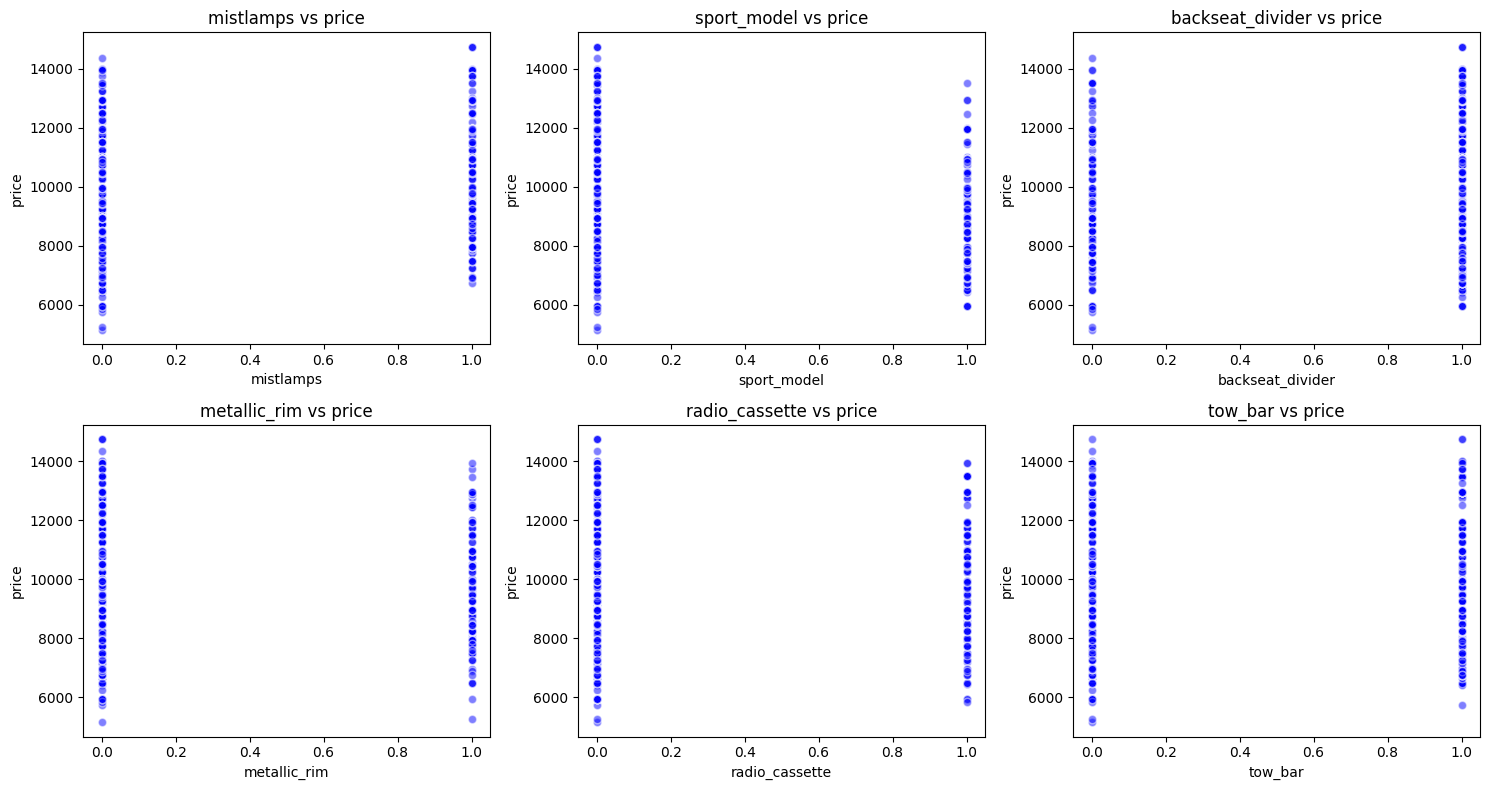

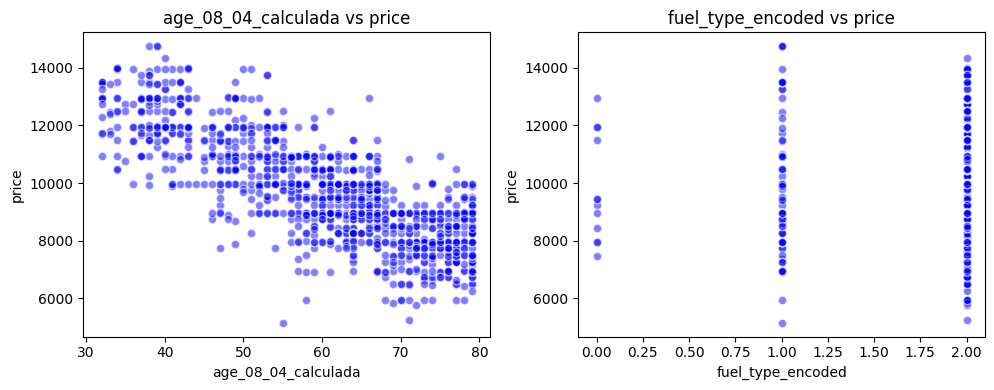

In [63]:
scatter_por_lotes(df_toyota_limpio)

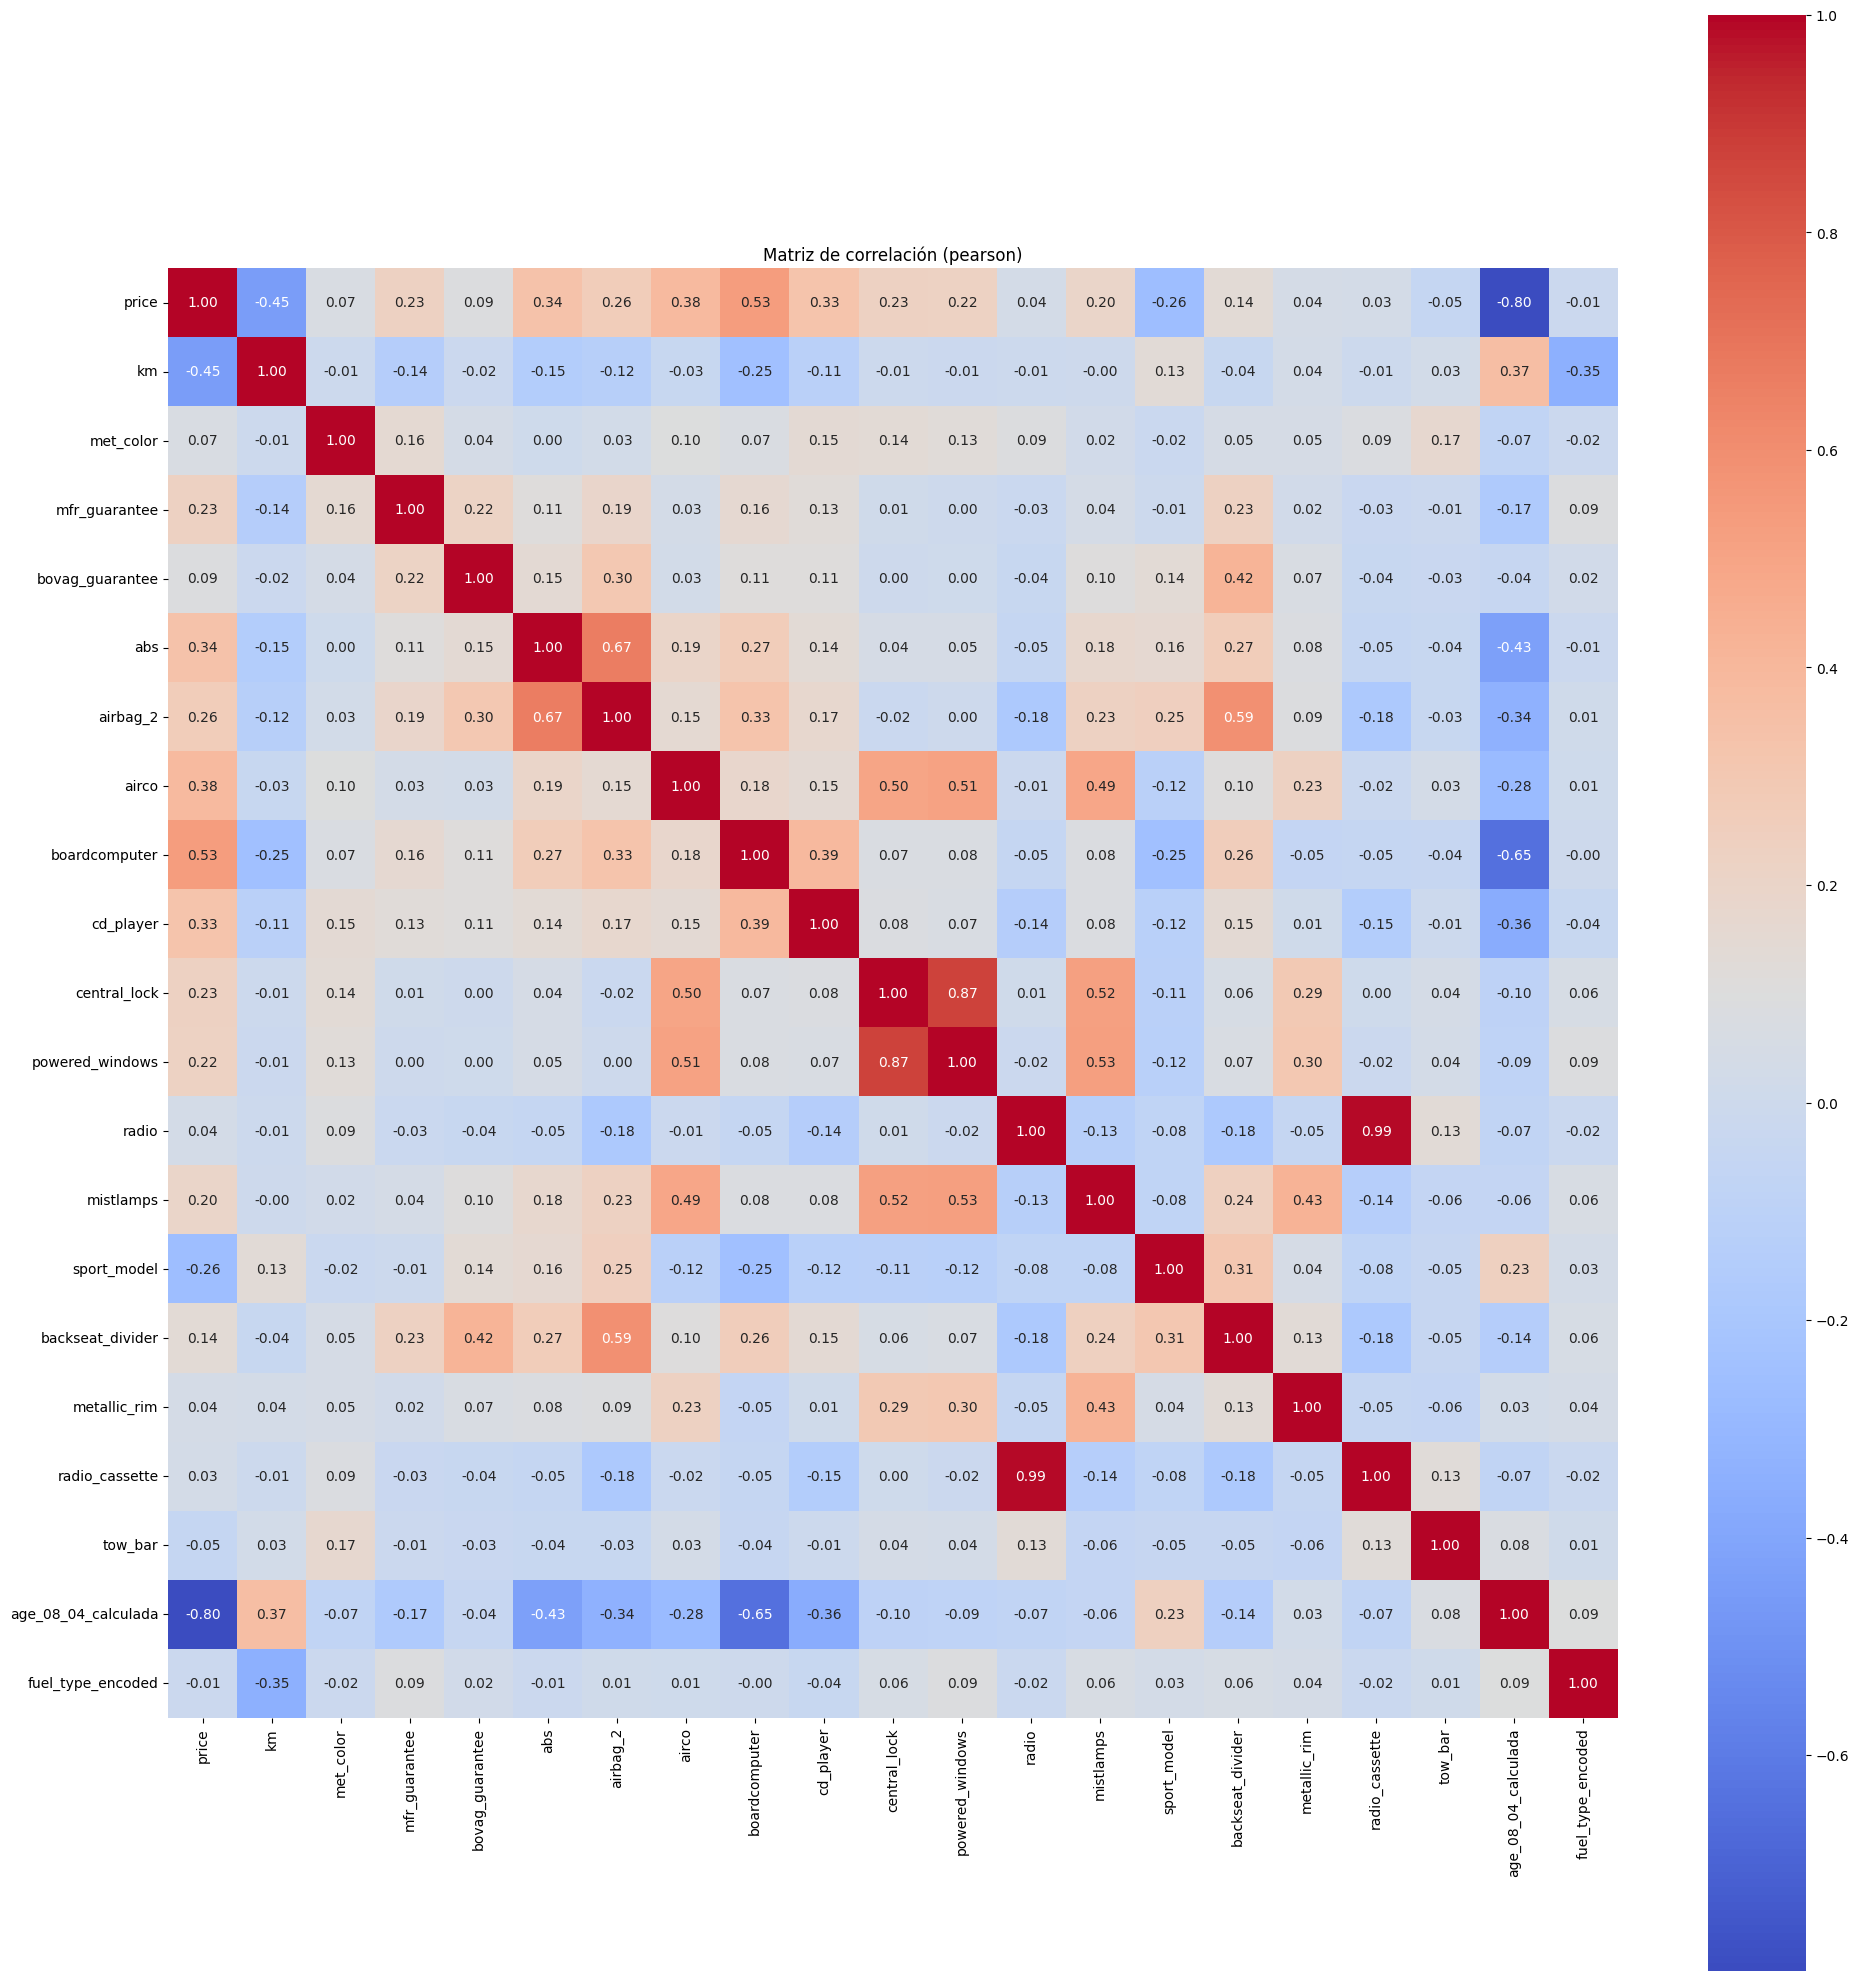

In [64]:
mostrar_matriz_correlacion(df_toyota_limpio)

In [65]:
obtener_correlaciones_target(df_toyota_limpio.corr(), 'price')

variable  correlacion
7         boardcomputer     0.533503
6                 airco     0.382220
4                   abs     0.337938
8             cd_player     0.329207
5              airbag_2     0.263527
2         mfr_guarantee     0.232675
9          central_lock     0.228966
10      powered_windows     0.223330
12            mistlamps     0.196633
14     backseat_divider     0.141420
3       bovag_guarantee     0.090061
1             met_color     0.066555
15         metallic_rim     0.038572
11                radio     0.035277
16       radio_cassette     0.031154
19    fuel_type_encoded    -0.014165
17              tow_bar    -0.049435
13          sport_model    -0.260344
0                    km    -0.446720
18  age_08_04_calculada    -0.798482

mostramos los pares correlacioanes mayores para poder eliminarlos para evitar la multicolinealidad

In [66]:
pares_correlacion_altas(df_toyota_limpio.corr(),0.60)

Variable_1           Variable_2  Correlación
0          radio       radio_cassette     0.990406
1   central_lock      powered_windows     0.871258
2          price  age_08_04_calculada    -0.798482
3            abs             airbag_2     0.668578
4  boardcomputer  age_08_04_calculada    -0.648529

- `radio` y `radio_cassete` muy correlacionadas nos quedamos con la primera

- `central_lock` y `powered_windows` muy correlacionadas nos quedamos con la primera

- `abs` y `airbag_2` muy correlacionadas nos quedamos con la primera

- `age_08_04_calculada` y `boardcomputer` muy correlacionadas nos quedamos con la primera




In [67]:
df_toyota_limpio.drop(columns=['radio_cassette','powered_windows','airbag_2','boardcomputer'], axis=1, inplace=True)
df_toyota_limpio.shape



(1177, 17)

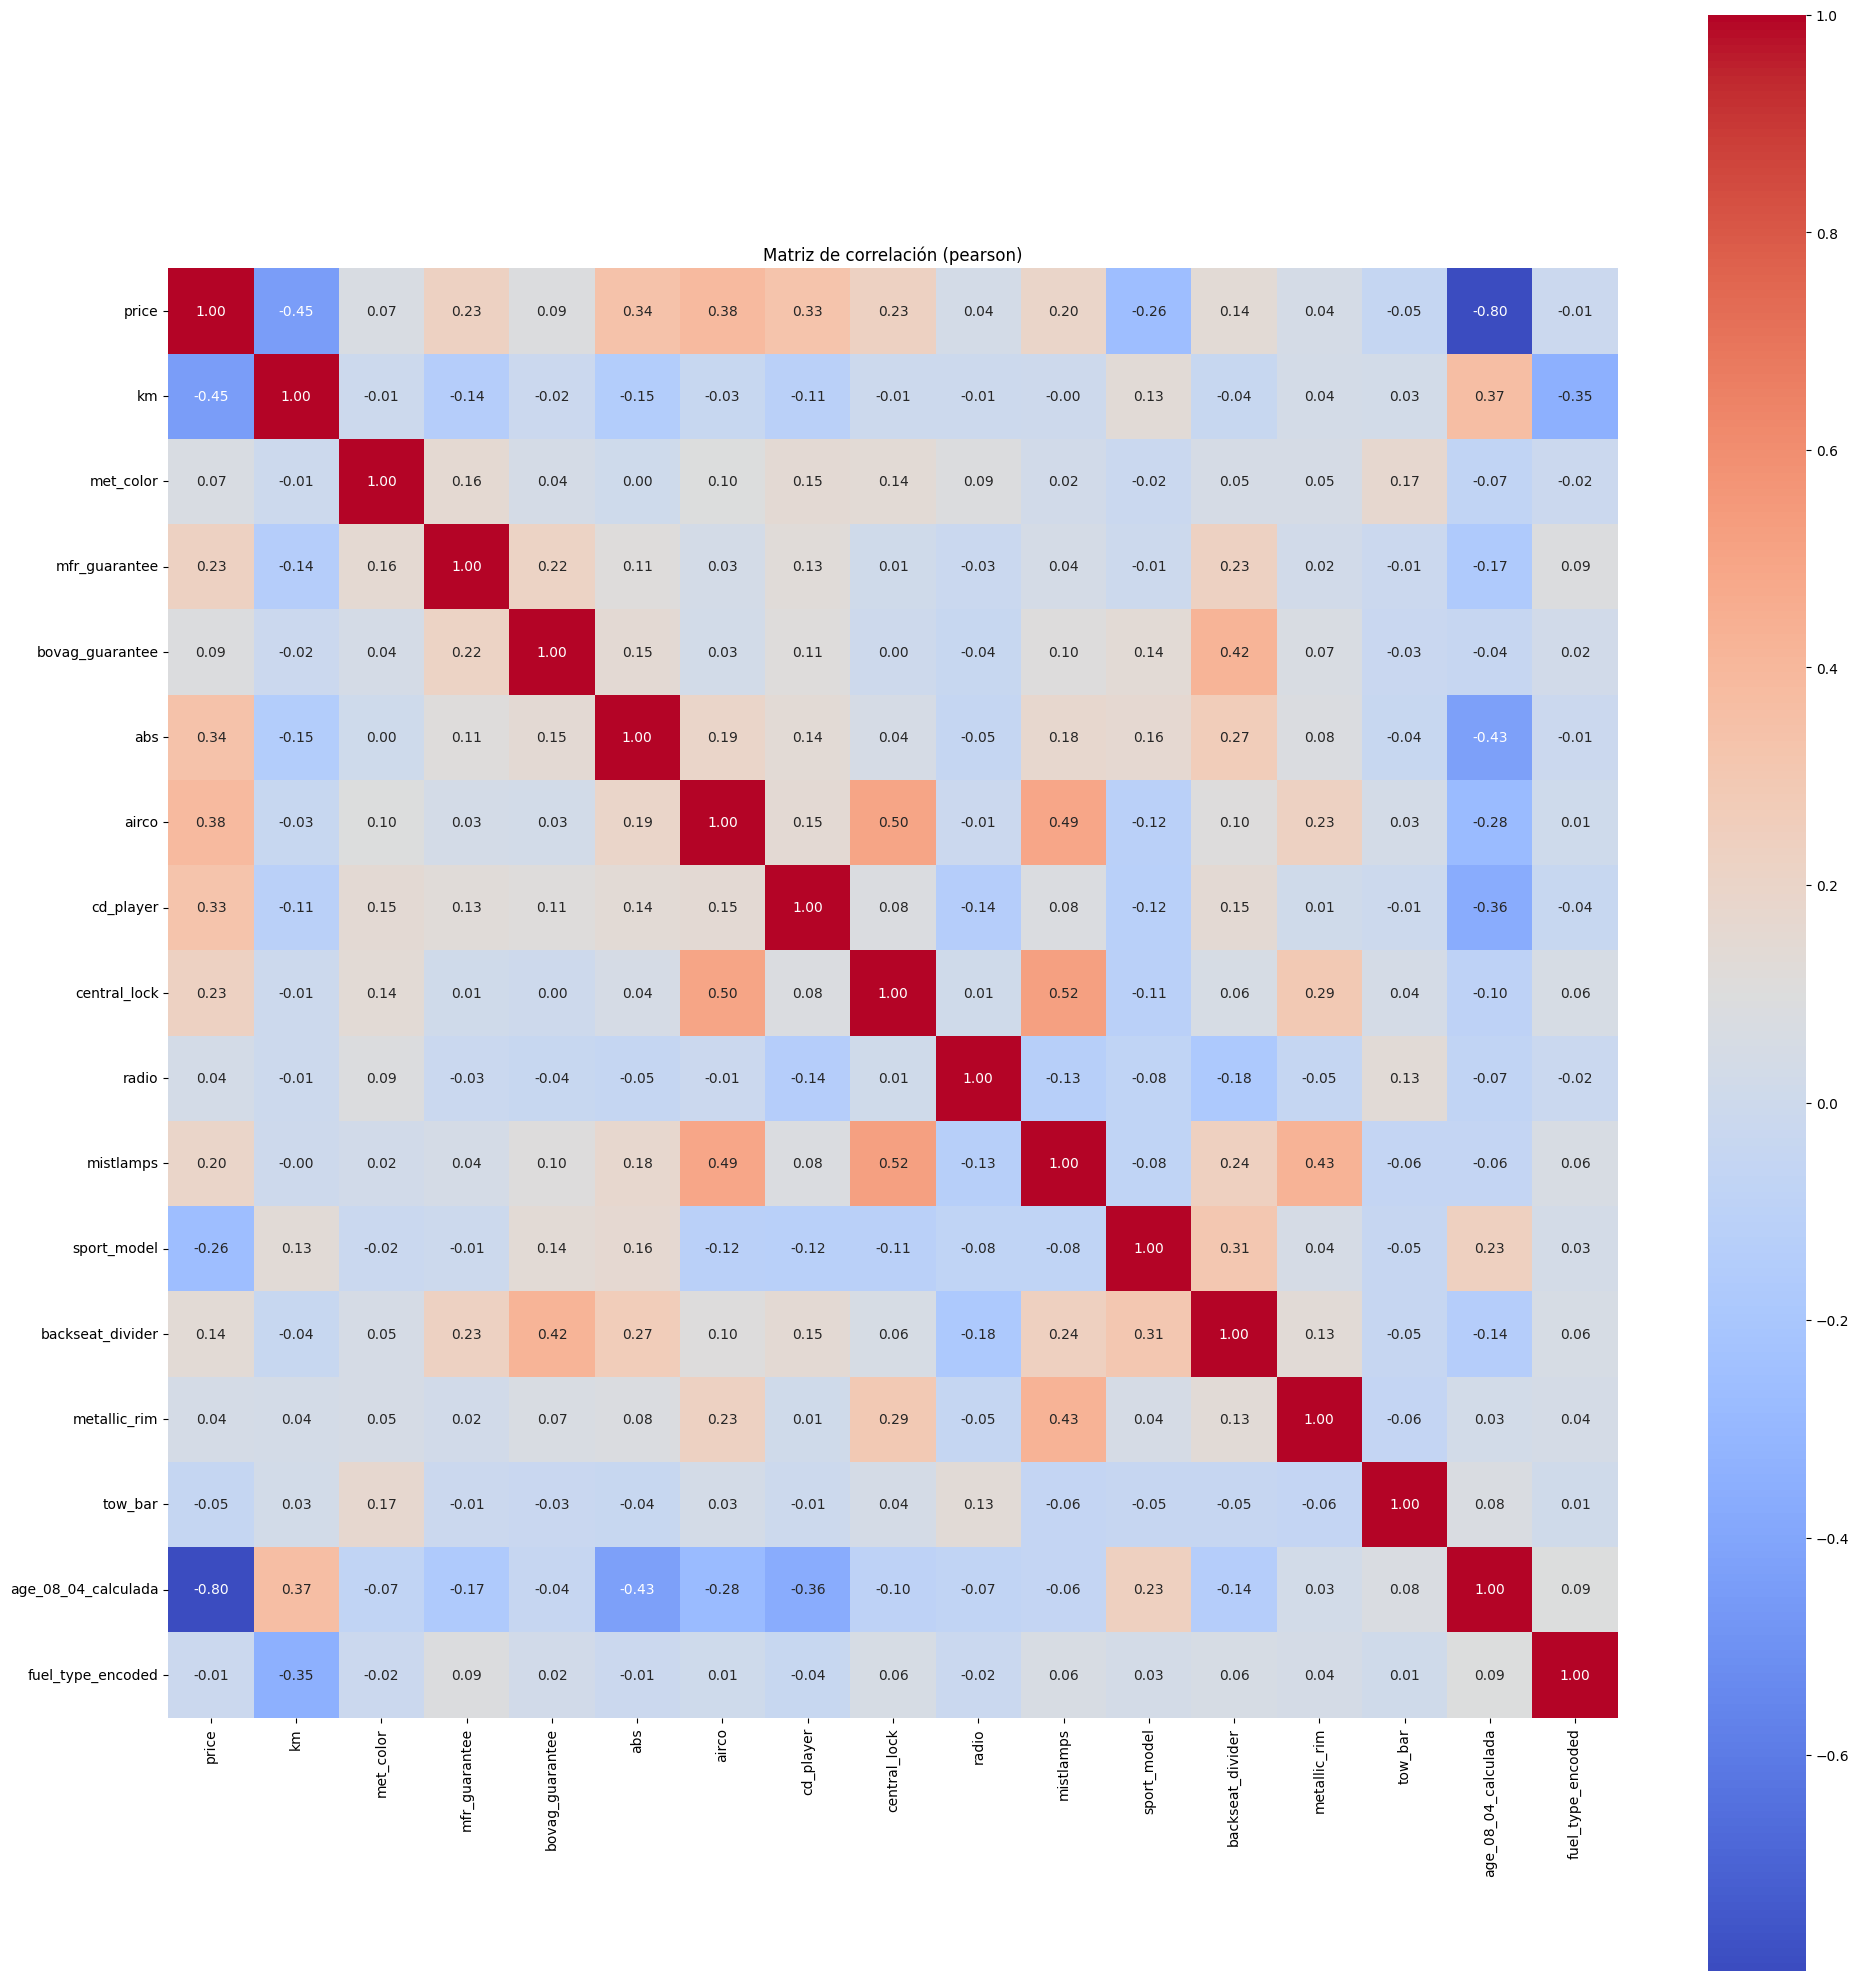

In [68]:
mostrar_matriz_correlacion(df_toyota_limpio)

In [ ]:
import os
output_dir = "output"
os.makedirs(output_dir, exist_ok=True)
csv_path = os.path.join(output_dir, "data_clean.csv")
df_toyota_limpio.to_csv(csv_path, index=False)



# Acciones a aplicar en el asset `filtrado_y_limpieza`

Eliminamos todas las variables que tengan una correlacion menor igual a 0.20

In [69]:


# Calculamos la correlación de todas las columnas con la variable objetivo
correlations = df_toyota_limpio.corr(numeric_only=True)['price'].abs()

# Seleccionamos las columnas con correlación >= 0.20
relevant_features = correlations[correlations >= 0.20].index

# Creamos un nuevo DataFrame con solo las variables relevantes
df_filtered = df_toyota_limpio[relevant_features]


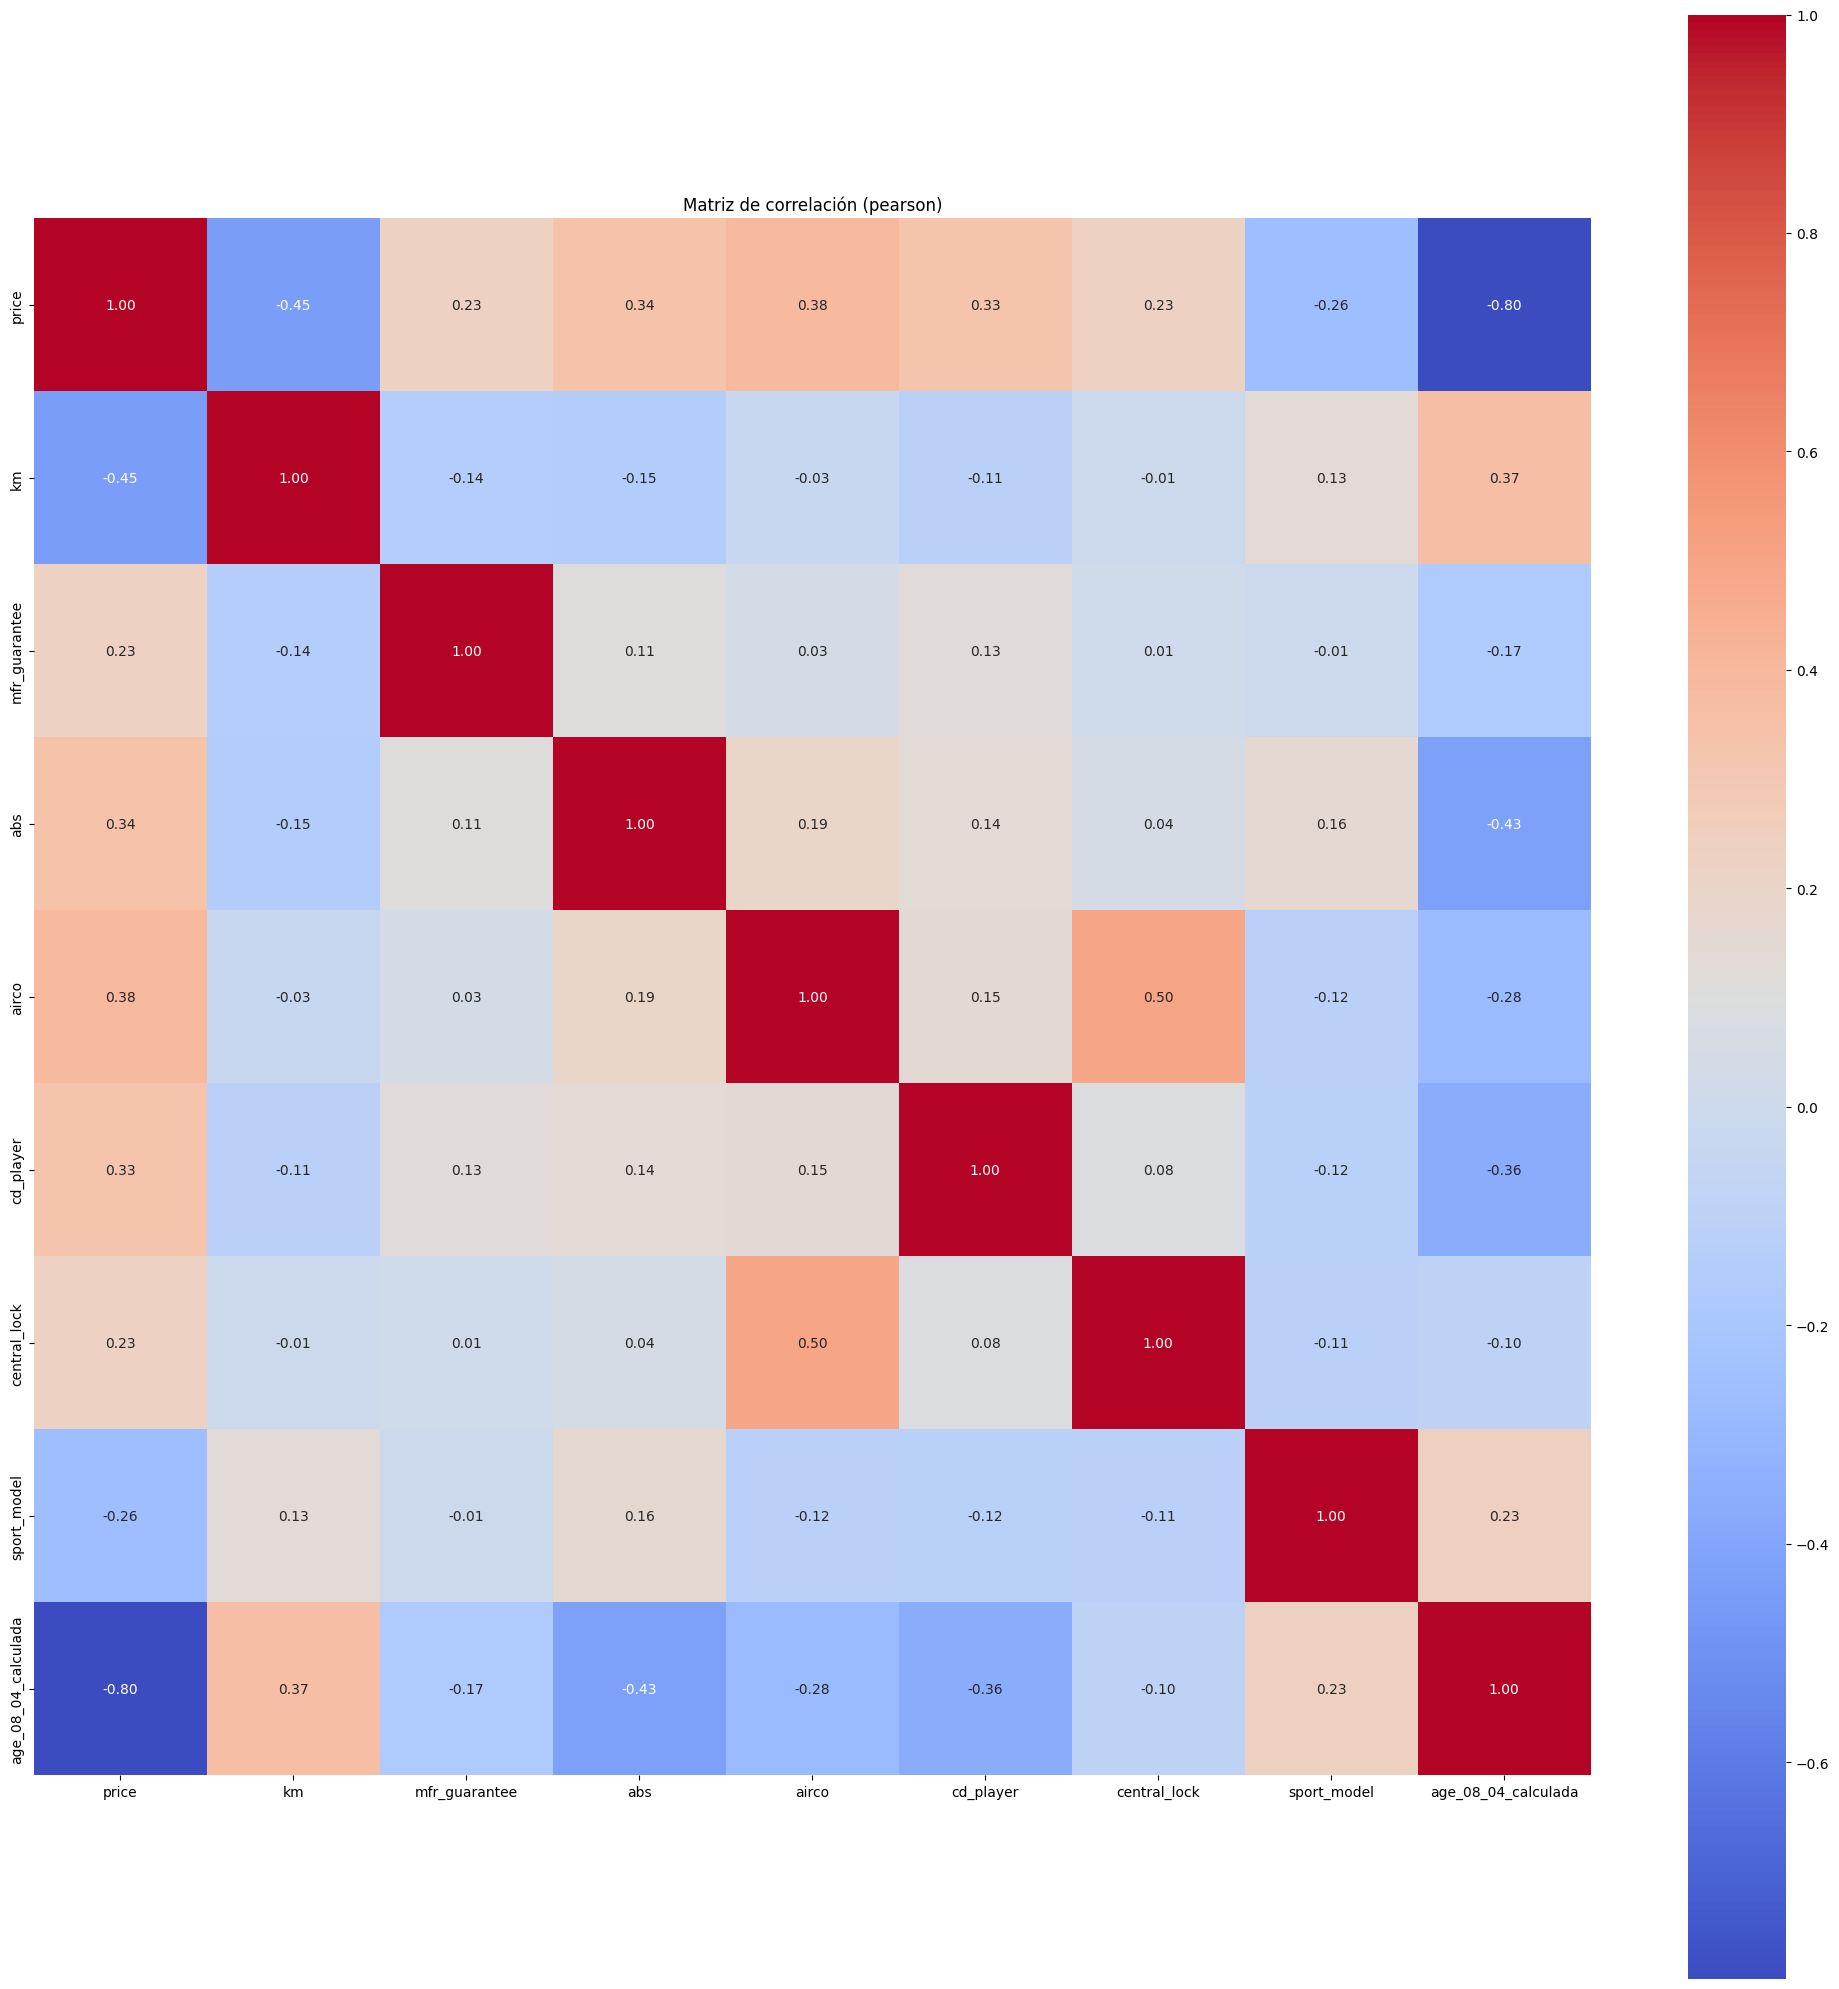

In [70]:
mostrar_matriz_correlacion(df_filtered)

## TRANSFORMACION DE FEATURE

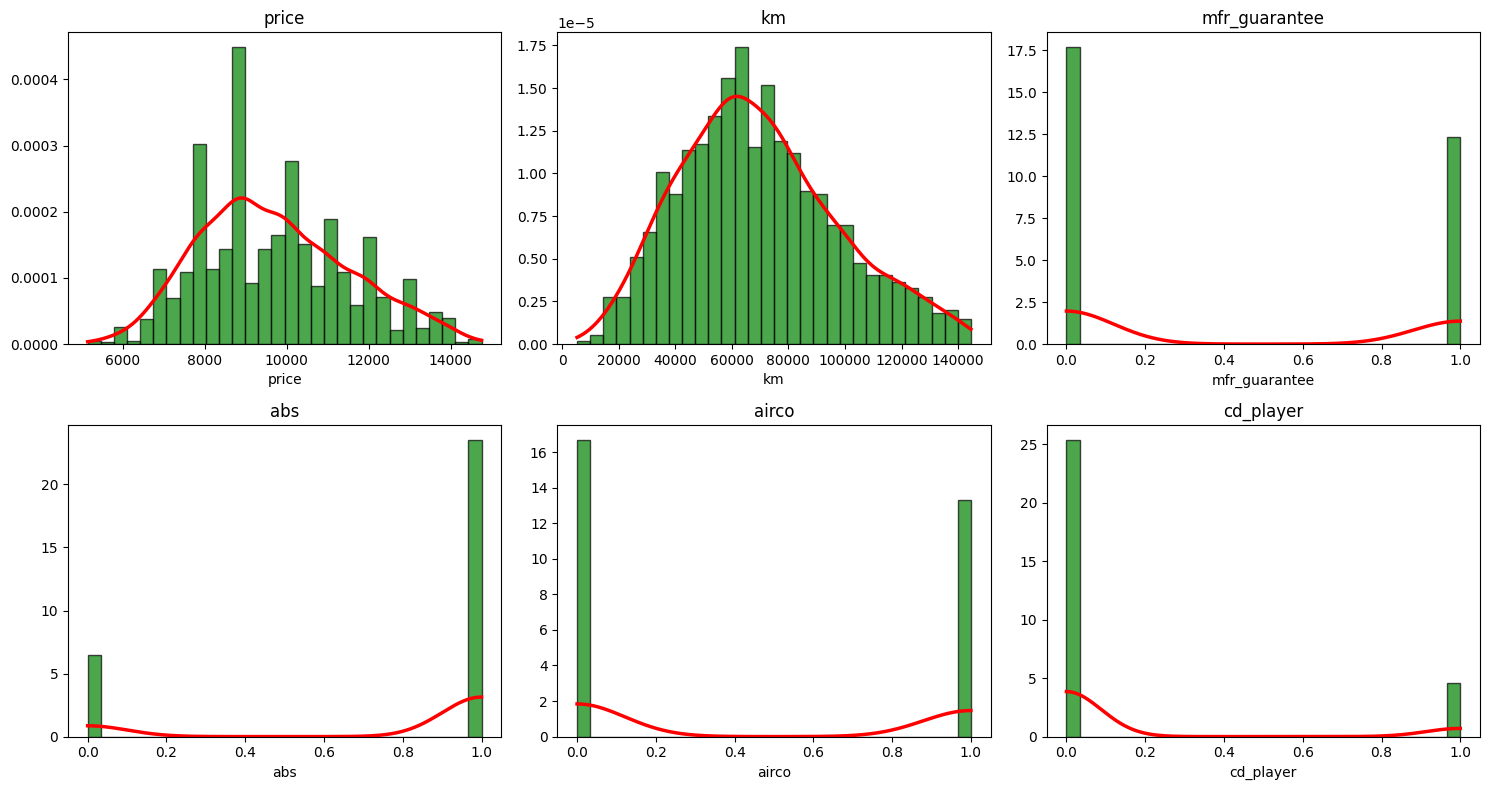

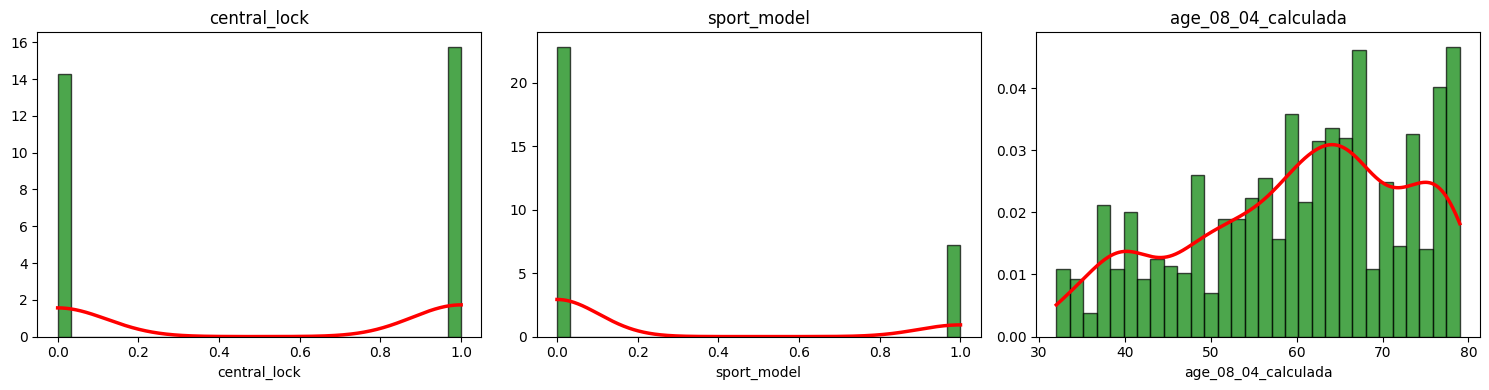

In [73]:
histogram_por_lotes(df_filtered)

Index(['price', 'km', 'mfr_guarantee', 'abs', 'airco', 'cd_player',
       'central_lock', 'sport_model', 'age_08_04_calculada'],
      dtype='object')


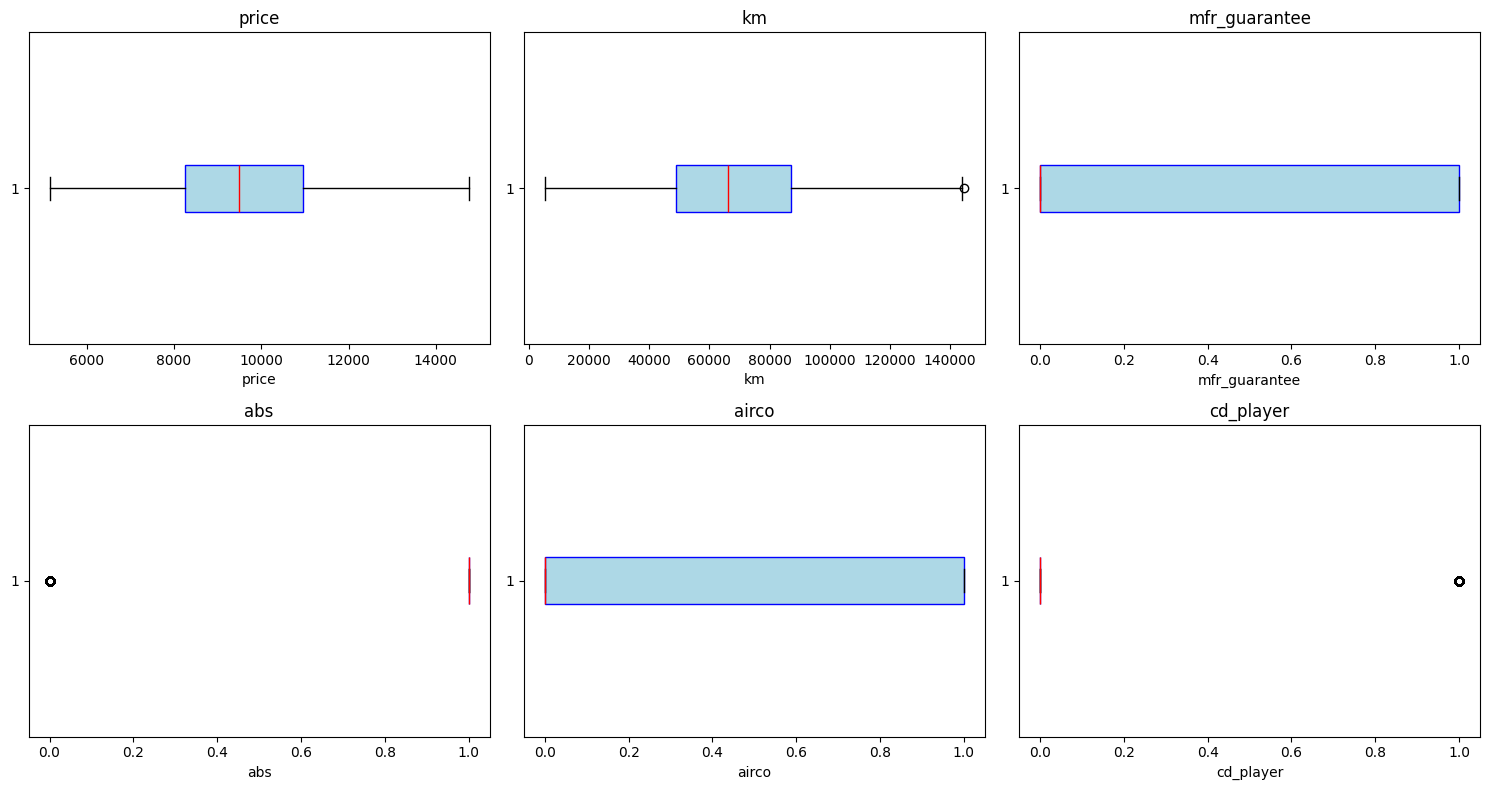

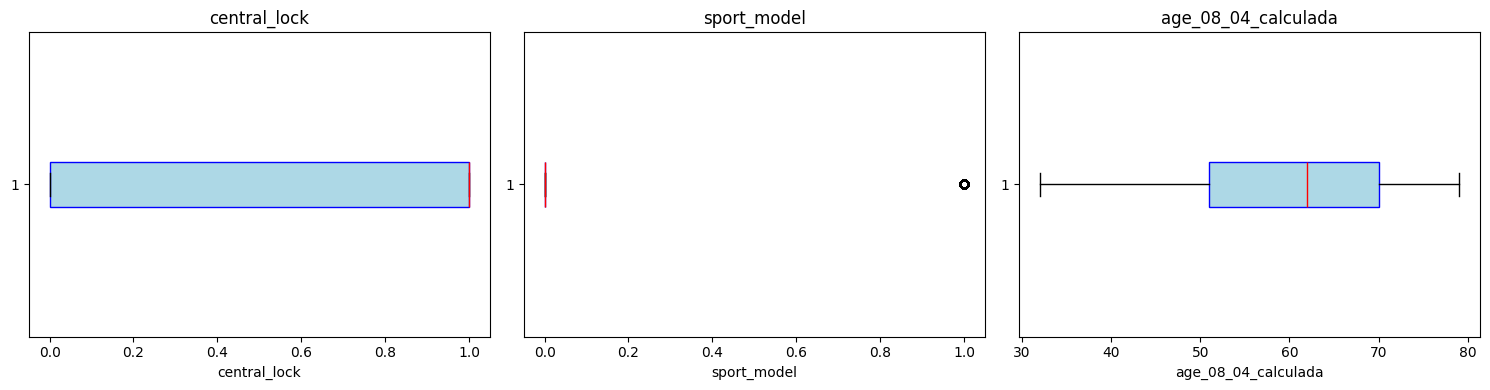

In [74]:
boxplots_por_lotes(df_filtered)

Evidentemente tenemos un problema con las escalas, puesto que en el modelo se van considerar variables binarias por lo tanto vamos a aplicar una tecnica de normalizacion de datos llamda `Min-Max Scaling`  a la siguientes variables: 

- `km`

- `price`

- `age_08_04_calculada`



In [129]:
df_filtered['km'].describe()

count      1177.000000
mean      69480.117188
std       27847.095703
min        5309.000000
25%       49000.000000
50%       66168.000000
75%       87000.000000
max      144521.000000
Name: km, dtype: float64

In [75]:
df_filtered_normalizado = df_filtered.copy()

In [76]:
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()

df_filtered_normalizado['age_08_04_calculada'] = scaler.fit_transform(df_filtered_normalizado['age_08_04_calculada'].values.reshape(-1, 1))

df_filtered_normalizado['km'] = scaler.fit_transform(df_filtered_normalizado['km'].values.reshape(-1, 1))

df_filtered_normalizado['price'] = scaler.fit_transform(df_filtered_normalizado['price'].values.reshape(-1, 1))




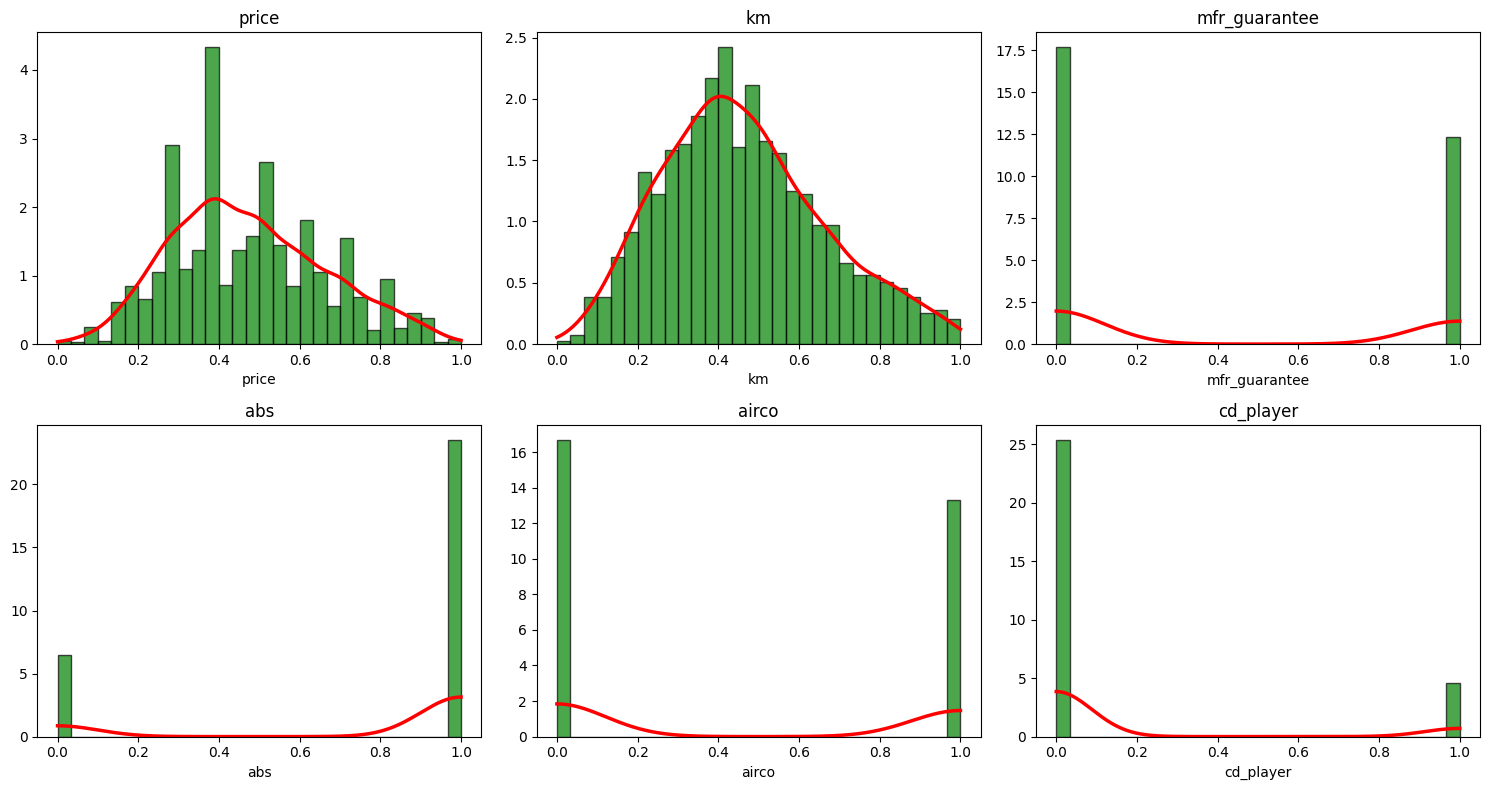

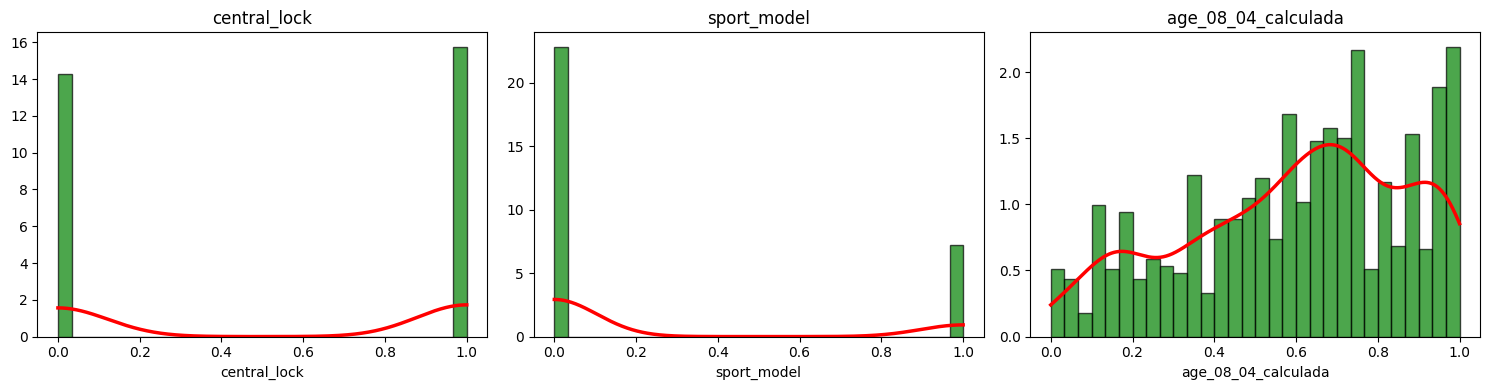

Index(['price', 'km', 'mfr_guarantee', 'abs', 'airco', 'cd_player',
       'central_lock', 'sport_model', 'age_08_04_calculada'],
      dtype='object')


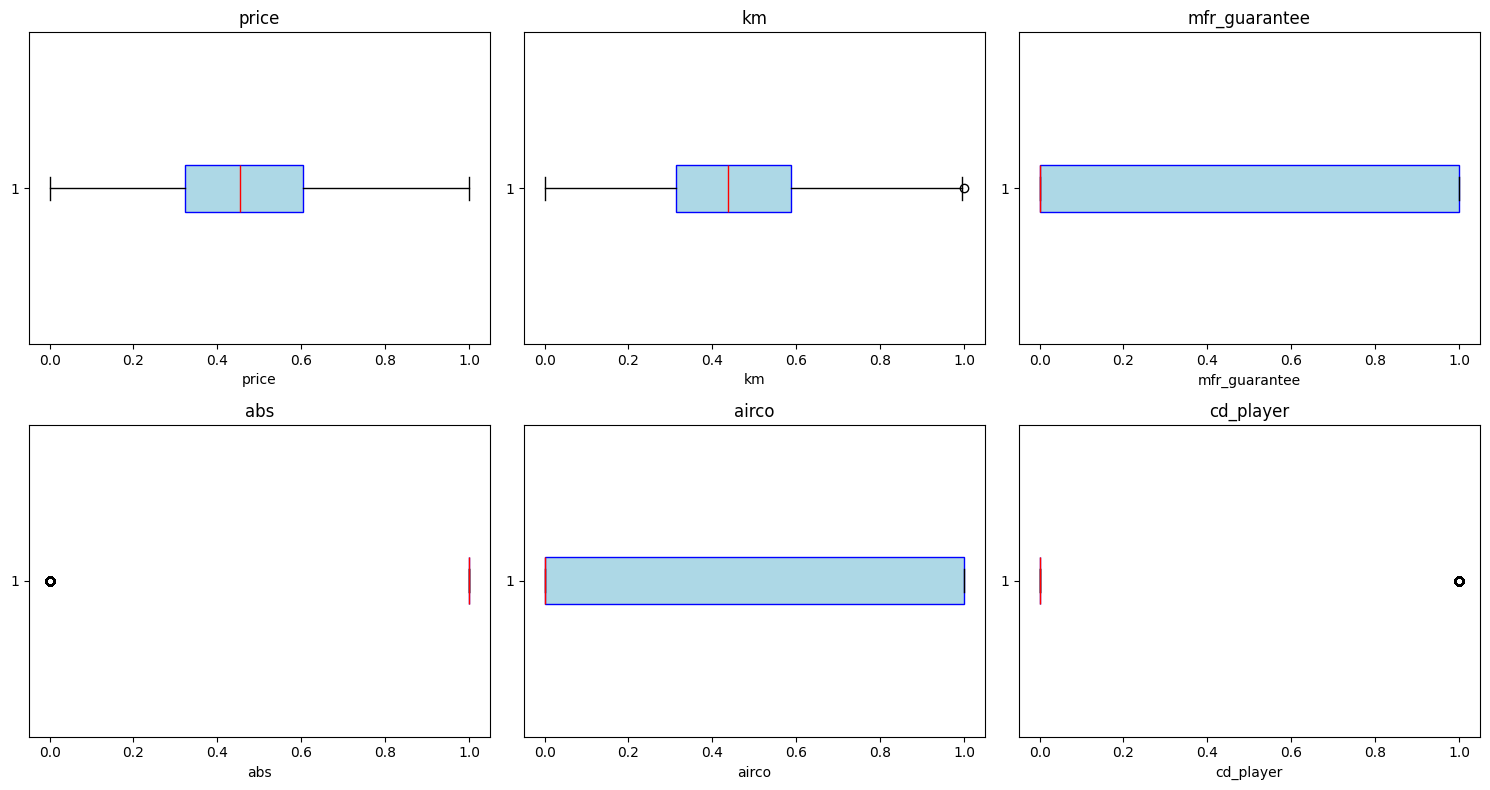

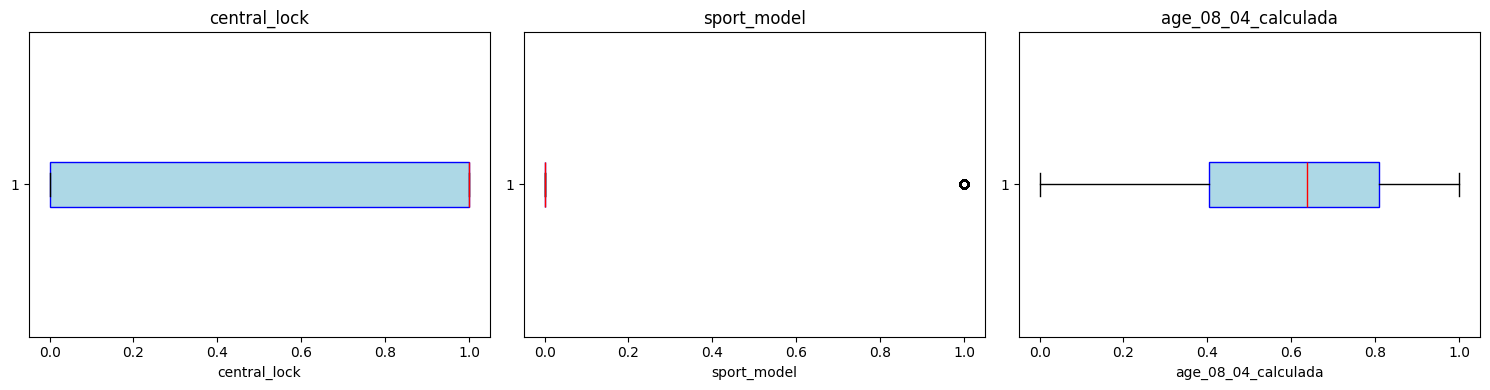

In [77]:
histogram_por_lotes(df_filtered_normalizado)
boxplots_por_lotes(df_filtered_normalizado)






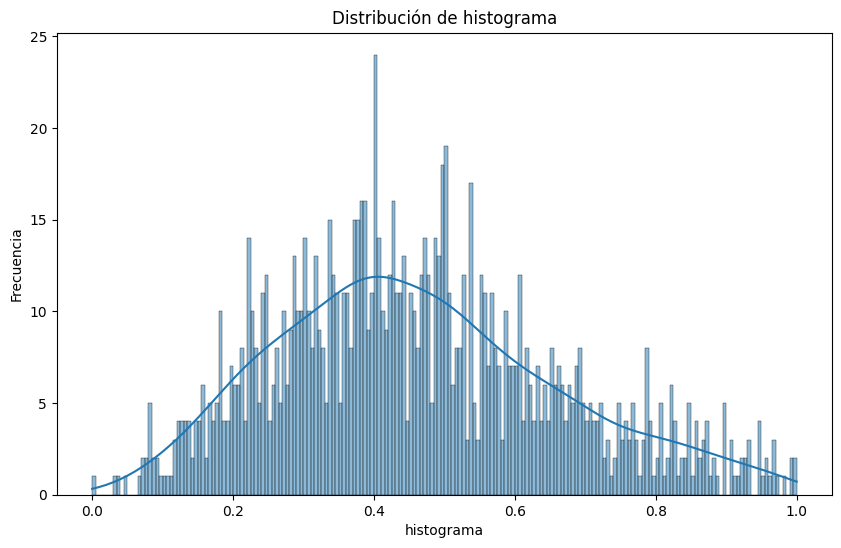

In [78]:
histogram(df_filtered_normalizado['km'],200)

In [79]:
df_filtered_normalizado['km'].describe()

count    1177.000000
mean        0.460960
std         0.200034
min         0.000000
25%         0.313845
50%         0.437168
75%         0.586810
max         1.000000
Name: km, dtype: float64

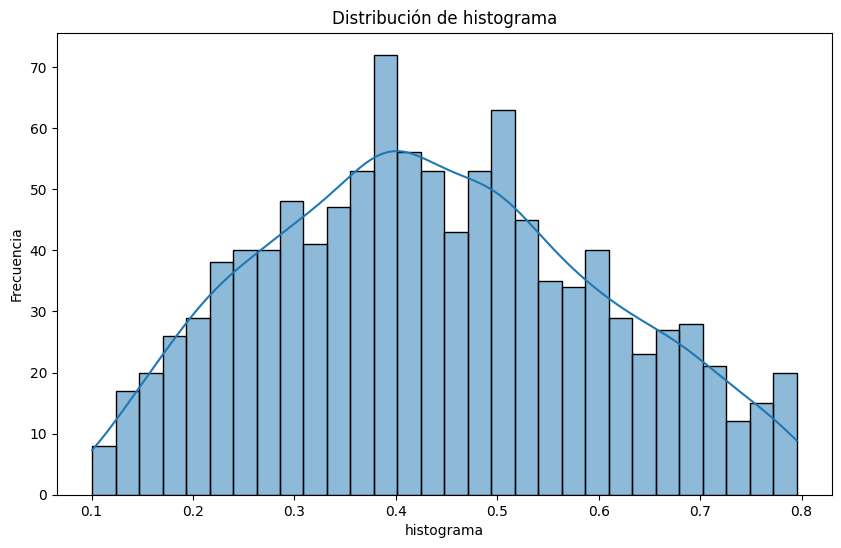

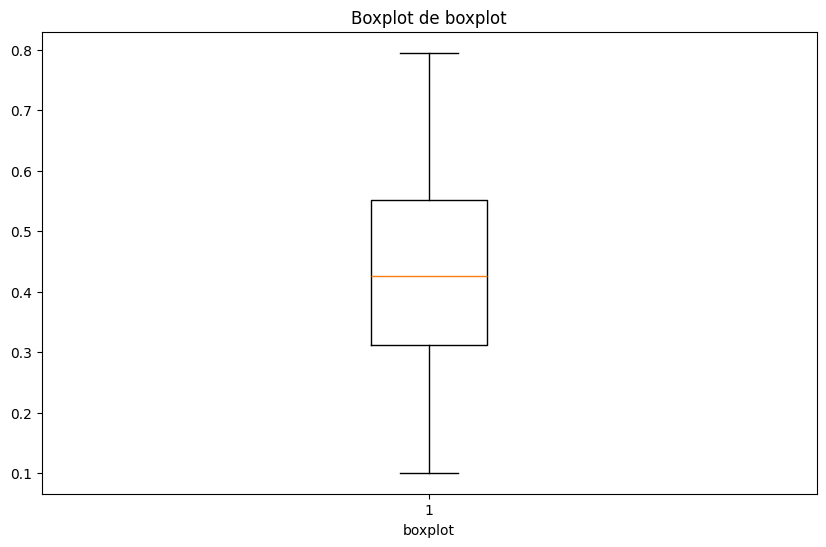

1076


In [80]:
km = df_filtered_normalizado['km'].copy()
km_f , mask_km = filtrar_columna_por_rango(km,0.1,0.8)

histogram(km_f)
boxplot(km_f)

print(len(km_f))










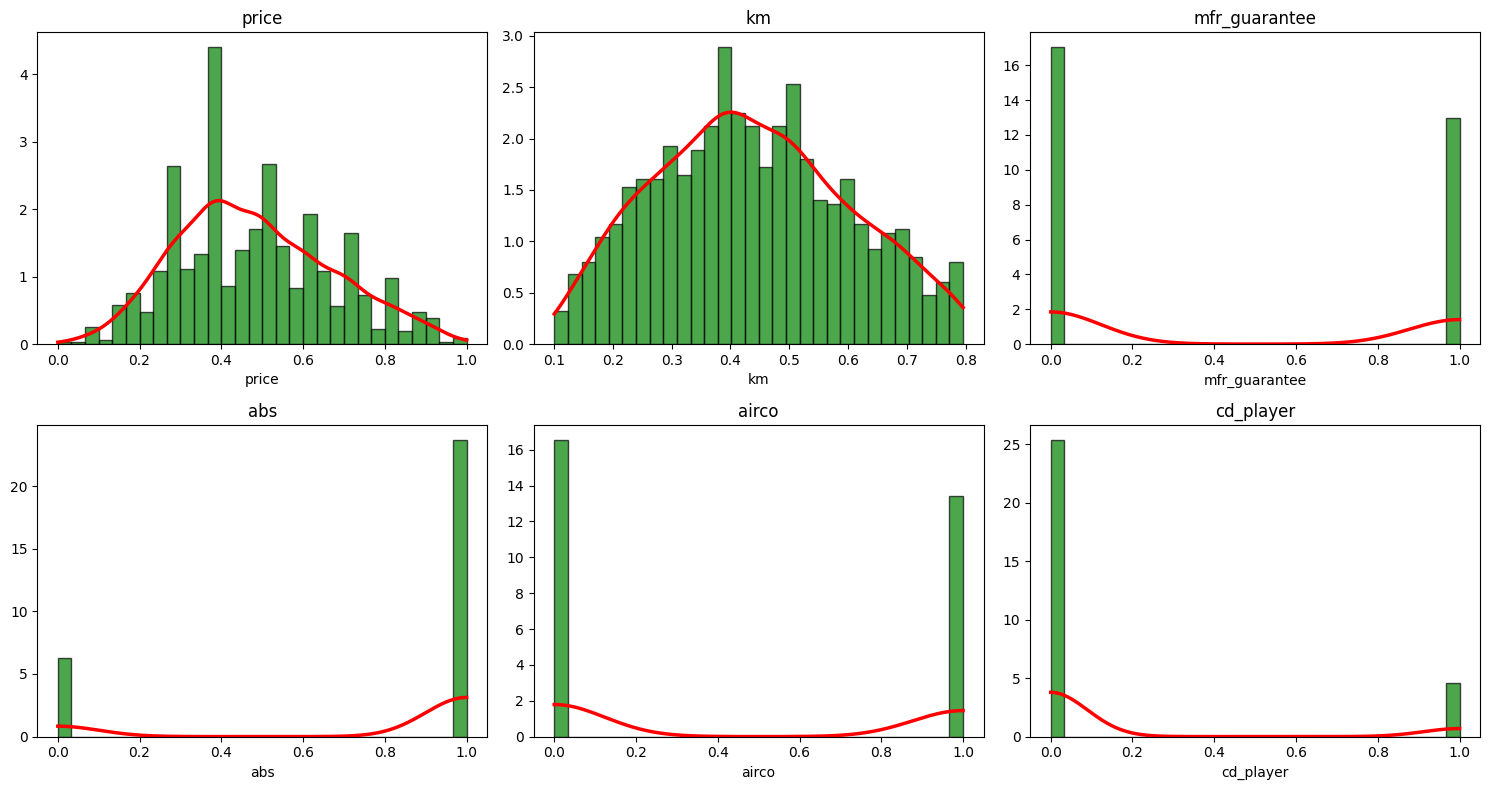

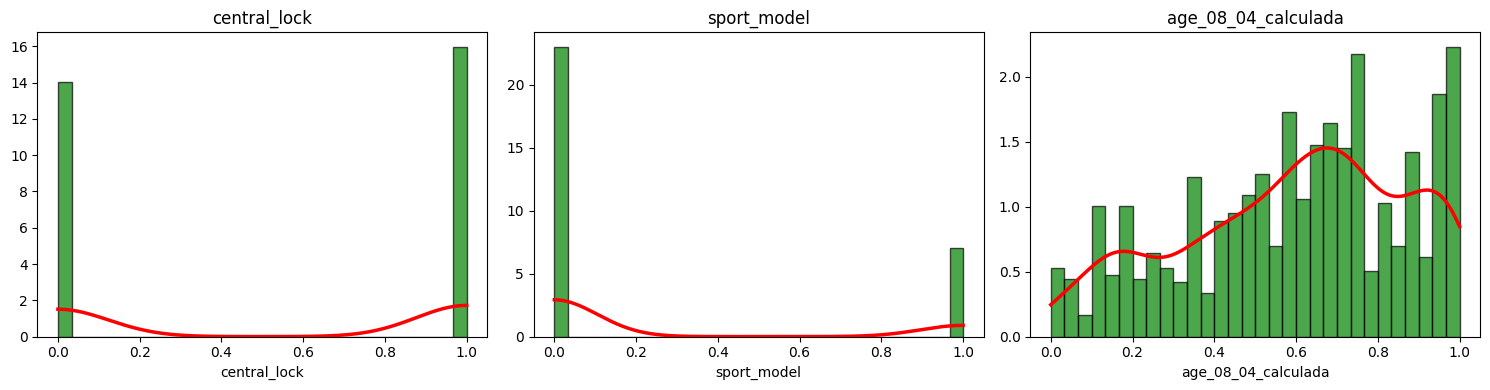

Index(['price', 'km', 'mfr_guarantee', 'abs', 'airco', 'cd_player',
       'central_lock', 'sport_model', 'age_08_04_calculada'],
      dtype='object')


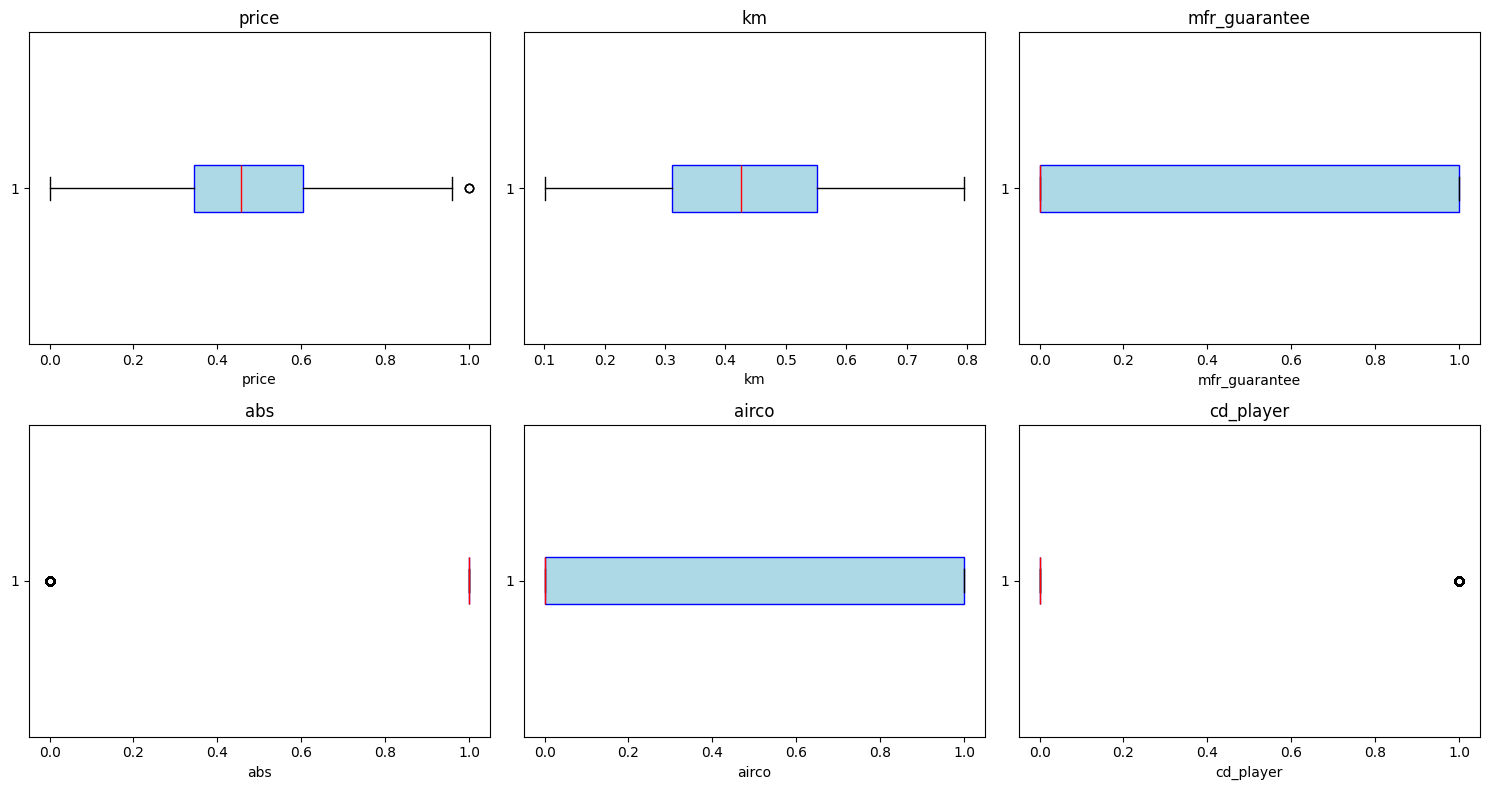

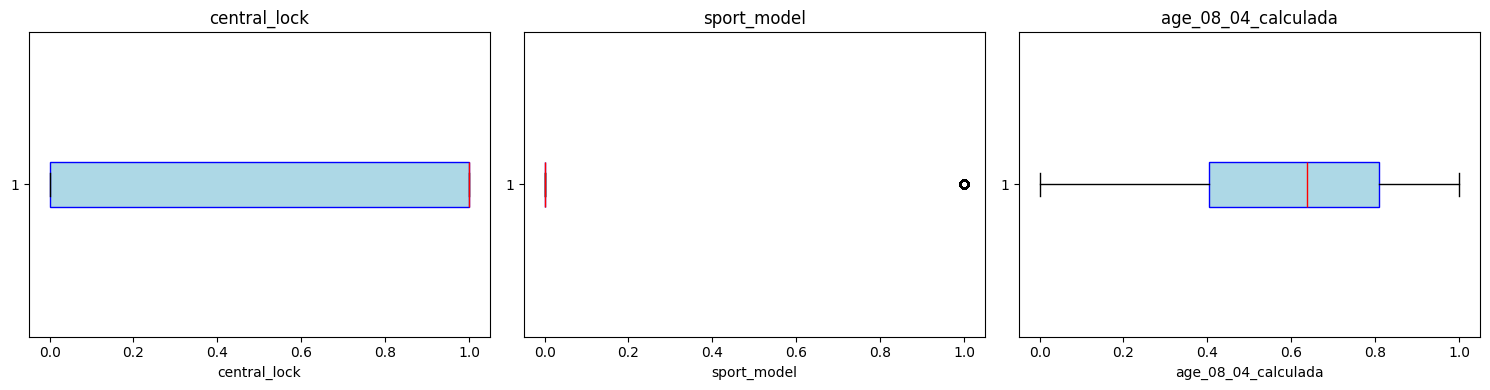

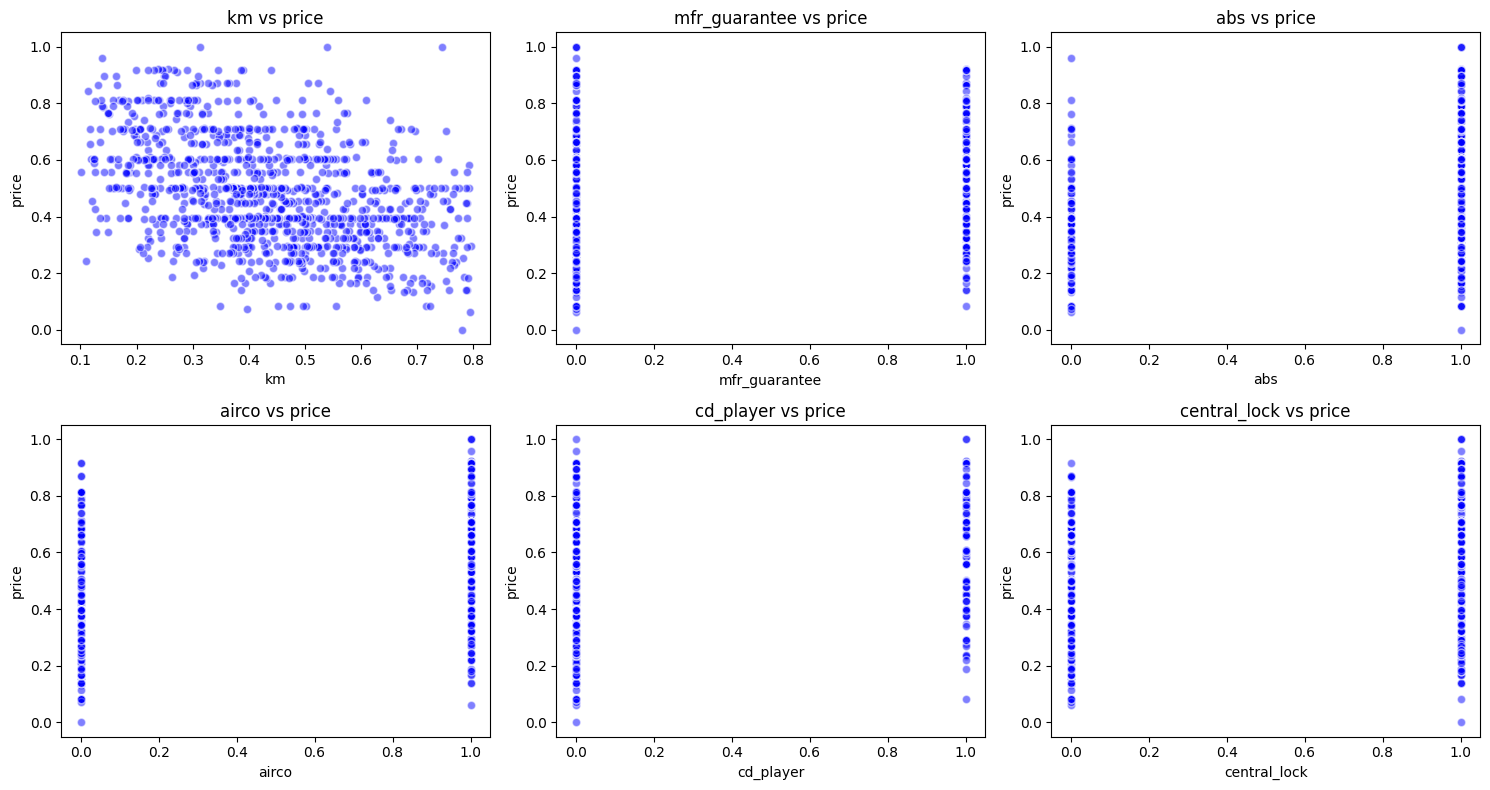

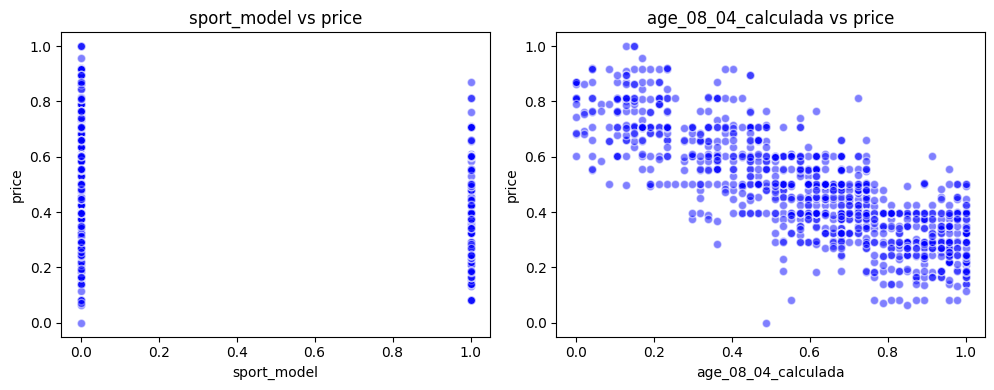

In [81]:
df_filtered_normalizado = df_filtered_normalizado[mask_km]

histogram_por_lotes(df_filtered_normalizado)
boxplots_por_lotes(df_filtered_normalizado)
scatter_por_lotes(df_filtered_normalizado)





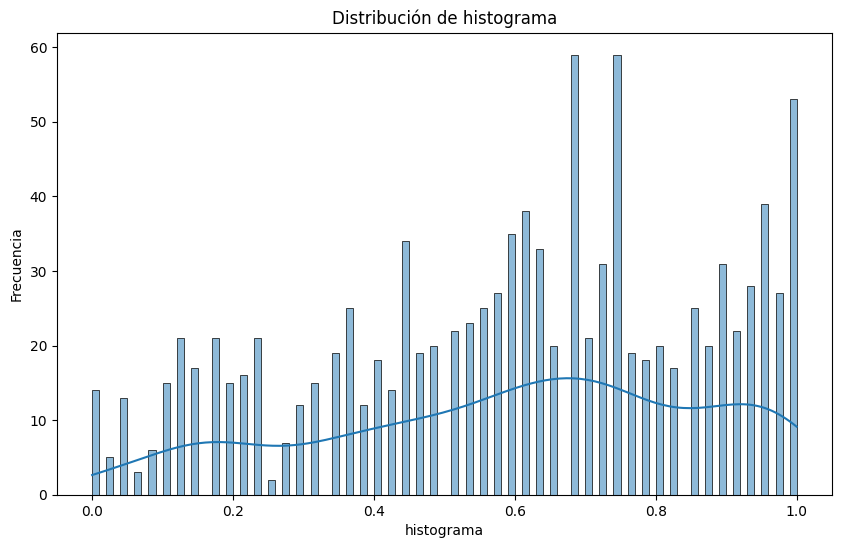

In [82]:
histogram(df_filtered_normalizado['age_08_04_calculada'],100)

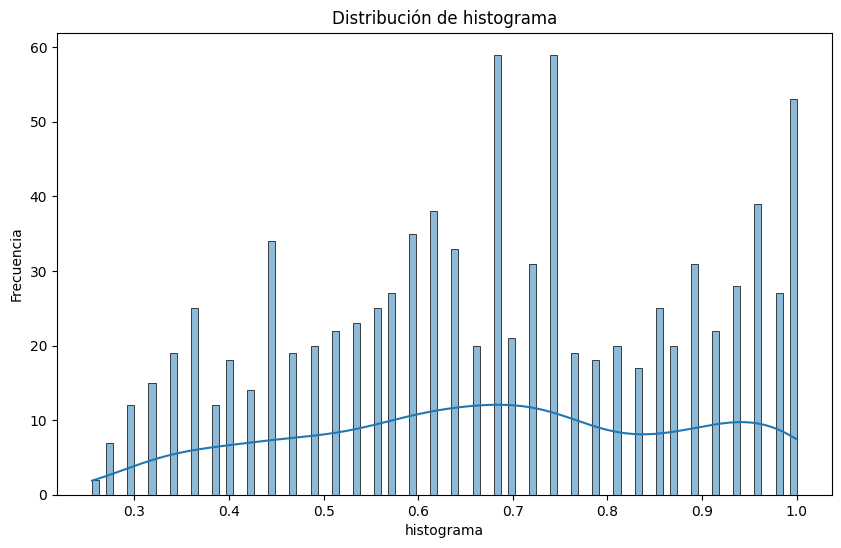

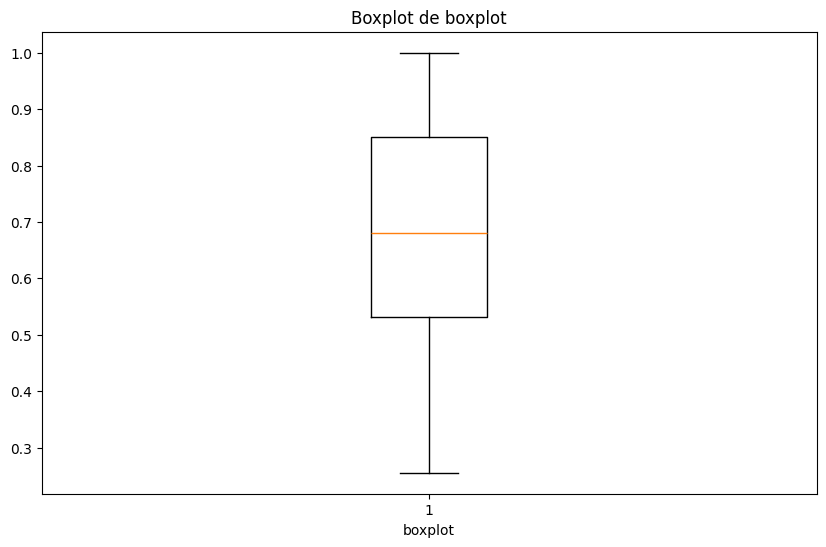

167


In [83]:
age_p = df_filtered_normalizado['age_08_04_calculada'].copy()
age_p_f , mask_age_p = filtrar_columna_por_rango(age_p,0.25,1)

histogram(age_p_f,100)
boxplot(age_p_f)

print(len(age_p)-len(age_p_f))